In [1]:
import multiprocessing as mp                                                                                                                                                                                       
import os                                                                                                                                                                                                          
import numpy as np                                                                                                                                                                                                 
import awkward as ak                                                                                                                                                                                               
import matplotlib.pyplot as plt                                                                                                                                                                                    
import matplotlib                                                                                                                                                                                                  
import matplotlib.colors as colors                                                                                                                                                                                 
from tools.roottree import read_tree                                                                                                                                                                               
from tools.selections import *                                                                                                                                                                                     
import scipy.stats                                                                                                                                                                                                 
from scipy.optimize import curve_fit                                                                                                                                                                               
                                                                                                                   
from tools.plottools import plot1dhist, plot2dhist, plot1d_errorbar, FIGSIZE_MID, FIGSIZE_BIG, setplot_defaultstyle, format_order_of_magnitude, FONTSIZE                                                           
from tools.studybeta import calc_signal_fraction                                                                                
from tools.binnings_collection import fbinning_fraction, fbinning_RICHnpe                                                                                                                                          
from tools.binnings_collection import get_nbins_in_range, get_sub_binning, get_bin_center                                                                                                                          
from tools.studybeta import minuitfit_LL, cdf_gaussian, calc_signal_fraction, cdf_double_gaus, double_gaus, minuitfit_Chi
from tools.histograms import WeightedHistogram, Histogram, plot_histogram_2d, plot_histogram_1d   
from tools.plottools import plot1dhist, plot2dhist, plot1d_errorbar, savefig_tofile, setplot_defaultstyle, FIGSIZE_BIG, FIGSIZE_SQUARE, FIGSIZE_MID, FIGSIZE_WID, plot1d_step, FONTSIZE, set_plot_defaultstyle  
from tools.constants import ISOTOPES_MASS, NUCLEI_CHARGE, NUCLEIS, ISOTOPES
from tools.functions import cumulative_norm_gaus, normalized_gaussian, poly, upoly
from tools.graphs import MGraph, slice_graph, plot_graph, slice_graph_by_value, concatenate_graphs, Add_point_to_graph

from tools.constants import ISOTOPES_MASS, DETECTOR_COLOR
from tools.massfit_tools import get_fitpdferrorband, get_fitpdf_witherr
import uncertainties                                                                                                                                                                                               
from uncertainties import unumpy                                                                                                                                                                                   
from uncertainties import ufloat   
from tools.jupytertools import *


/home/manbing/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [10]:
#filename_histrefnaf = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta_refNaF_beta2tuned_B1236P8mcweight.npz'
#filename_histrefagl = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta_refAgl_beta2tuned_B1236P8mcweight.npz'
#filename_histrefnaf = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbetaResidual_refNaF_beta2Tuned_B1236P8mcweight.npz'
#filename_histrefagl = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbetaResidual_refAgl_beta2Tuned_B1236P8mcweight.npz'

filename_histrefagl = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbetaResidual_refAgl_beta2Tuned_B1236P8mcweight.npz'
filename_histrefnaf = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbetaResidual_refNaF_beta2Tuned_B1236P8mcweight.npz'
#filename_histrefnaf = '/home/manbing/Documents/Data/data_LiP8/tofbeta/Li_tofbetaResidual_refUntunedNaF_B1308mcweight_inversebeta.npz'

detectors = ['Tof', 'NaF', 'Agl']
hist_mcbeta = {}
hist_issbeta = {}
hist_issbeta_sv = {}
nuclei = 'Li'
isotopes = ISOTOPES[nuclei]
#nucleiname = 'Be'
MCName = 'Li MC'

datadir = '/home/manbing/Documents/Data/data_LiP8/'
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/plots/Study_Li_TofBeta_NaFRef_B1308'
os.makedirs(plotfile, exist_ok=True)

figsuffix = 'tofbeta1_refRICHTuned'
isscolor = 'black'
mccolor = 'blue'
figtext = 'Tuned'

nucleiname = {'O': 'Oxygen', 'C':'Carbon', 'Be': 'Be', 'B': 'Boron', 'Li': 'Li'}
MCNameText = {'Be': 'Be MC(Be7:9:10=[6:3:1])', 'B': 'B MC(B10:B11=[1:1])', 'C': 'C12 MC', 'O': 'O16 MC', 'Li': 'Li MC(Li6:7=1:1)'}



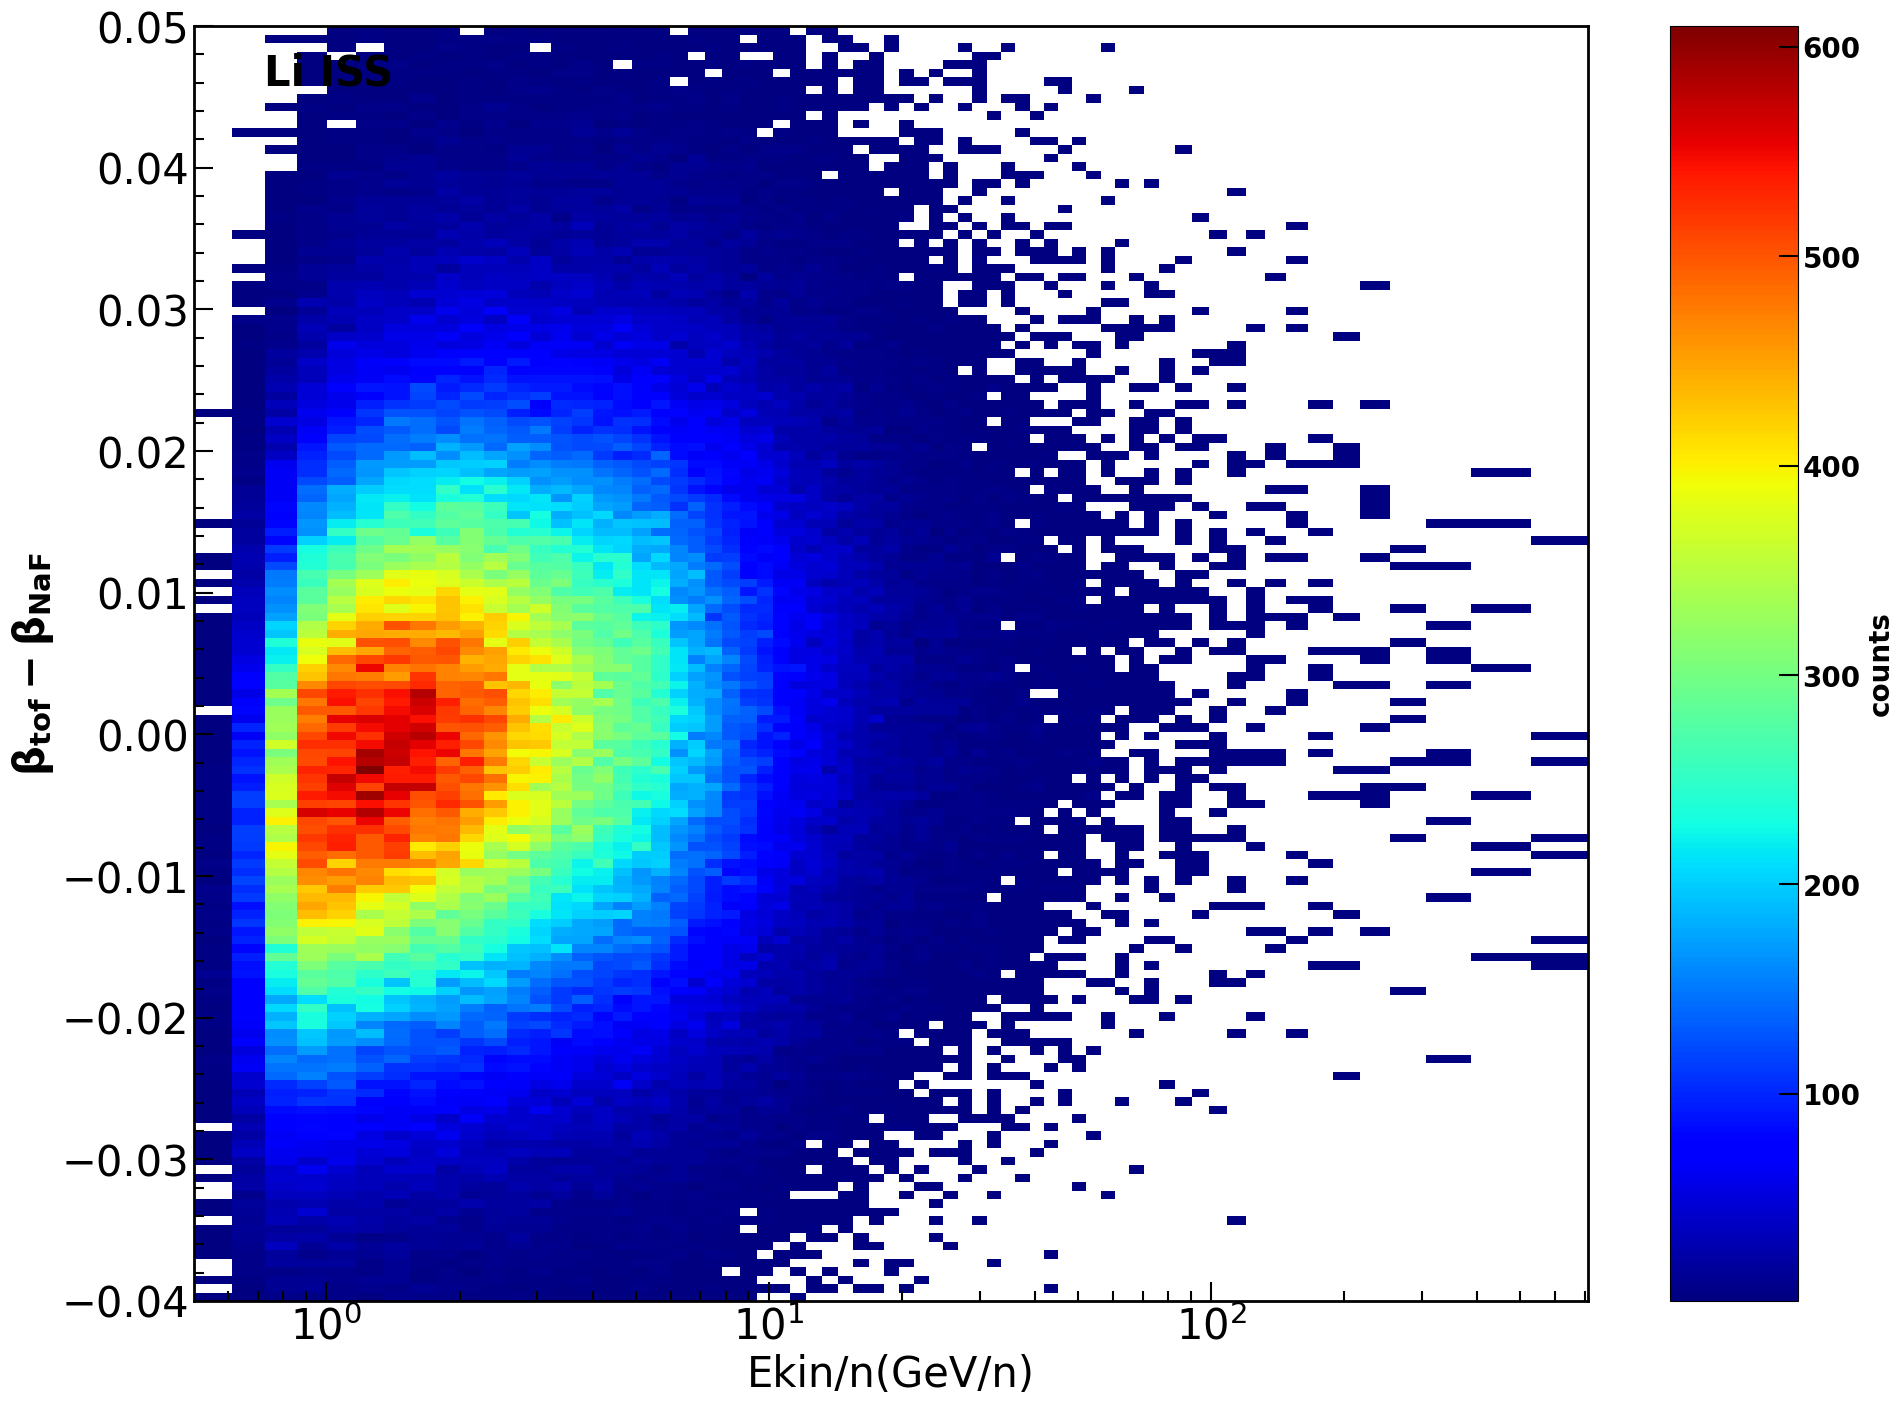

In [11]:

datatype = {'iss', 'mc'}
filename = {'NaF': f'{filename_histrefnaf}', 'Agl':f'{filename_histrefagl}'}
decs = ['NaF']

hist2d_iss = {}
hist2d_mc = {}
for dec in decs: 
    npzfile = np.load(filename[dec])
    hist2d_iss[dec] = WeightedHistogram.from_file(npzfile, f"hist_issbetareso_{dec}") 
    hist2d_mc[dec] = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_{dec}")  
    fig = plt.figure(figsize=(20, 15))
    plot = fig.subplots(1, 1) 
    plot2dhist(fig, plot, xbinning=hist2d_iss[dec].binnings[0].edges[1:-1], 
               ybinning=hist2d_iss[dec].binnings[1].edges[1:-1], 
               counts=hist2d_iss[dec].values[1:-1, 1:-1], 
               xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
               setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
    plot.text(0.05, 0.98, f"{nucleiname[nuclei]} ISS", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
    plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
    plot.set_ylabel(rf'$\mathrm{{\beta_{{tof}}-\beta_{{{dec}}}}}$', fontsize=30)
    #plot.set_ylabel(rf'$\mathrm{{ (\beta_{{tof}}-\beta_{{{dec}}})/\beta_{{{dec}}}}}$', fontsize=30)
    plot.set_xscale('log')
    #plot.set_xlim(gammalim[dec])
    savefig_tofile(fig, plotfile, f"hist2dResidual_Compare_iss_{nucleiname[nuclei]}{dec}", show=True) 
    
  
            
            


69


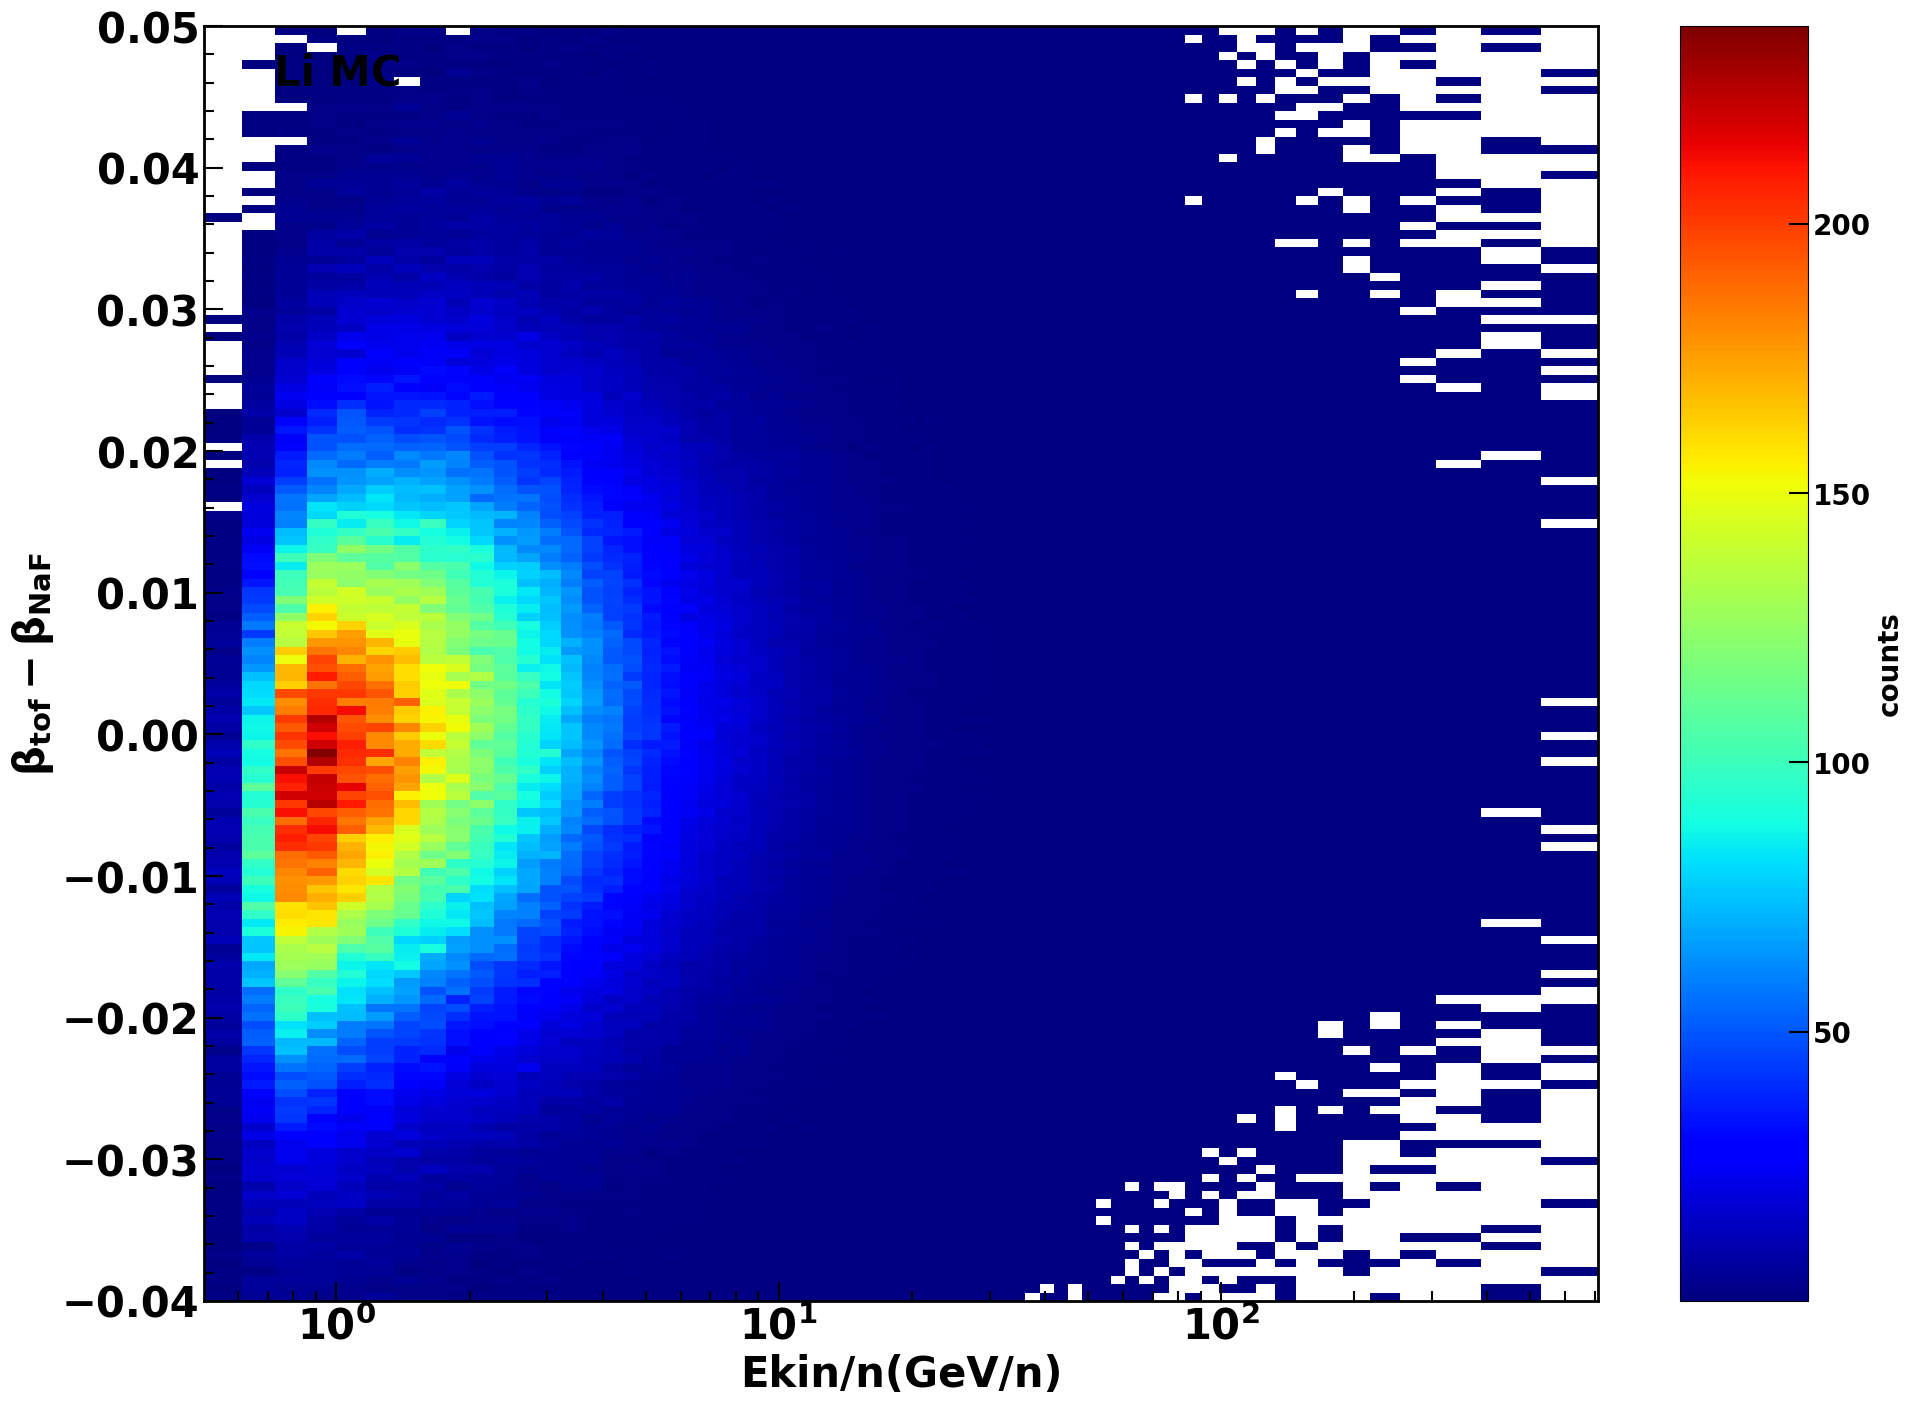

In [12]:
fig = plt.figure(figsize=(20, 15))
plot = fig.subplots(1, 1) 
plot2dhist(fig, plot, xbinning=hist2d_mc[dec].binnings[0].edges[1:-1], 
            ybinning=hist2d_mc[dec].binnings[1].edges[1:-1], 
            counts=hist2d_mc[dec].values[1:-1, 1:-1], 
            xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
            setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
plot.text(0.05, 0.98, f"{nucleiname[nuclei]} MC", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
plot.set_ylabel(rf'$\mathrm{{\beta_{{tof}}-\beta_{{{dec}}}}}$', fontsize=30)
#plot.set_ylabel(rf'$\mathrm{{ (\beta_{{tof}}-\beta_{{{dec}}})/\beta_{{{dec}}}}}$', fontsize=30)
plot.set_xscale('log')
#plot.set_xlim(gammalim[dec])
savefig_tofile(fig, plotfile, f"hist2dReso_{figsuffix}_Compare_mc_{nucleiname}", show=True)  

print(len(hist2d_mc[dec].binnings[0].edges))

[          -inf 5.05987029e-01 6.08224869e-01 7.23982957e-01
 8.53363359e-01 1.00135025e+00 1.16308182e+00 1.34357172e+00
 1.54285449e+00 1.76088749e+00 2.00298668e+00 2.26917689e+00
 2.55942404e+00 2.87365792e+00 3.21734539e+00 3.59045802e+00
 3.99294340e+00 4.43035186e+00 4.90265349e+00 5.40980476e+00
 5.97435537e+00 6.53976838e+00 7.16250306e+00 7.84258384e+00
 8.58001677e+00 9.37479531e+00 1.02269048e+01 1.11363257e+01
 1.21030364e+01 1.31839123e+01 1.43220684e+01 1.55174754e+01
 1.68270510e+01 1.81938495e+01 1.96748100e+01 2.12699342e+01
 2.29792203e+01 2.48026637e+01 2.67402582e+01 2.88489916e+01
 3.10718692e+01 3.34658838e+01 3.60310351e+01 3.88243285e+01
 4.17887578e+01 4.49813296e+01 4.84020436e+01 5.21079126e+01
 5.60989378e+01 6.06602002e+01 6.52215404e+01 7.03531224e+01
 7.60549540e+01 8.28972329e+01 9.03097796e+01 9.88627956e+01
 1.08556291e+02 1.19390271e+02 1.31934951e+02 1.46760558e+02
 1.65007539e+02 1.87246131e+02 2.15187017e+02 2.50540886e+02
 2.98439782e+02 3.754202

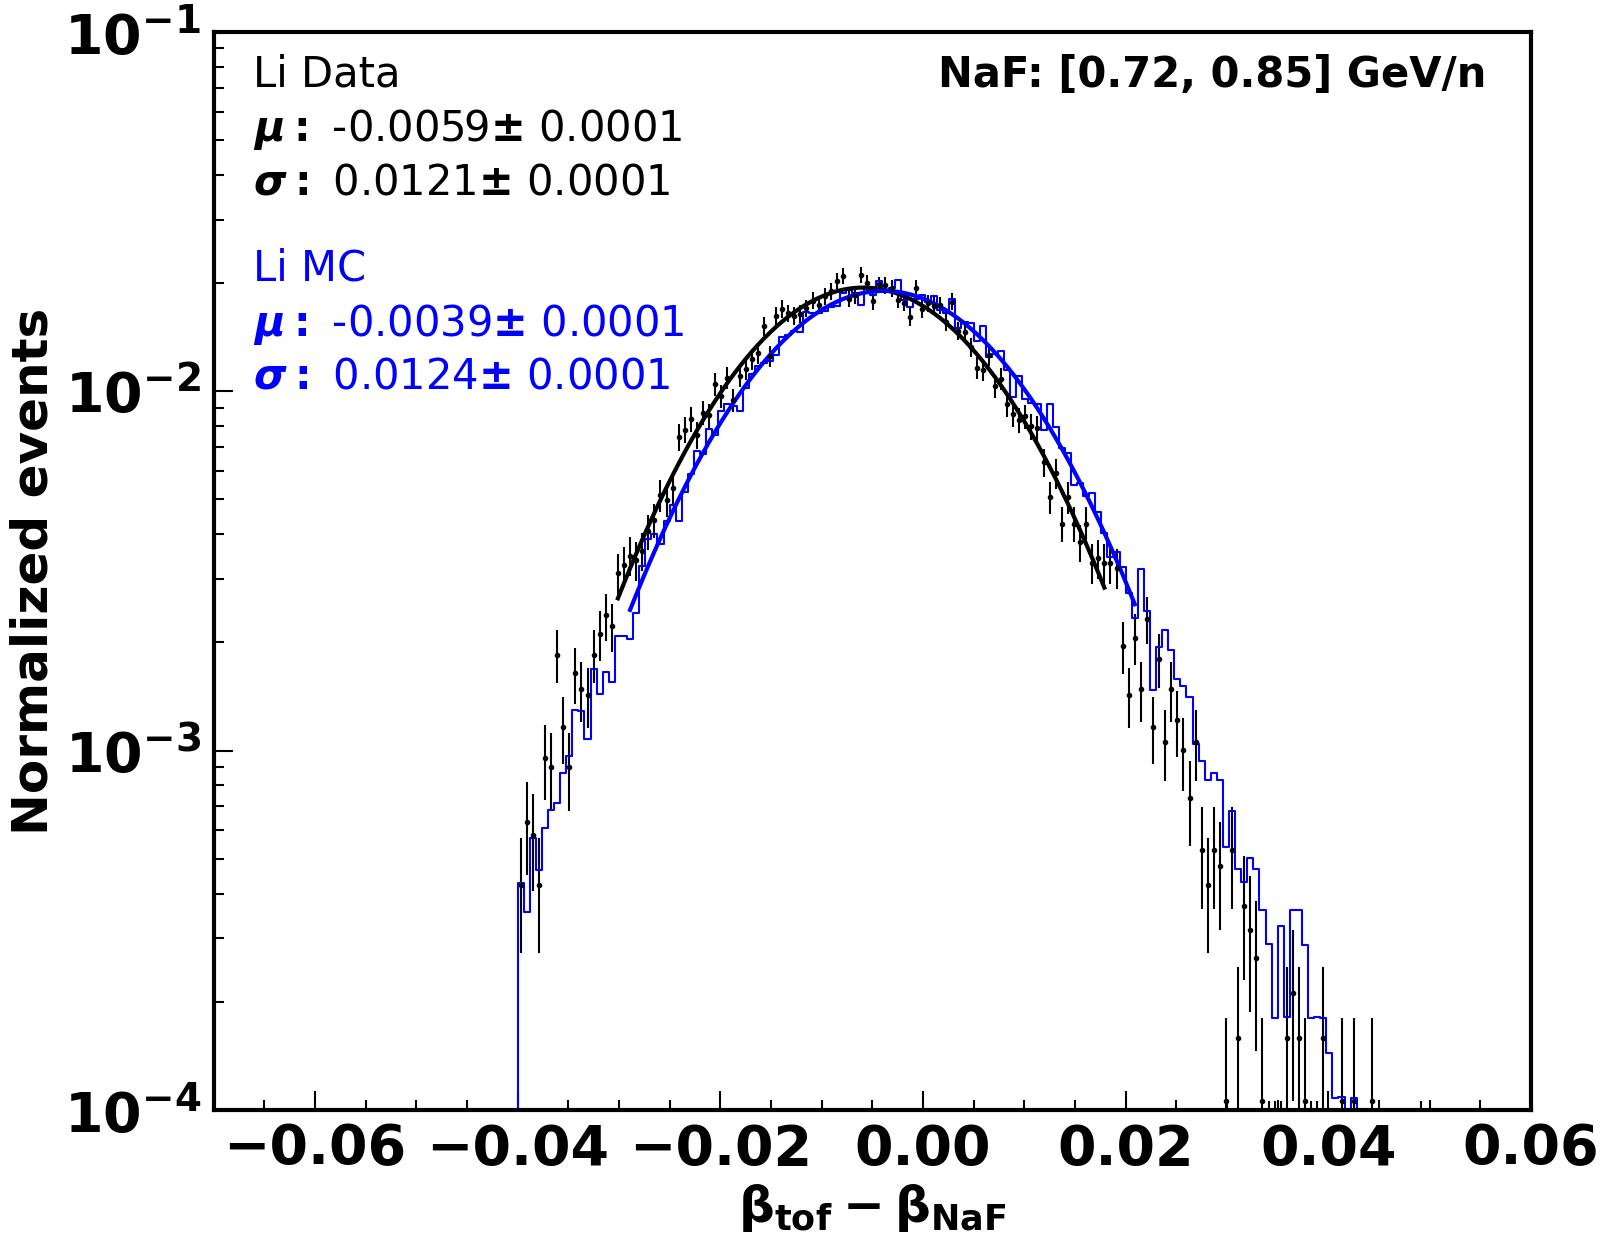

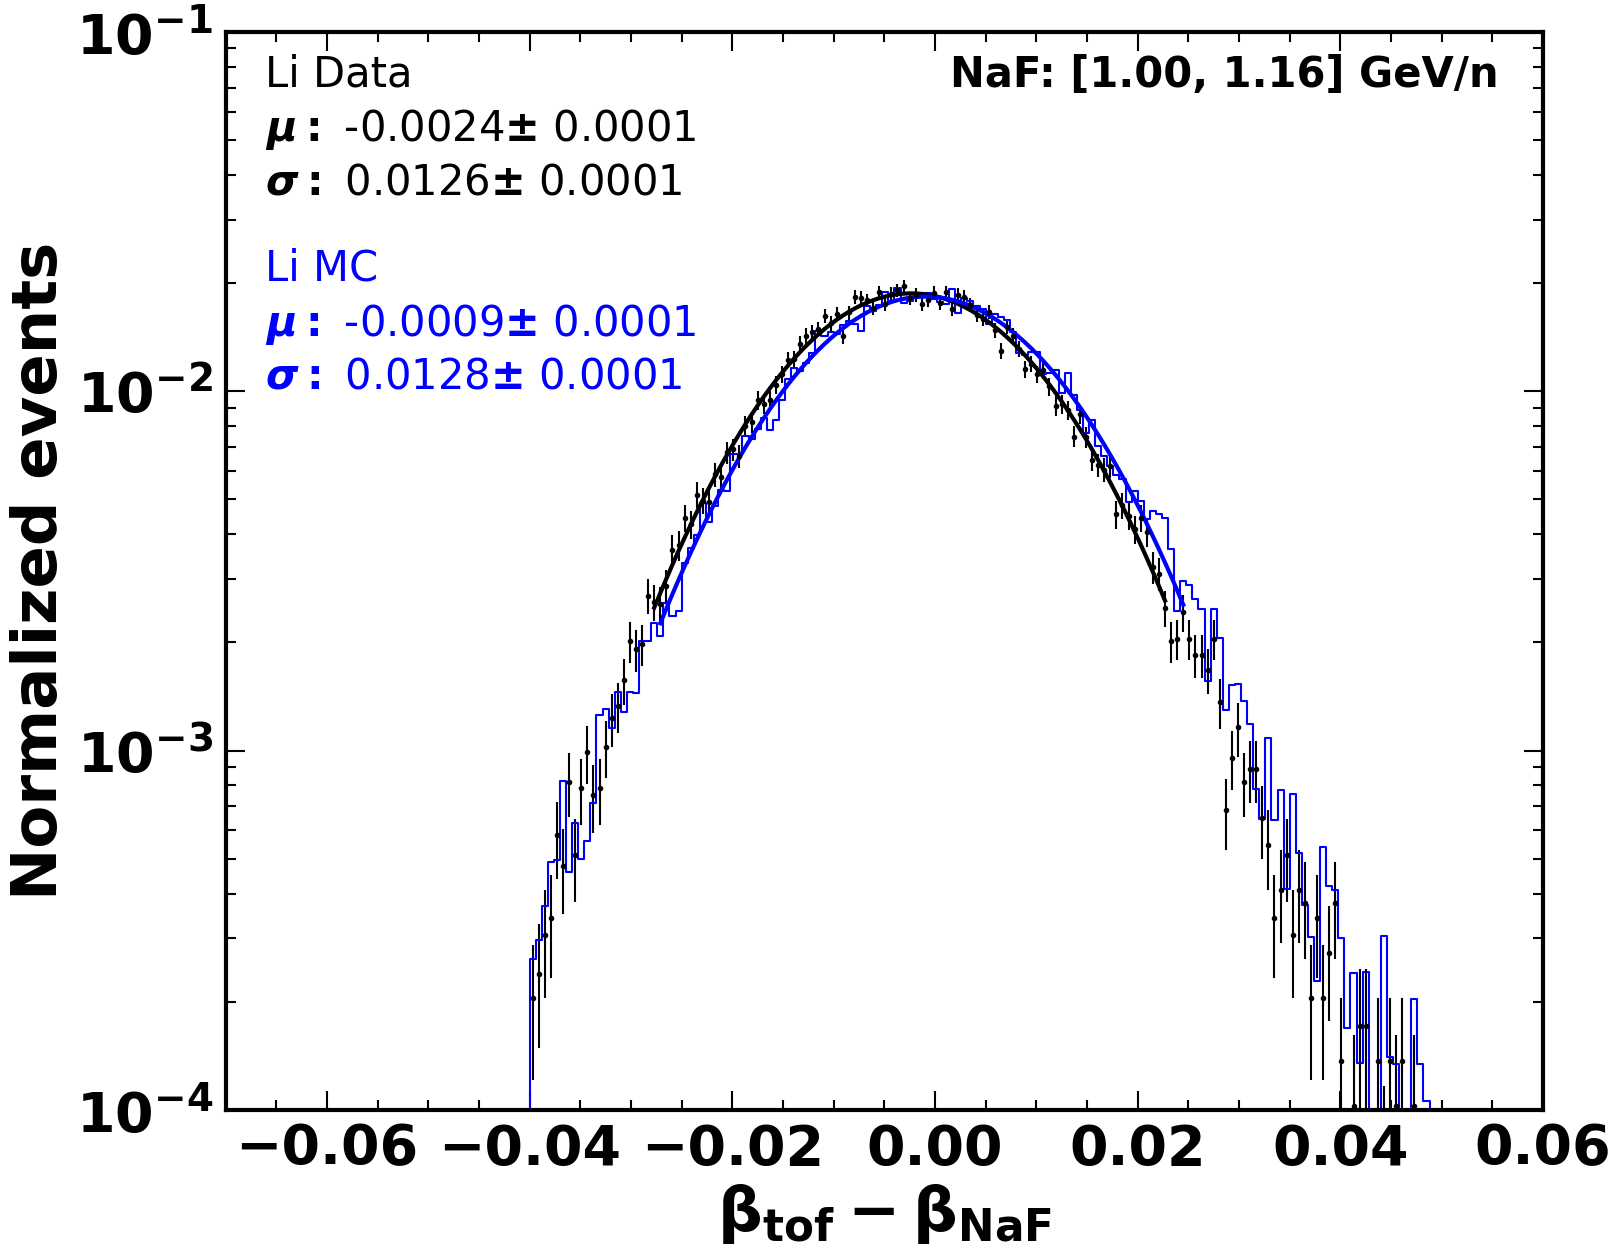

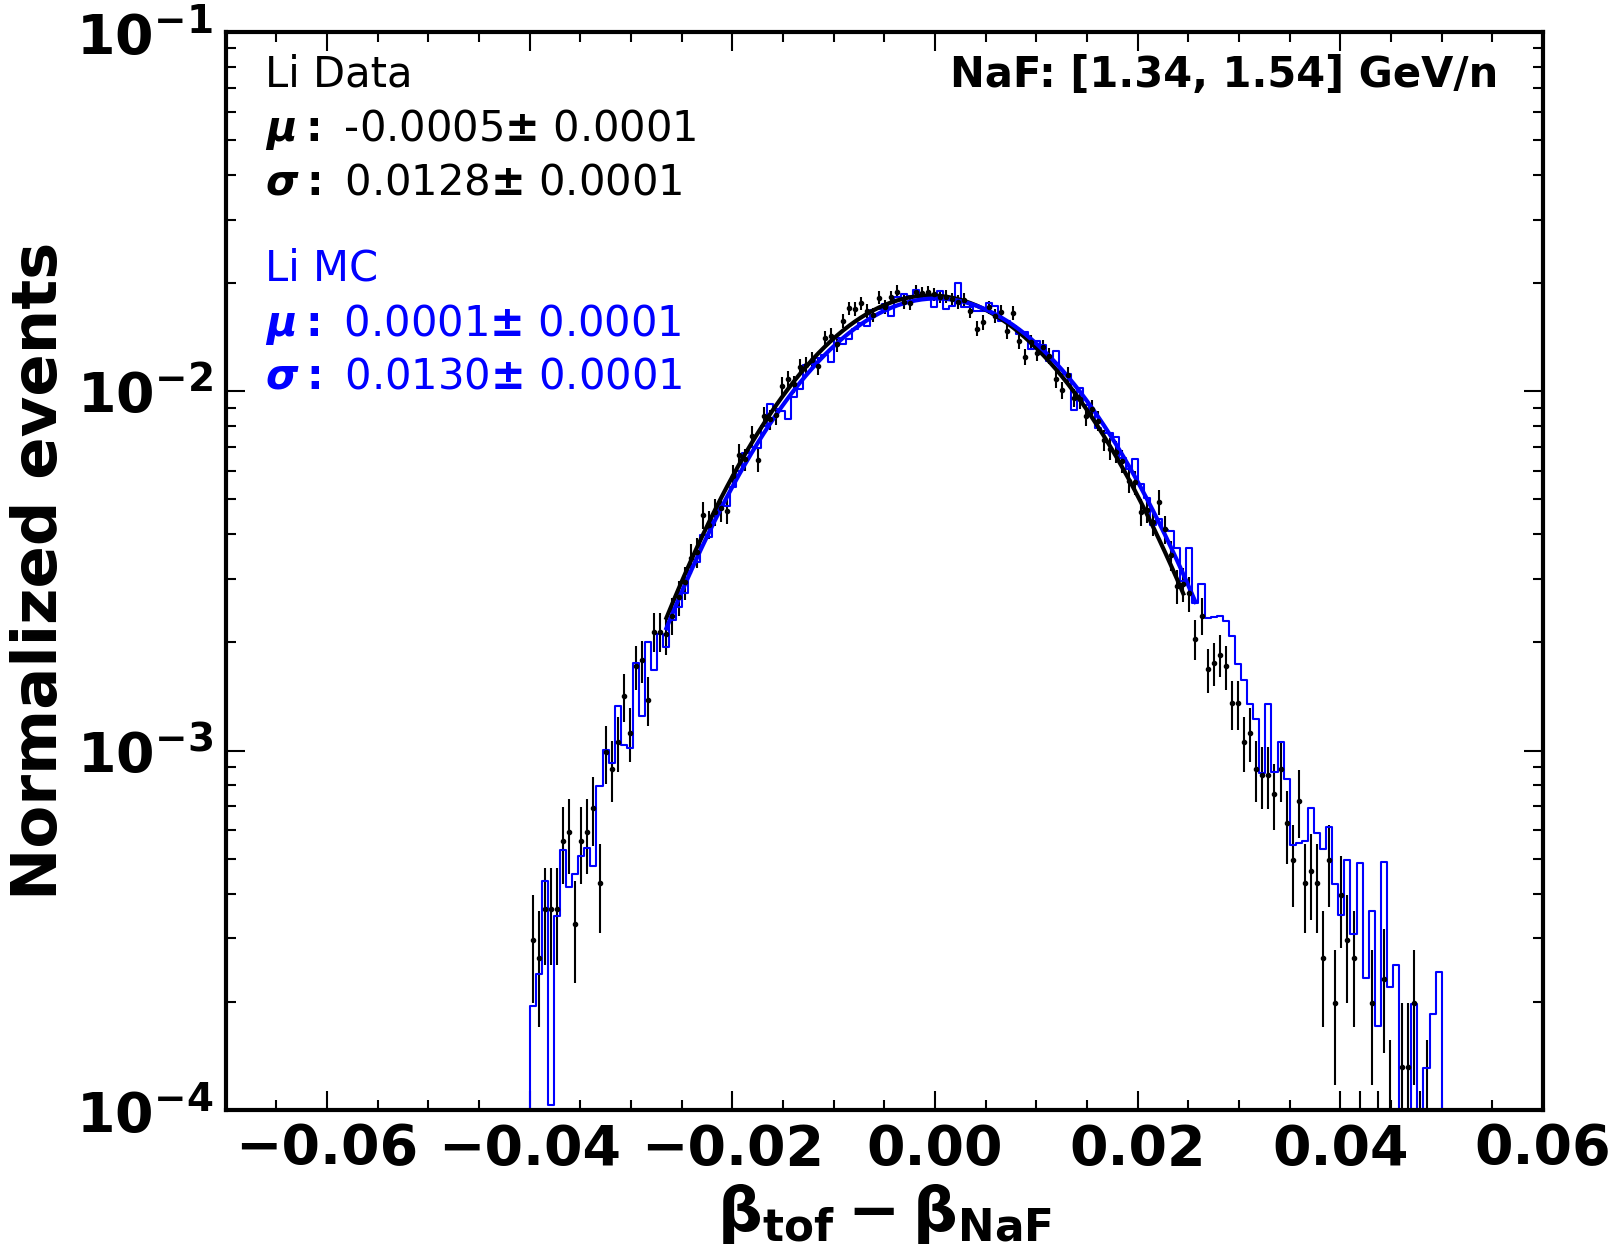

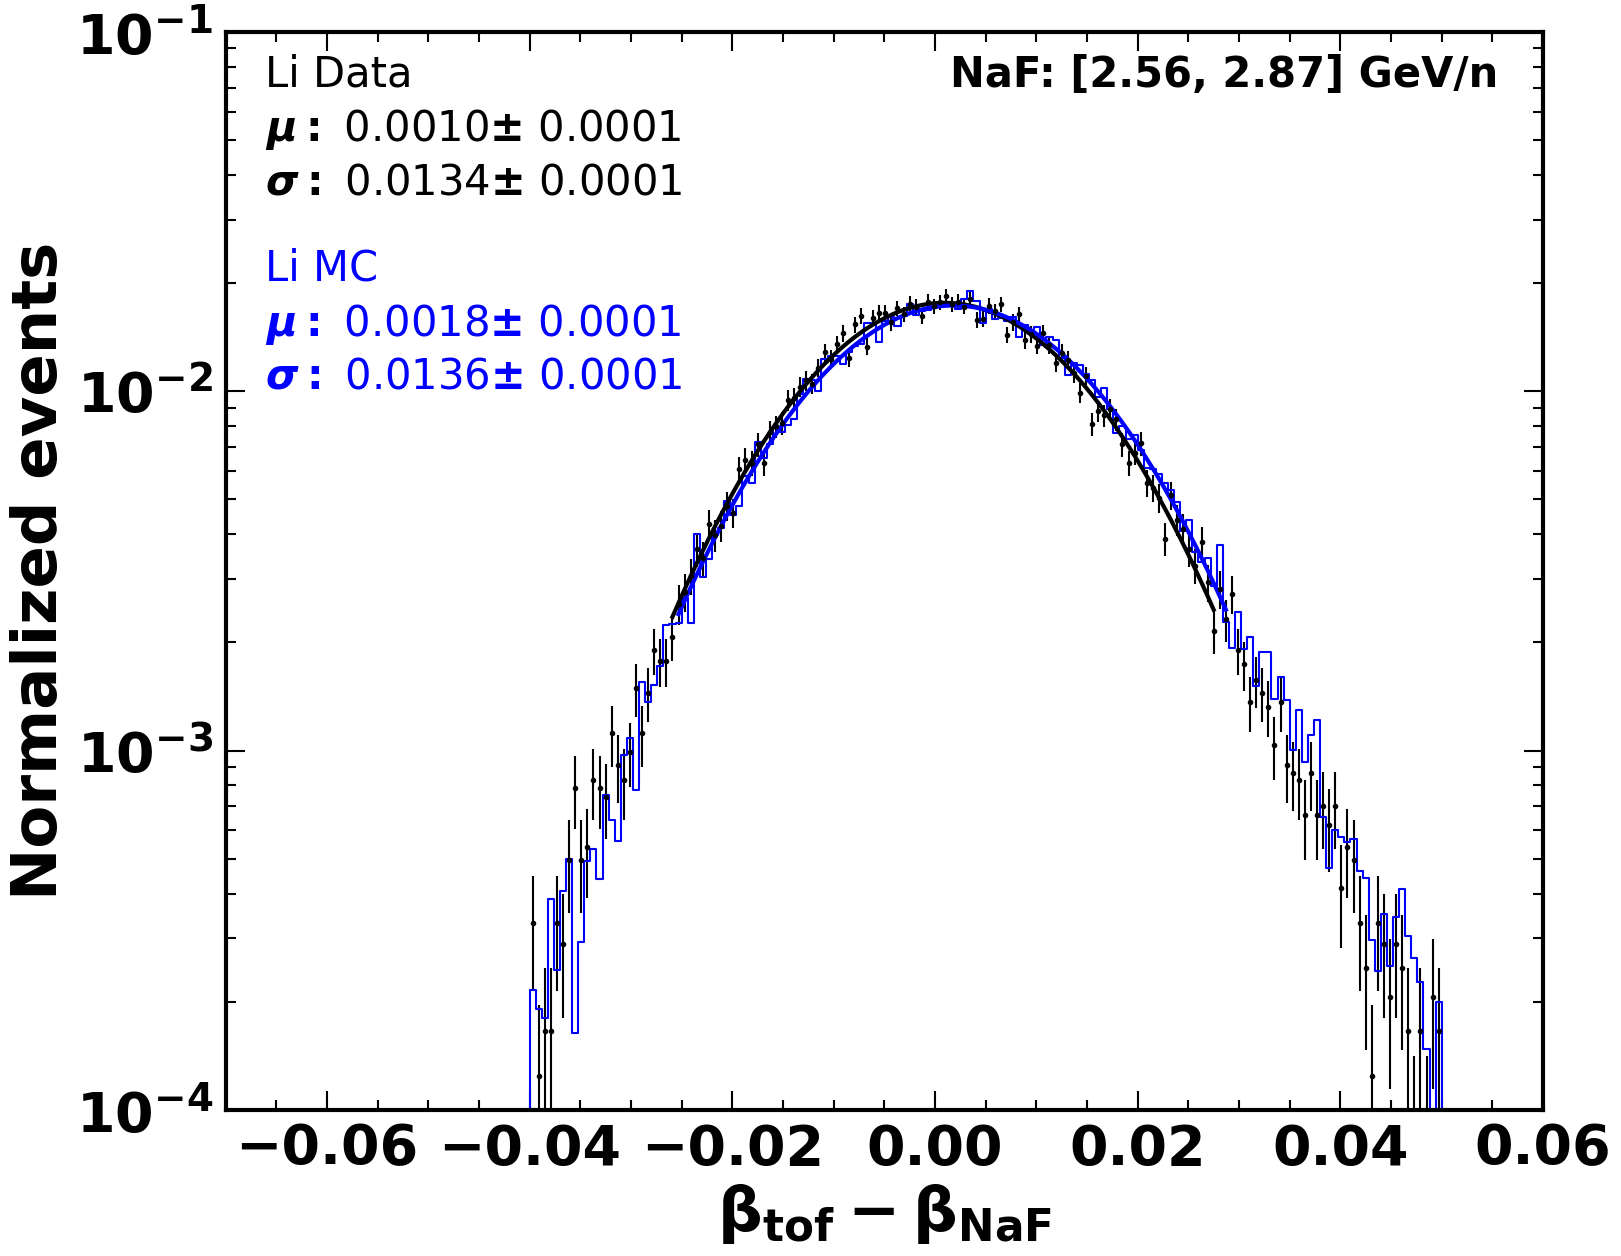

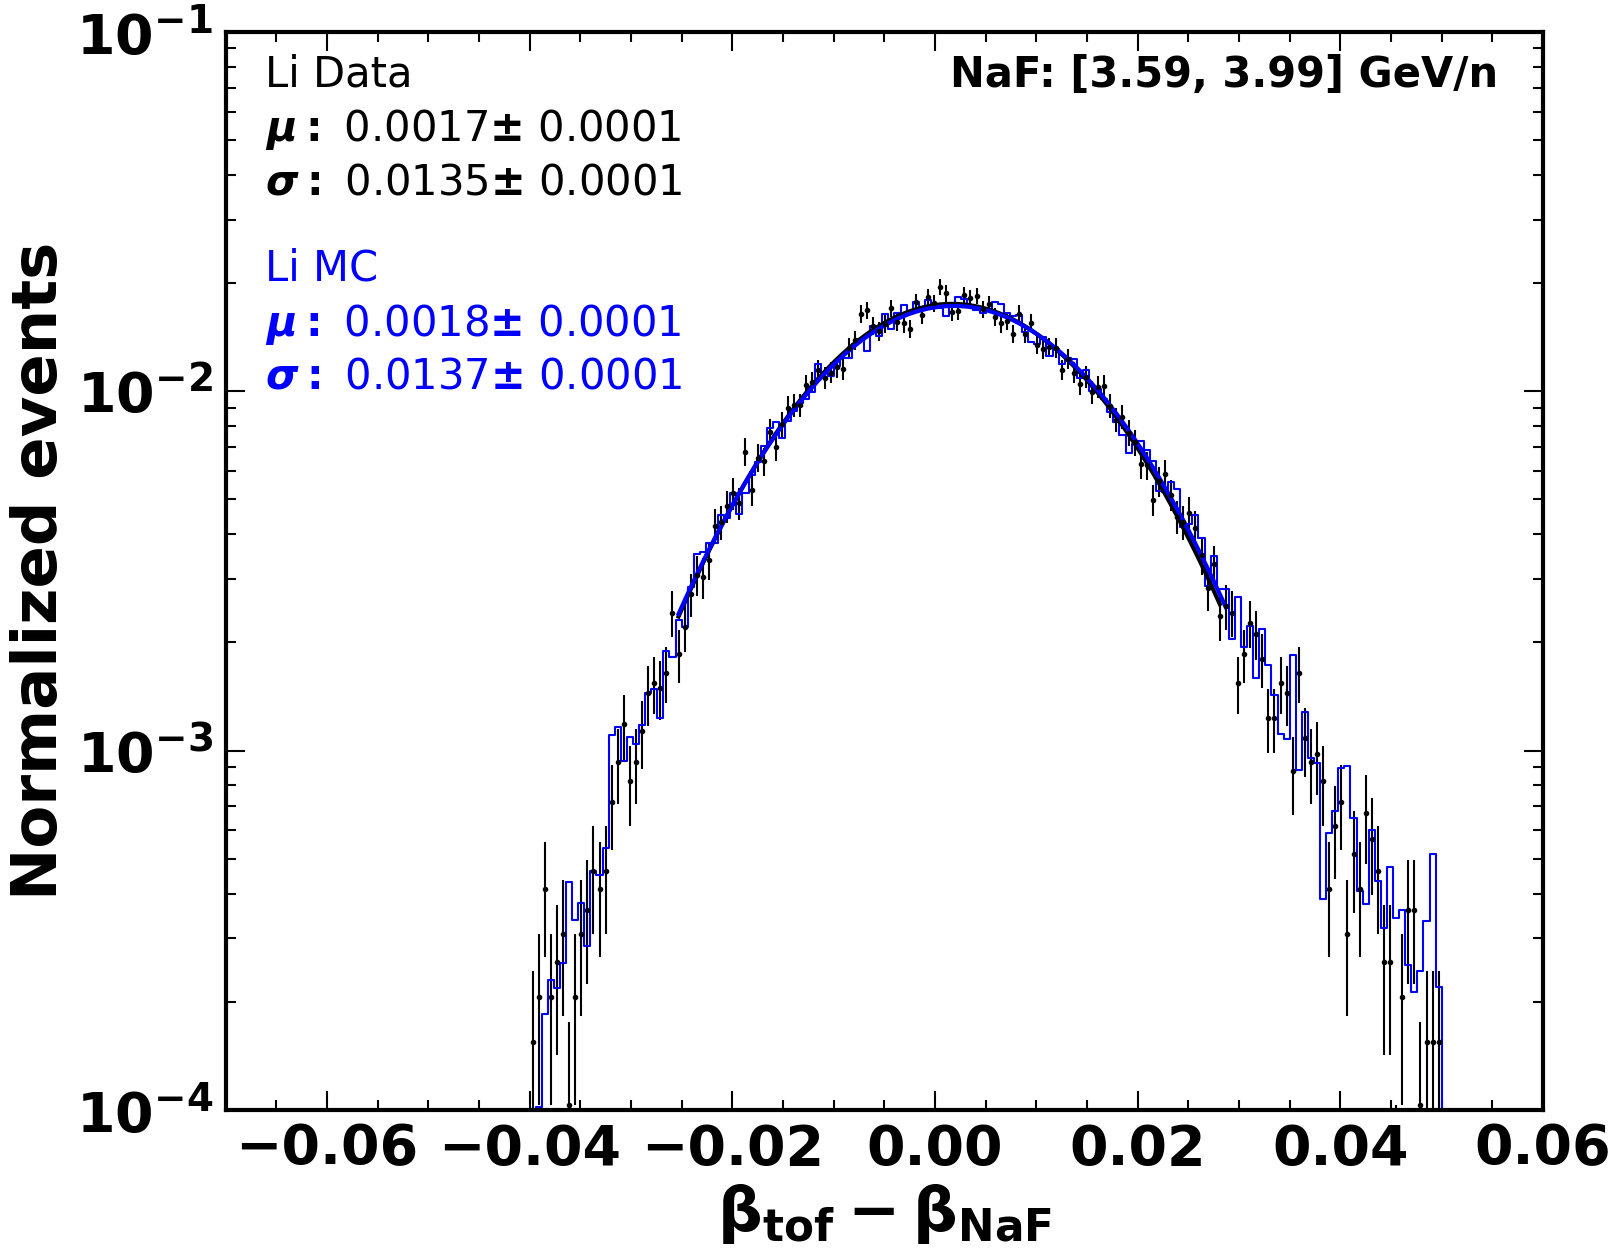

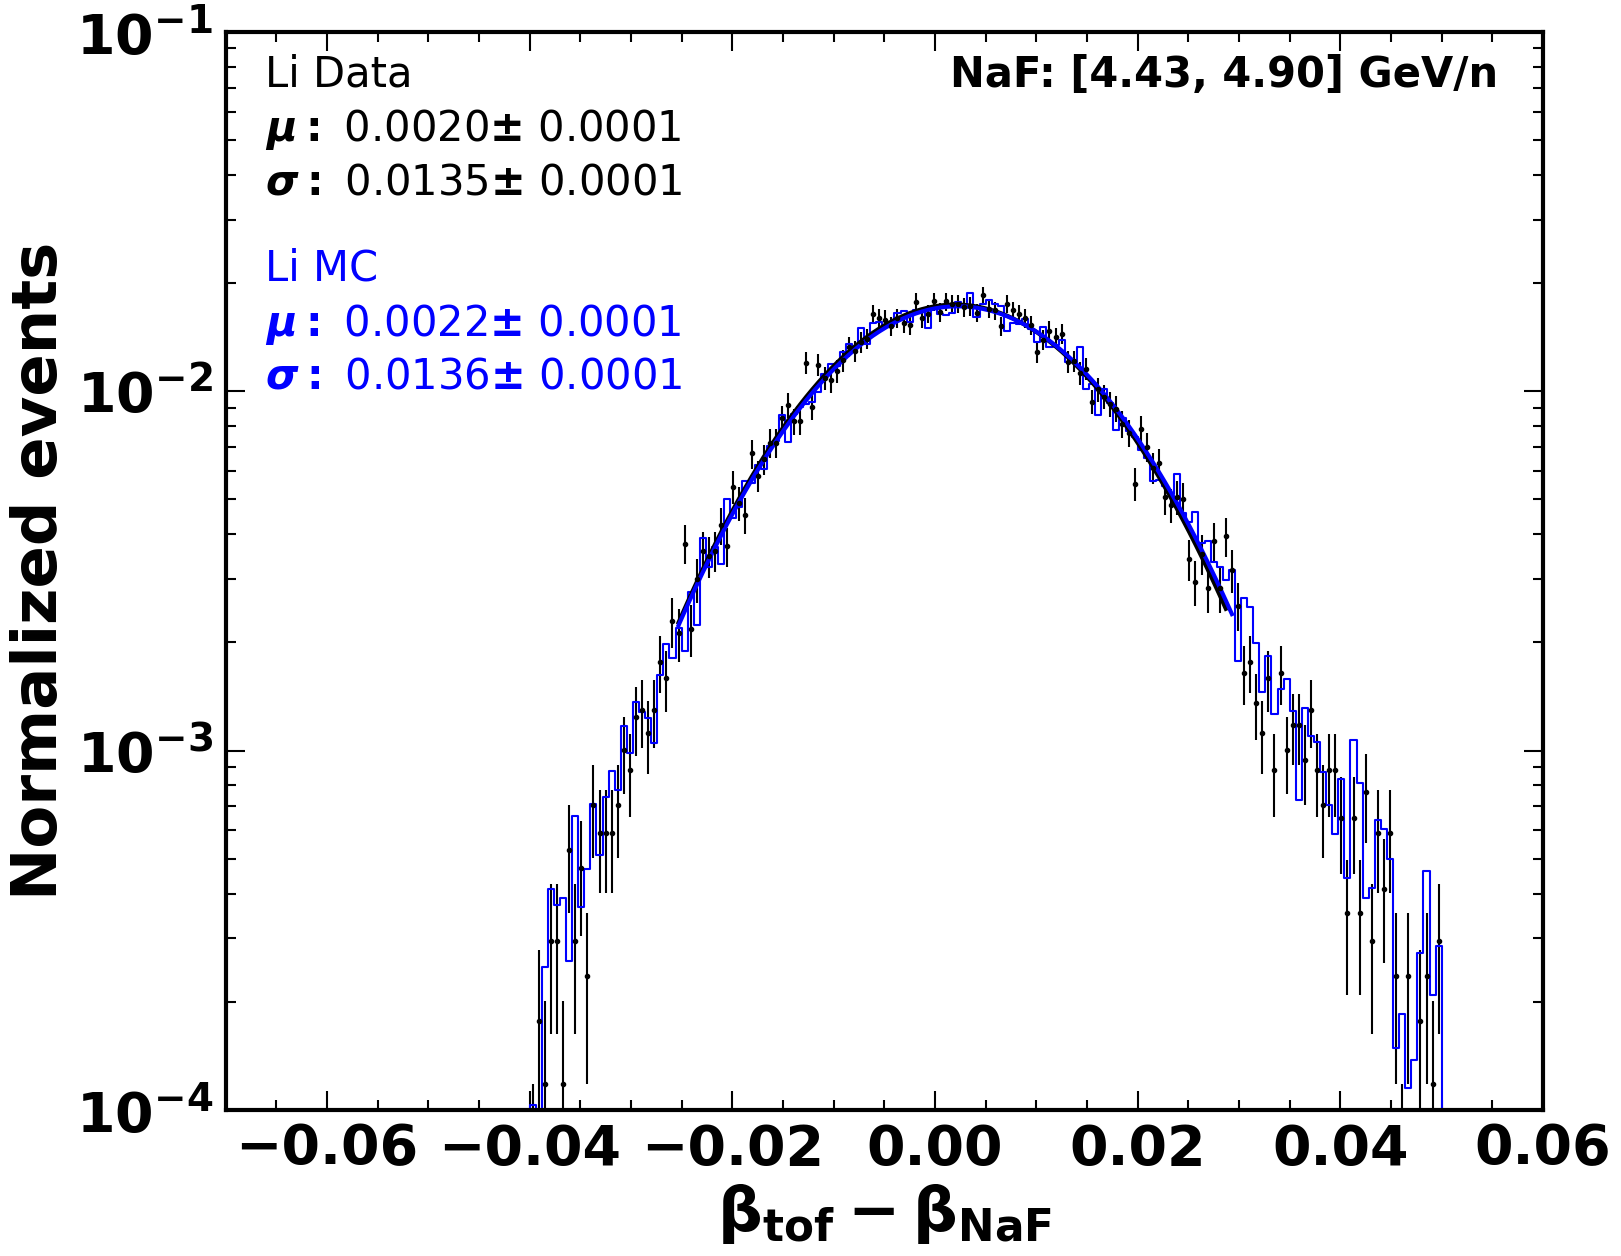

In [13]:
#minbin = {'NaF': 1, 'Agl': 10}
#maxbin = {'NaF': 40, 'Agl': 55}

minbin = {'NaF': 2, 'Agl': 6}
maxbin = {'NaF': 26, 'Agl': 19}

graph_mean_iss = dict()
graph_sigma_iss = dict()

graph_mean_mc = dict()
graph_sigma_mc = dict()
xrange = {'NaF':[-0.02, 0.03], 'Agl': [-0.01, 0.01]}
for dec in decs:
    energy_binvalues = hist2d_iss[dec].binnings[0].bin_centers[minbin[dec]:maxbin[dec]]
    print(hist2d_iss[dec].binnings[0].edges)
    graph_mean_iss[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_sigma_iss[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_mean_mc[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_sigma_mc[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))

    for ip, ibin in enumerate(range(minbin[dec], maxbin[dec])):
        hist1d_iss =  hist2d_iss[dec].project(ibin) 
        lowbinedge = hist2d_iss[dec].binnings[0].edges[ibin]
        upbinedge = hist2d_iss[dec].binnings[0].edges[ibin + 1]
        hist1d_iss = hist1d_iss * (1/np.sum(hist1d_iss.values))
        hist1d_mc = hist2d_mc[dec].project(ibin) 
        hist1d_mc = hist1d_mc * (1/np.sum(hist1d_mc.values))
    
 
        xbinrange = hist1d_iss.binnings[0].get_indices(xrange[dec])
        xedges_iss = hist1d_iss.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
        xvalue_iss = hist1d_iss.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
        yvalue_iss = hist1d_iss.values[xbinrange[0]:xbinrange[1]]
        yvalueserr_iss = np.sqrt(hist1d_iss.squared_values[xbinrange[0]:xbinrange[1]])
        yvalueserr_iss[yvalueserr_iss==0] = 0.0001
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
        yvalue_mc = hist1d_mc.values[xbinrange[0]:xbinrange[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange[0]:xbinrange[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
        guess_gaus_iss = dict(norm=0.0005, mu=0.01, sigma=0.005)
        guess_gaus_mc = dict(norm=0.0005, mu=0.01, sigma=0.01)
        #par_iss, parerr_iss = minuitfit_LL(yvalue_iss, xedges_iss , cumulative_norm_gaus, guess_gaus_iss)                                                                                                                  
        #par_mc, parerr_mc = minuitfit_LL(yvalue_mc, xedges_mc, cumulative_norm_gaus, guess_gaus_mc)  
        par_iss, parerr_iss = minuitfit_Chi(xvalue_iss, yvalue_iss, yvalueserr_iss, normalized_gaussian , guess_gaus_iss)
        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
        for key in guess_gaus_iss.keys():
            guess_gaus_iss[key] = par_iss[key]
            guess_gaus_mc[key] = par_mc[key]
    
        guess_gaus_iss['sigma'] = abs(guess_gaus_iss['sigma'])
        guess_gaus_mc['sigma'] = abs(guess_gaus_mc['sigma'])
        xrange_iter2 = [guess_gaus_iss['mu'] - 2.0 * guess_gaus_iss['sigma'], guess_gaus_iss['mu'] + 2.0 * guess_gaus_iss['sigma']]
        xbinrange2 = hist1d_iss.binnings[0].get_indices(xrange_iter2)
        xrange_iter2mc = [guess_gaus_mc['mu'] - 2.0 * guess_gaus_mc['sigma'], guess_gaus_mc['mu'] + 2.0 * guess_gaus_mc['sigma']]
        xbinrange2mc = hist1d_iss.binnings[0].get_indices(xrange_iter2mc)
    
        xedges_iss = hist1d_iss.binnings[0].edges[xbinrange2[0]:xbinrange2[1]+1]
        xvalue_iss = hist1d_iss.binnings[0].bin_centers[xbinrange2[0]:xbinrange2[1]]
        yvalue_iss = hist1d_iss.values[xbinrange2[0]:xbinrange2[1]]
        yvalueserr_iss = np.sqrt(hist1d_iss.squared_values[xbinrange2[0]:xbinrange2[1]])
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange2mc[0]:xbinrange2mc[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalue_mc = hist1d_mc.values[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange2mc[0]:xbinrange2mc[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
    
        par_iss, parerr_iss = minuitfit_Chi(xvalue_iss, yvalue_iss, yvalueserr_iss, normalized_gaussian , guess_gaus_iss)
        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
        #par_iss, parerr_iss = minuitfit_LL(yvalue_iss, xedges_iss , cumulative_norm_gaus, guess_gaus_iss)  
        #par_mc, parerr_mc = minuitfit_LL(yvalue_mc, xedges_mc , cumulative_norm_gaus, guess_gaus_mc)  
        #print("iss iter2:", par_iss) 
        #print("mc iter2:", par_mc) 
        graph_mean_iss[dec].yvalues[ip] = par_iss['mu']
        graph_mean_iss[dec].yerrs[ip] = parerr_iss['mu']
        graph_sigma_iss[dec].yvalues[ip] = abs(par_iss['sigma'])
        graph_sigma_iss[dec].yerrs[ip] = parerr_iss['sigma']
        graph_mean_mc[dec].yvalues[ip] = par_mc['mu']
        graph_mean_mc[dec].yerrs[ip] = parerr_mc['mu']
        graph_sigma_mc[dec].yvalues[ip] = abs(par_mc['sigma'])
        graph_sigma_mc[dec].yerrs[ip] = parerr_mc['sigma']
    
        fit_y_iss = normalized_gaussian(xvalue_iss, *par_iss)                                                                                                                                                              
        fit_y_mc = normalized_gaussian(xvalue_mc, *par_mc) 
    
        draw= False
        ips = [1, 3, 5, 10 , 13, 15]
        if ip in ips:
            figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
            plot_histogram_1d(ax1, hist1d_iss, style="iss", color=isscolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
            plot_histogram_1d(ax1, hist1d_mc, style="mc", color=mccolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
            #ax1.legend()
            ax1.plot(xvalue_iss, fit_y_iss, '-', linewidth=3, color='black')
            ax1.plot(xvalue_mc, fit_y_mc, '-', linewidth=3, color='blue')
            ax1.text(0.55, 0.98, f"{dec}: [{lowbinedge:.2f}, {upbinedge:.2f}] GeV/n", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold") 
            ax1.text(0.03, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
            ax1.text(0.03, 0.93, f"$\\mu:$ {par_iss['mu']:.4f}$\\pm$ {parerr_iss['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
            ax1.text(0.03, 0.88, f"$\\sigma:$ {par_iss['sigma']:.4f}$\\pm$ {parerr_iss['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
            ax1.set_ylim([0.0001, 0.1])
    
            ax1.text(0.03, 0.8, f'{MCName}', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.75, f"$\\mu:$ {par_mc['mu']:.4f}$\\pm$ {parerr_mc['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.7, f"$\\sigma:$ {par_mc['sigma']:.4f}$\\pm$ {parerr_mc['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.set_ylabel('Normalized events')
            ax1.set_xlabel(rf'$\mathrm{{\beta_{{tof}}-\beta_{{ {dec} }}}}$')
            ax1.set_xlim([-0.07, 0.06])
            ax1.set_yscale('log')
            set_plot_style(ax1)
            #plt.show(False)
            print(plotfile)
            savefig_tofile(figure, plotfile, f"hist1d_CompareTofNaF_{ibin}_{nuclei}{dec}", show=True) 


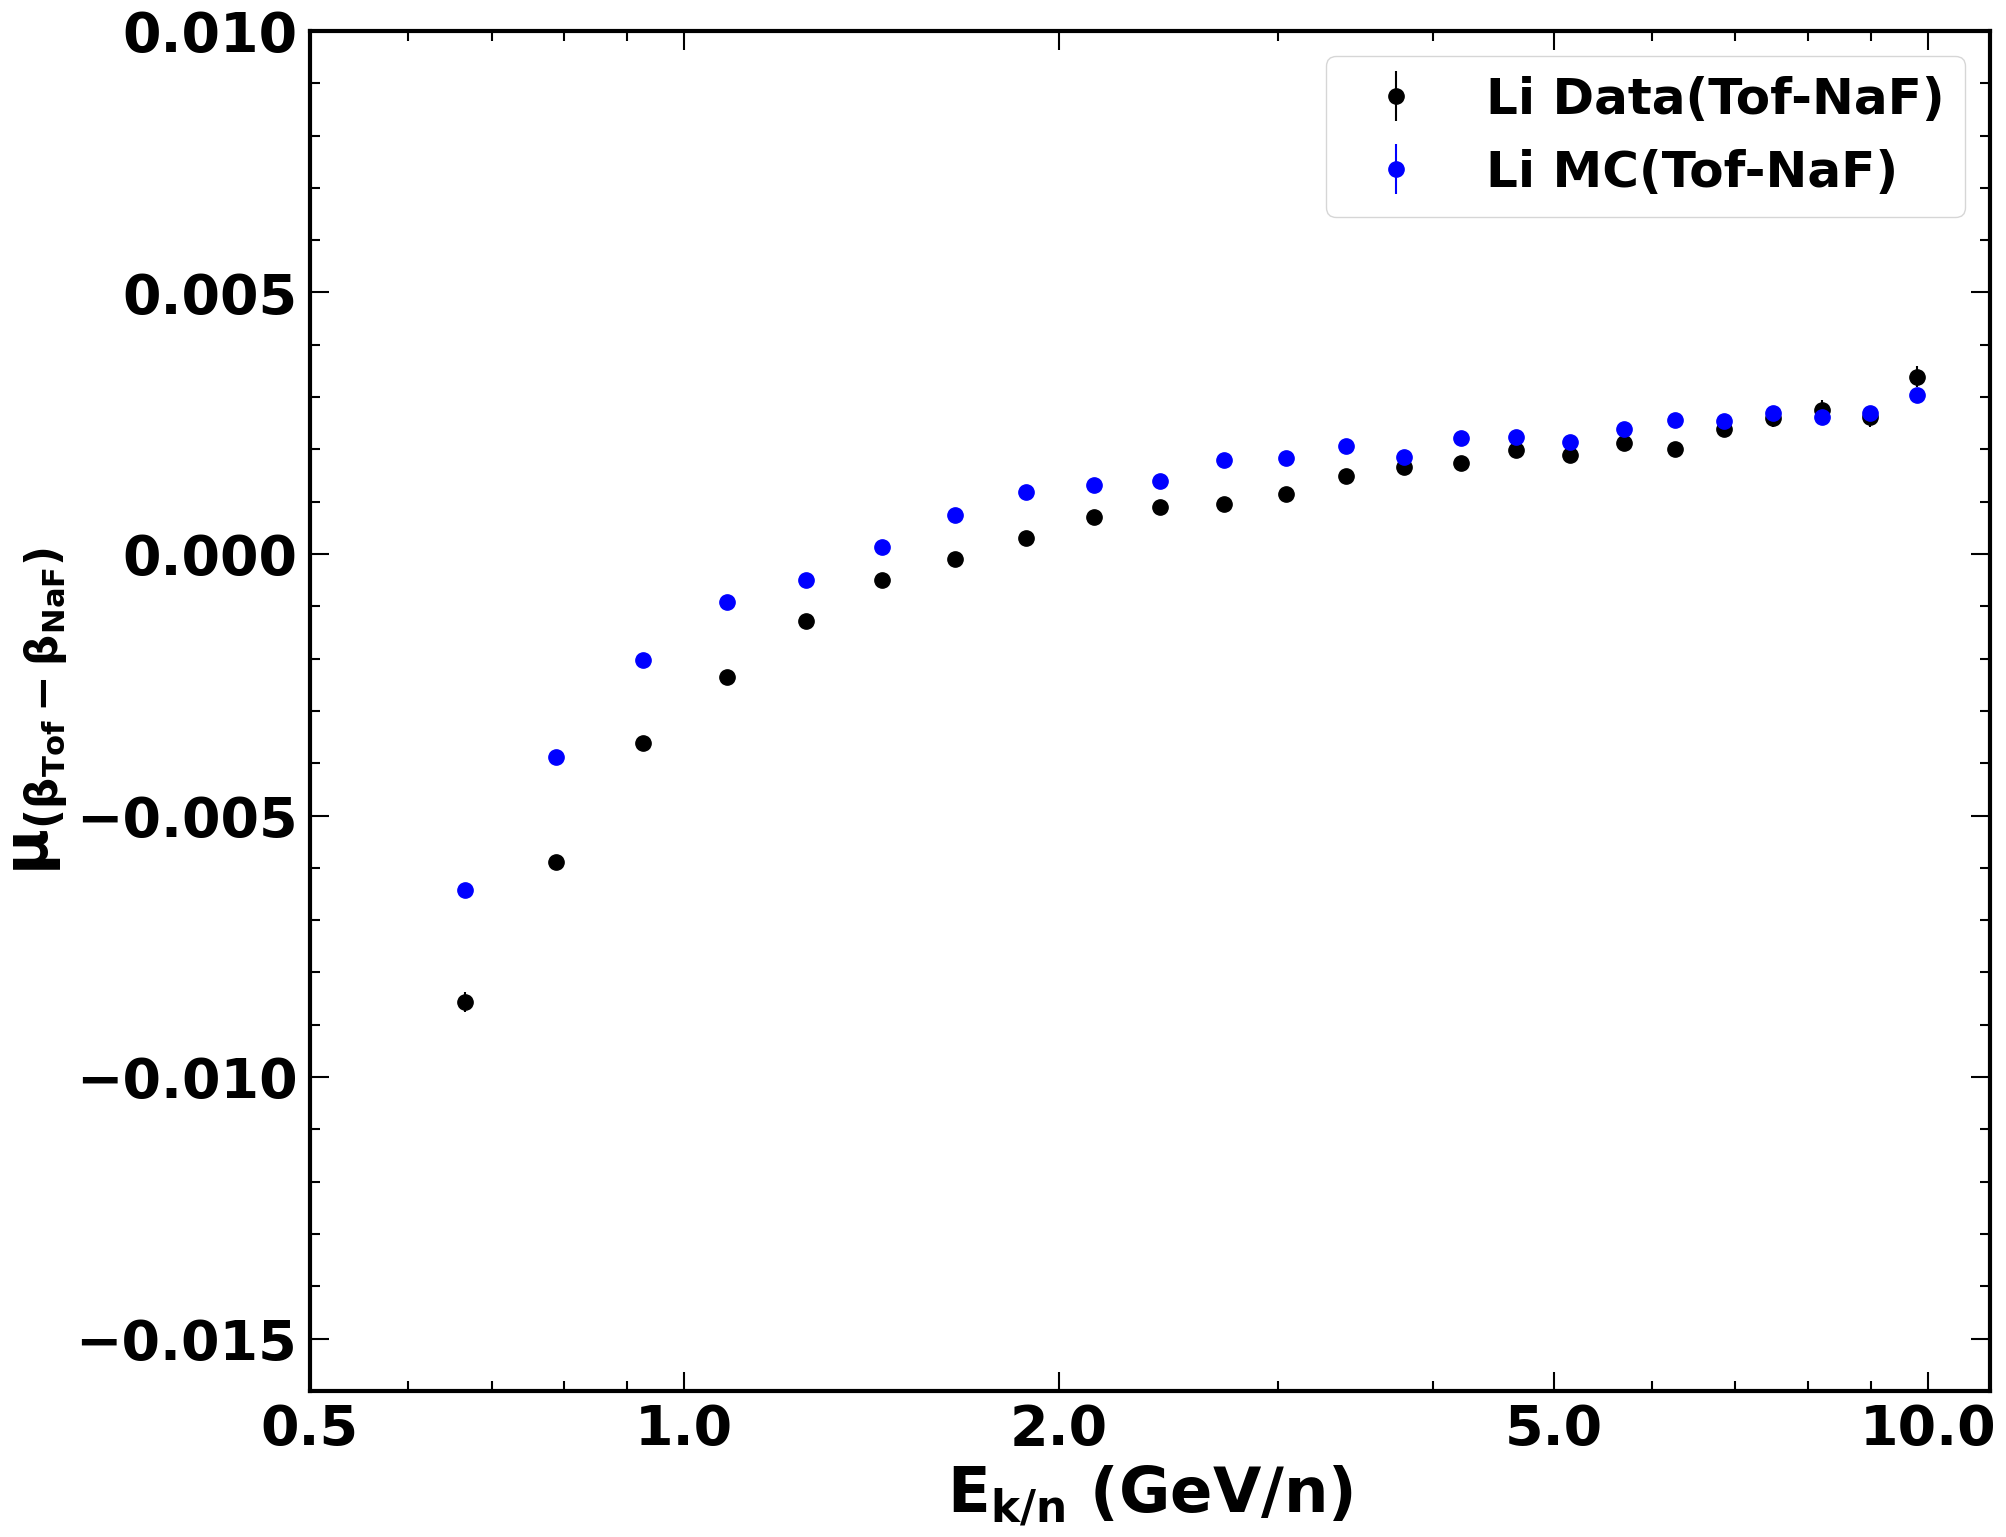

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
fig.subplots_adjust(left= 0.15, right=0.95, bottom=0.1, top=0.95)
isscol = {'NaF': 'black', 'Agl': 'tab:orange'}
mccol = {'NaF': 'blue', 'Agl': 'red'}
for dec in decs:
    plot_graph(fig, ax1, graph_mean_iss[dec], color=isscol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{nuclei} Data(Tof-{dec})') 
    plot_graph(fig, ax1, graph_mean_mc[dec], color=mccol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName}(Tof-{dec})')  
    
    ax1.set_xlabel(r'$\mathrm{E_{k/n} \ (GeV/n)}$')
    ax1.set_ylabel(r'$\mathrm{\mu_{(\beta_{Tof} - \beta_{NaF})}}$')
    ax1.legend()
    #ax1.text(0.05, 0.98, f'Be', fontsize=33, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black', weight='bold') 
    #ax1.text(0.15, 0.3, f'Data (Tof-NaF)', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black', weight='bold') 
    #ax1.text(0.6, 0.55, f'Data (Tof-Agl)', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='orange', weight='bold')  
    #ax1.text(0.15, 0.26, f'MC (Tof-NaF)', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='blue', weight='bold')
    #ax1.text(0.6, 0.6, f'MC (Tof-Agl)', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='red', weight='bold')  
    #ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
    #ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')
    ax1.set_ylim([-0.016, 0.01])
    set_plot_style(ax1)
    ax1.set_xticks([0.5, 1, 2, 5, 10])                                                                                                                                                                      
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plotfile = '/home/manbing/Documents/lithiumanalysis/slides/isotopes_06022024'
    savefig_tofile(fig, plotfile, f"graph_mean_{figsuffix}_{nuclei}_rebin", show=True) 


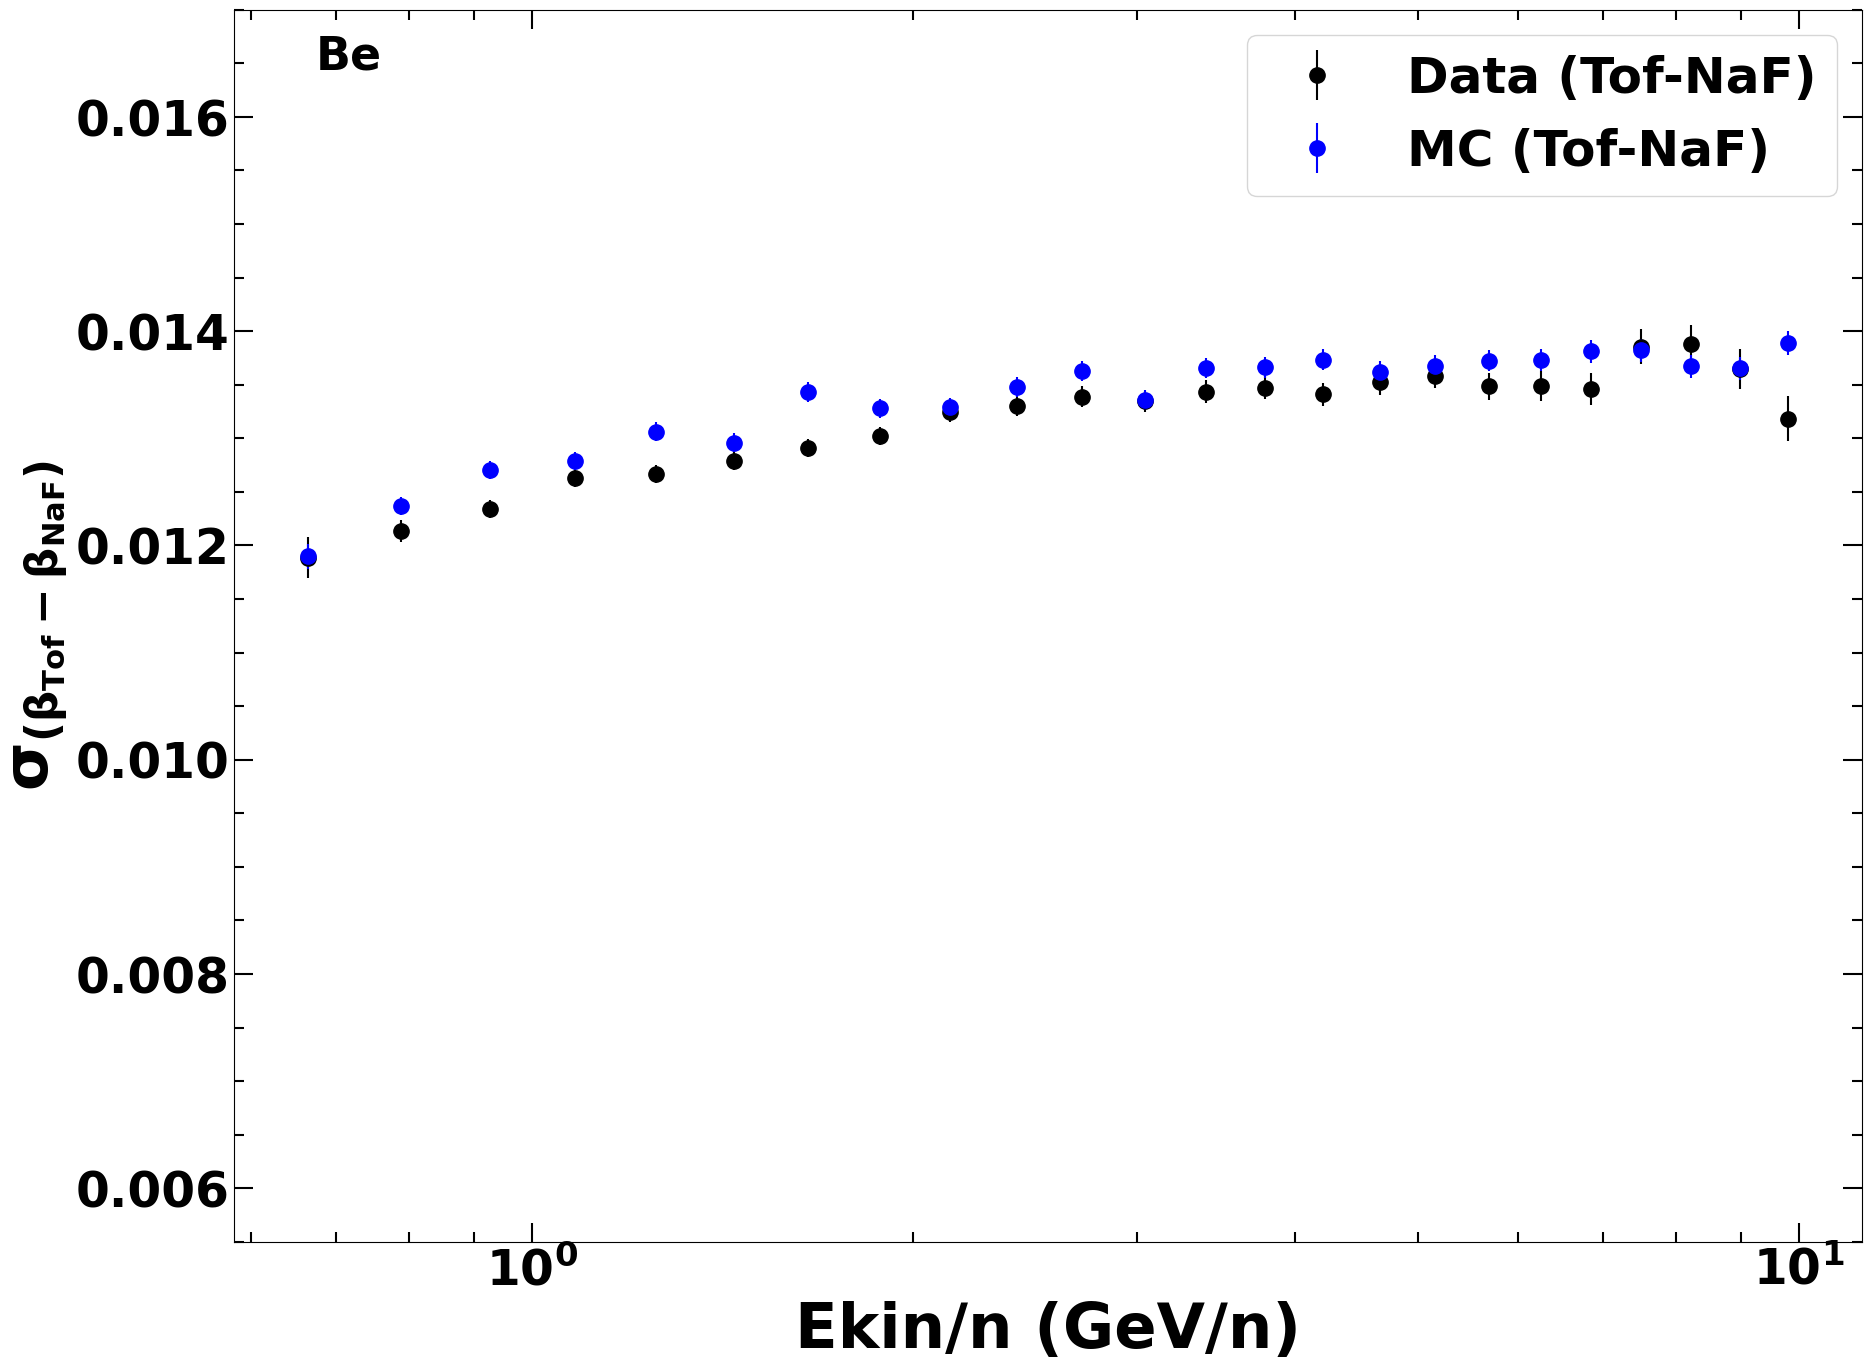

In [15]:
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))

for dec in ['NaF']:
    plot_graph(fig, ax1, graph_sigma_iss[dec], color=isscol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'Data (Tof-{dec})') 
    plot_graph(fig, ax1, graph_sigma_mc[dec], color=mccol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'MC (Tof-{dec})')  
    ax1.set_xlabel('Ekin/n (GeV/n)')
    ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{NaF})}}$')
    ax1.text(0.05, 0.98, f'Be', fontsize=33, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black', weight='bold') 
    #ax1.text(0.3, 0.33, f'Data (Tof-NaF)', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black', weight='bold') 
    #ax1.text(0.6, 0.48, f'Data (Tof-Agl)', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='orange', weight='bold')  
    #ax1.text(0.3, 0.7, f'MC (Tof-NaF)', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='blue', weight='bold')
    #ax1.text(0.6, 0.75, f'MC (Tof-Agl)', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='red', weight='bold')  
    ax1.set_ylim([0.0055, 0.017])
    ax1.legend()
    savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}_finebin", show=True) 

In [ ]:
#file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta1_refTrueBeta_B1236P8_mcweight.npz'
#file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_Reso.npz'
file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtInnTrk_B1236P8_mcweight_Tof_finebin.npz'
#file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_NaF_finebin.npz'
datatype = {'iss', 'mc'}
refGeo = 'A0'

with np.load(f'{file_tofbeta}') as npzfile:
    hist2d_mc_tofTrue = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_Tof")  
    
    fig = plt.figure(figsize=(20, 15))
    plot = fig.subplots(1, 1) 
    plot2dhist(fig, plot, xbinning=hist2d_mc_tofTrue.binnings[0].edges[1:-1], 
               ybinning=hist2d_mc_tofTrue.binnings[1].edges[1:-1], 
               counts=hist2d_mc_tofTrue.values[1:-1, 1:-1], 
               xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
               setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
    plot.text(0.05, 0.98, f"{nucleiname[nuclei]} MC", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
    plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
    plot.set_ylabel(r'$\mathrm{\beta_{tof} - \beta_{true}}$', fontsize=30)
    plot.set_xscale('log')
    #plot.set_xlim(gammalim[dec])
    savefig_tofile(fig, plotfile, f"hist2d_O16MC_betaResidual_{refGeo}Geo", show=True) 
 
  
                   

In [5]:
minbin = 2
maxbin = 65
energy_binvalues = hist2d_mc_tofTrue.binnings[0].bin_centers[minbin:maxbin]
graph_mean_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
graph_sigma_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))

for ip, ibin in enumerate(range(minbin, maxbin)):
   
    lowbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin]
    upbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin + 1]
    hist1d_mc = hist2d_mc_tofTrue.project(ibin) 
    hist1d_mc = hist1d_mc * (1/np.sum(hist1d_mc.values))
    
    xrange = [-0.06, 0.03]
    xbinrange = hist1d_mc.binnings[0].get_indices(xrange)
    
    xedges_mc = hist1d_mc.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
    xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
    yvalue_mc = hist1d_mc.values[xbinrange[0]:xbinrange[1]]
    yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange[0]:xbinrange[1]])
    yvalueserr_mc[yvalueserr_mc==0] = 0.0001
   
    guess_gaus_mc = dict(norm=0.0005, mu=0.001, sigma=0.007)

    par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
    for key in guess_gaus_mc.keys():
        guess_gaus_mc[key] = par_mc[key]
    
    xrange_iter2mc = [guess_gaus_mc['mu'] - 2.0 * guess_gaus_mc['sigma'], guess_gaus_mc['mu'] + 2.0 * guess_gaus_mc['sigma']]
    xbinrange2mc = hist1d_mc.binnings[0].get_indices(xrange_iter2mc)
    
    xedges_mc = hist1d_mc.binnings[0].edges[xbinrange2mc[0]:xbinrange2mc[1]+1]
    xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange2mc[0]:xbinrange2mc[1]]
    yvalue_mc = hist1d_mc.values[xbinrange2mc[0]:xbinrange2mc[1]]
    yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange2mc[0]:xbinrange2mc[1]])
    yvalueserr_mc[yvalueserr_mc==0] = 0.0001
    
    par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)

    graph_mean_mcTofTrueReso.yvalues[ip] = par_mc['mu']
    graph_mean_mcTofTrueReso.yerrs[ip] = parerr_mc['mu']
    graph_sigma_mcTofTrueReso.yvalues[ip] = par_mc['sigma']
    graph_sigma_mcTofTrueReso.yerrs[ip] = parerr_mc['sigma']
                                                                                                                                                            
    fit_y_mc = normalized_gaussian(xvalue_mc, *par_mc) 
    draw = False
    plotp = [0, 1, 2, 3, 60, 61]
    if ip in plotp:
        figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
        plot_histogram_1d(ax1, hist1d_mc, style="mc", color=mccolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
        #ax1.legend()
        ax1.plot(xvalue_mc, fit_y_mc, '-', linewidth=3, color='blue')
        ax1.text(0.6, 0.98, f"[{lowbinedge:.2f}, {upbinedge:.2f}] GeV/n", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold") 
   
        ax1.set_ylim([0.0001, 0.1])
    
        ax1.text(0.03, 0.8, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
        ax1.text(0.03, 0.75, f"$\\mu:$ {par_mc['mu']:.4f}$\\pm$ {parerr_mc['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
        ax1.text(0.03, 0.7, f"$\\sigma:$ {par_mc['sigma']:.4f}$\\pm$ {parerr_mc['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
        ax1.set_ylabel('Normalized events')
        ax1.set_xlabel(r'$\mathrm{\beta_{tof}-\beta_{naf}}$')
        ax1.set_xlim([-0.07, 0.06])
        ax1.set_yscale('log')
        savefig_tofile(figure, plotfile, f"hist1d_{figsuffix}_Compare_{ibin}_{nuclei}_A0", show=True) 
    


NameError: name 'hist2d_mc_tofTrue' is not defined

{'NaF': <tools.graphs.MGraph object at 0x7f05d746e560>}


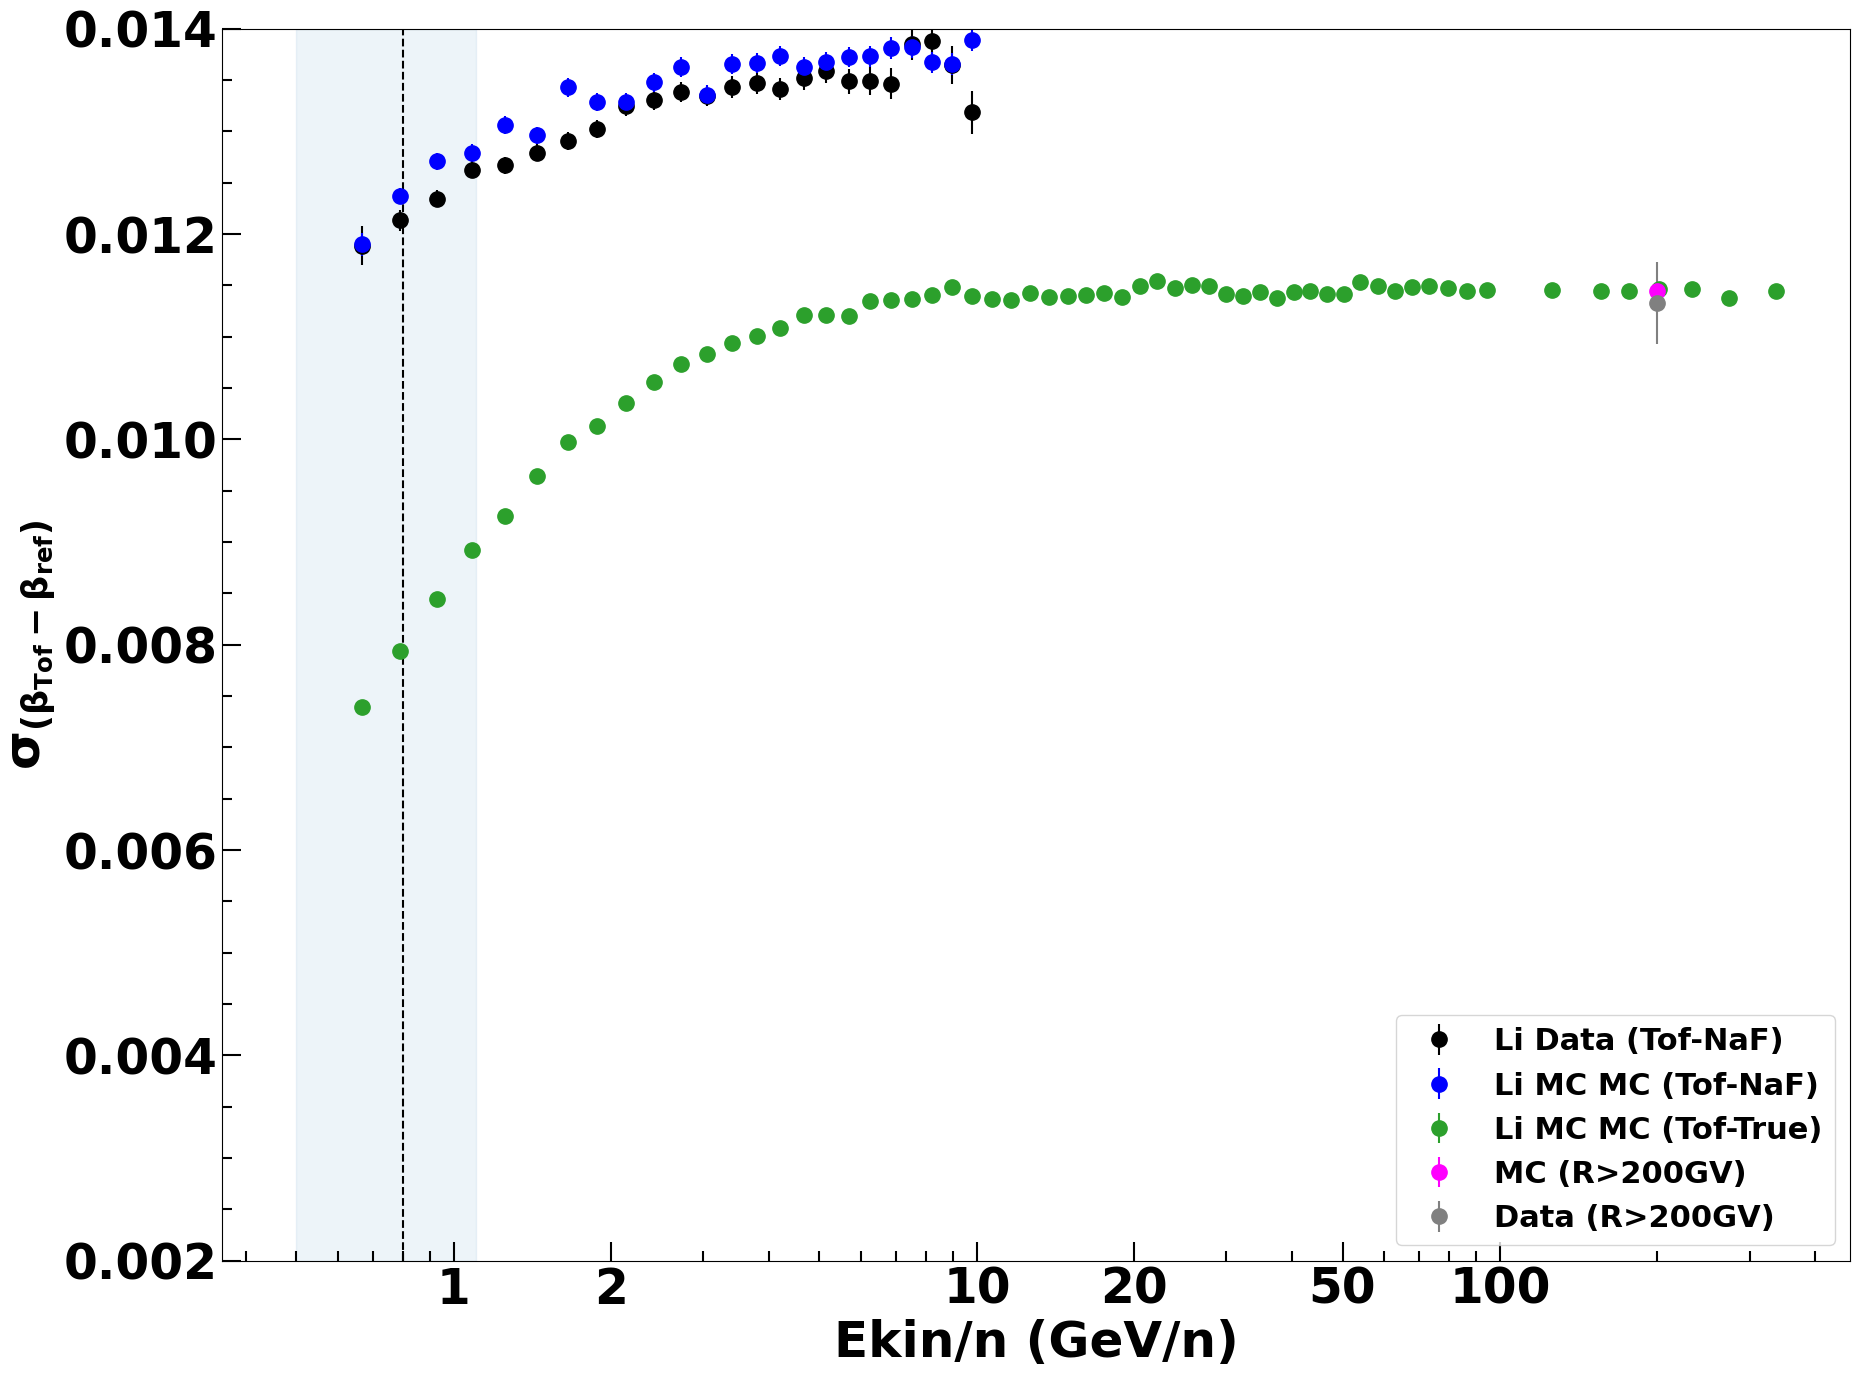

In [26]:

graph_sigma_isshighR = MGraph([200], [0.01133],  [0.0004])
graph_sigma_mchighR = MGraph([200], [0.01144], [0.00005])
graph_sigma_highR_ratio = graph_sigma_isshighR/graph_sigma_mchighR
graph_sigma_highR_ratio.yerrs = graph_sigma_highR_ratio.yerrs * 0.5
graph_sigma_datamcratio = {}

print(graph_sigma_mc)
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
for dec in decs:
    plot_graph(fig, ax1, graph_sigma_iss[dec], color=isscol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{nuclei} Data (Tof-{dec})') 
for dec in decs:
    graph_sigma_datamcratio[dec] = graph_sigma_iss[dec]/graph_sigma_mc[dec]
    plot_graph(fig, ax1, graph_sigma_mc[dec], color=mccol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-{dec})')  

    
plot_graph(fig, ax1, graph_sigma_mcTofTrueReso, color='tab:green',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-True)') 
graph_sigma_datamcratio_highR = graph_sigma_isshighR/graph_sigma_mchighR
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)') 
ax1.set_xlabel('Ekin/n (GeV/n)')

ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$')


#ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
#ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
ax1.set_ylim([0.002, 0.014])
ax1.set_xscale('log')
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks

ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels)
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.5, 1.1, alpha=0.08, color="tab:blue")
ax1.axvline(x=0.8, color='black', linestyle='--')
ax1.legend(loc='lower right', fontsize=22)
#ax2.axhline(y=0.8, color='black', linestyle='--')
savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}all_TrueAtRICH_{refGeo}Geo_finebin", show=True) 







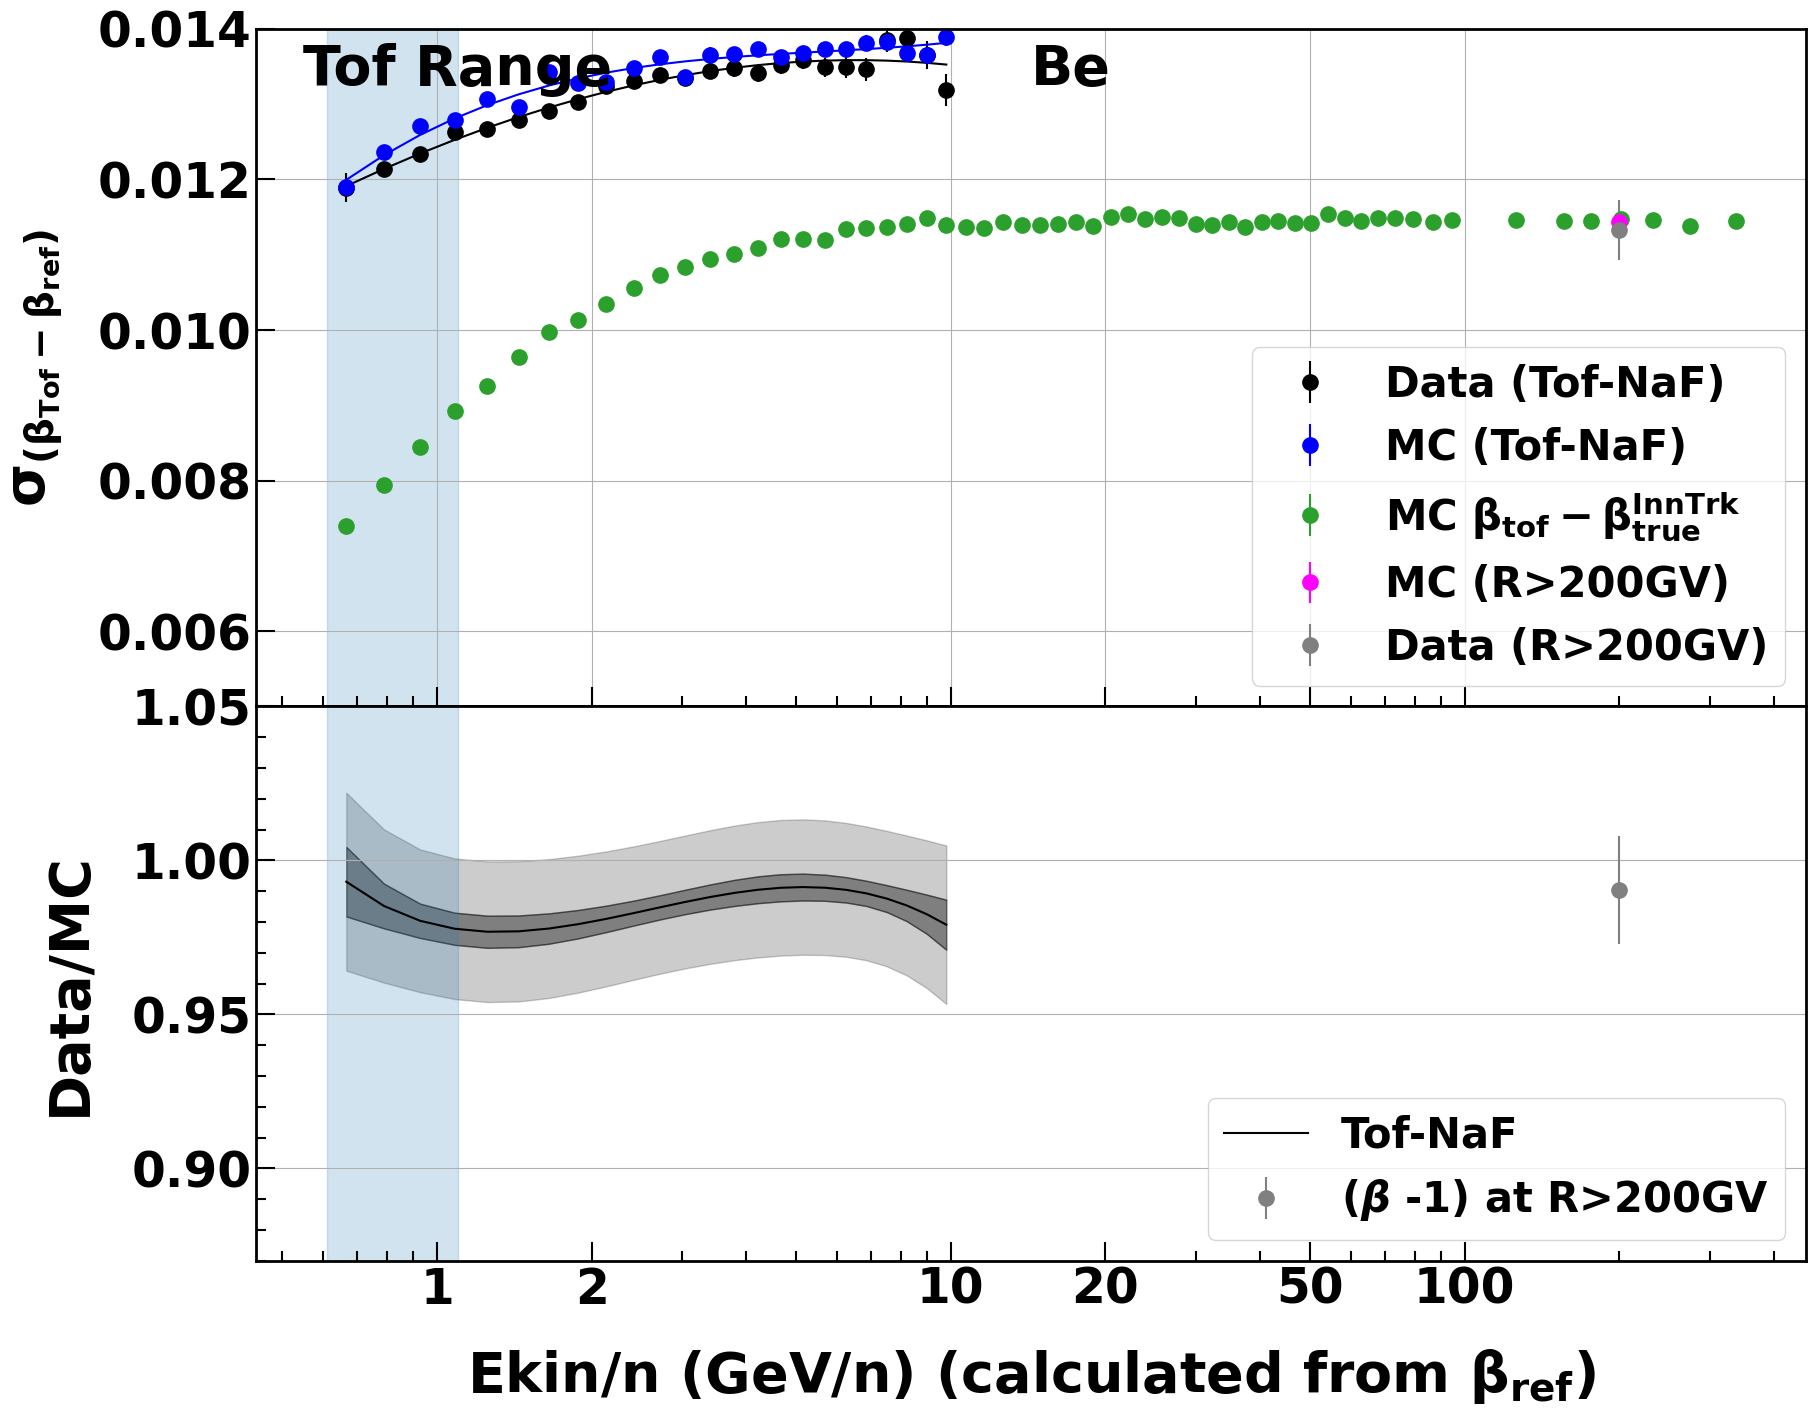

In [27]:
from tools.utilities import save_spline_to_file
from scipy.interpolate import interp1d, UnivariateSpline

def set_plotstyle(ax1, ax2):
    plt.subplots_adjust(hspace=.0)   
    set_plot_defaultstyle(ax1)
    set_plot_defaultstyle(ax2)
    ax1.set_xticklabels([])
    
def getpolyfit(agraph, p0):
    popt, pcov = curve_fit(poly, np.log(agraph.xvalues), agraph.yvalues, p0 = p0)
    polypars = uncertainties.correlated_values(popt, np.array(pcov)) 
    yfit, yfiterr = get_fitpdf_witherr(np.log(agraph.xvalues), polypars, upoly)
    graph_fit = MGraph(agraph.xvalues, yfit, yfiterr)
    return graph_fit, polypars
       
graphfit_sigma_iss = {}
polypars_iss = {}

graphfit_sigma_mc = {}
polypars_mc = {}

polyfitrange = {'NaF': [0.6, 30], 'Agl':[2, 100]}
figsize = (20, 16)
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.55, 0.45]}, figsize=figsize) 
set_plotstyle(ax1, ax2)
dects = ['NaF']

for dec in dects:
    slicegraph_iss = slice_graph_by_value(graph_sigma_iss[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_iss, color=isscol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (Tof-{dec})')
    graphfit_sigma_iss[dec], polypars_iss[dec] = getpolyfit(slicegraph_iss, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_iss[dec], color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
for dec in dects:
    slicegraph_mc = slice_graph_by_value(graph_sigma_mc[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_mc, color=mccol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Tof-{dec})')  
    graphfit_sigma_mc[dec], polypars_mc[dec] = getpolyfit(slicegraph_mc, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_mc[dec], color=mccol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
    
plot_graph(fig, ax1, graph_sigma_mcTofTrueReso, color='tab:green',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{MC  \ \beta_{{tof}}-\beta^{{InnTrk}}_{{true}} }}$') 
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)') 

ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$')

graphfit_sigma_datamcratio = {}
graphfit_sigma_datamcratio_lowlimit = {}
graphfit_sigma_datamcratio_uplimit = {}
spline_tofbeta_sigmacorrecton = {} 

for dec in ['NaF']:
    graphfit_sigma_datamcratio = graphfit_sigma_iss[dec]/graphfit_sigma_mc[dec]
    #slicegraph_ratio = slice_graph_by_value(graph_sigma_datamcratio[dec], [0.83, 500])
    #if dec == 'NaF':
    #graphfit_sigma_datamcratio.yvalues[0] = 1.0
    plot_graph(fig, ax2, graphfit_sigma_datamcratio, color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22, label=f'Tof-{dec}') 
    spline_tofbeta_sigmacorrecton[dec] = UnivariateSpline(np.log(graphfit_sigma_datamcratio.xvalues), graphfit_sigma_datamcratio.yvalues, k=3, s=5) 
    save_spline_to_file(spline_tofbeta_sigmacorrecton[dec], datadir, f"{nuclei}_spline_tofbeta_sigmakorr_{dec}.pickle")
    
    #print(spline_tofbeta_sigmacorrecton[dec](np.log(graphfit_sigma_datamcratio.xvalues)))
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs , graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs, color=isscol[dec], alpha=0.5) 
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs, graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs + graph_sigma_highR_ratio.yerrs , color=isscol[dec], alpha=0.2) 
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs-graph_sigma_highR_ratio.yerrs , graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs, color=isscol[dec], alpha=0.2) 
    
plot_graph(fig, ax2, graph_sigma_highR_ratio, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=rf'($\beta$ -1) at R>200GV') 

ax1.set_xscale('log')
ax1.legend(loc='lower right', fontsize=30)

custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
ax2.set_xscale('log')
SetAx1Axis(ax1, r'', r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$', TEXTSIZE, xlimrange=None, ylimrange=[0.005, 0.014], custom_ticks=custom_ticks, gridx=False, gridy=True)
SetAx1Axis(ax2, r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{ref}}$)', 'Data/MC', TEXTSIZE, xlimrange=None, ylimrange=[0.87, 1.05], custom_ticks=custom_ticks, custom_tickslabels=custom_labels, gridx=False, gridy=True)

ax2.legend(loc='lower right', fontsize=30)
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax2.fill_betweenx(np.linspace(0.4, 1.22, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")

ax1.sharex(ax2)
ax1.grid(axis='x')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")   
ax1.text(0.5, 0.98, f"Be", fontsize=TEXTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.03, 0.98, f"Tof Range", fontsize=TEXTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")  
#plotfile='/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'
savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}all_TrueAtRICH_refNaF_finebin", show=True) 


/home/manbing/Documents/lithiumanalysis/slides/isotopes_06022024


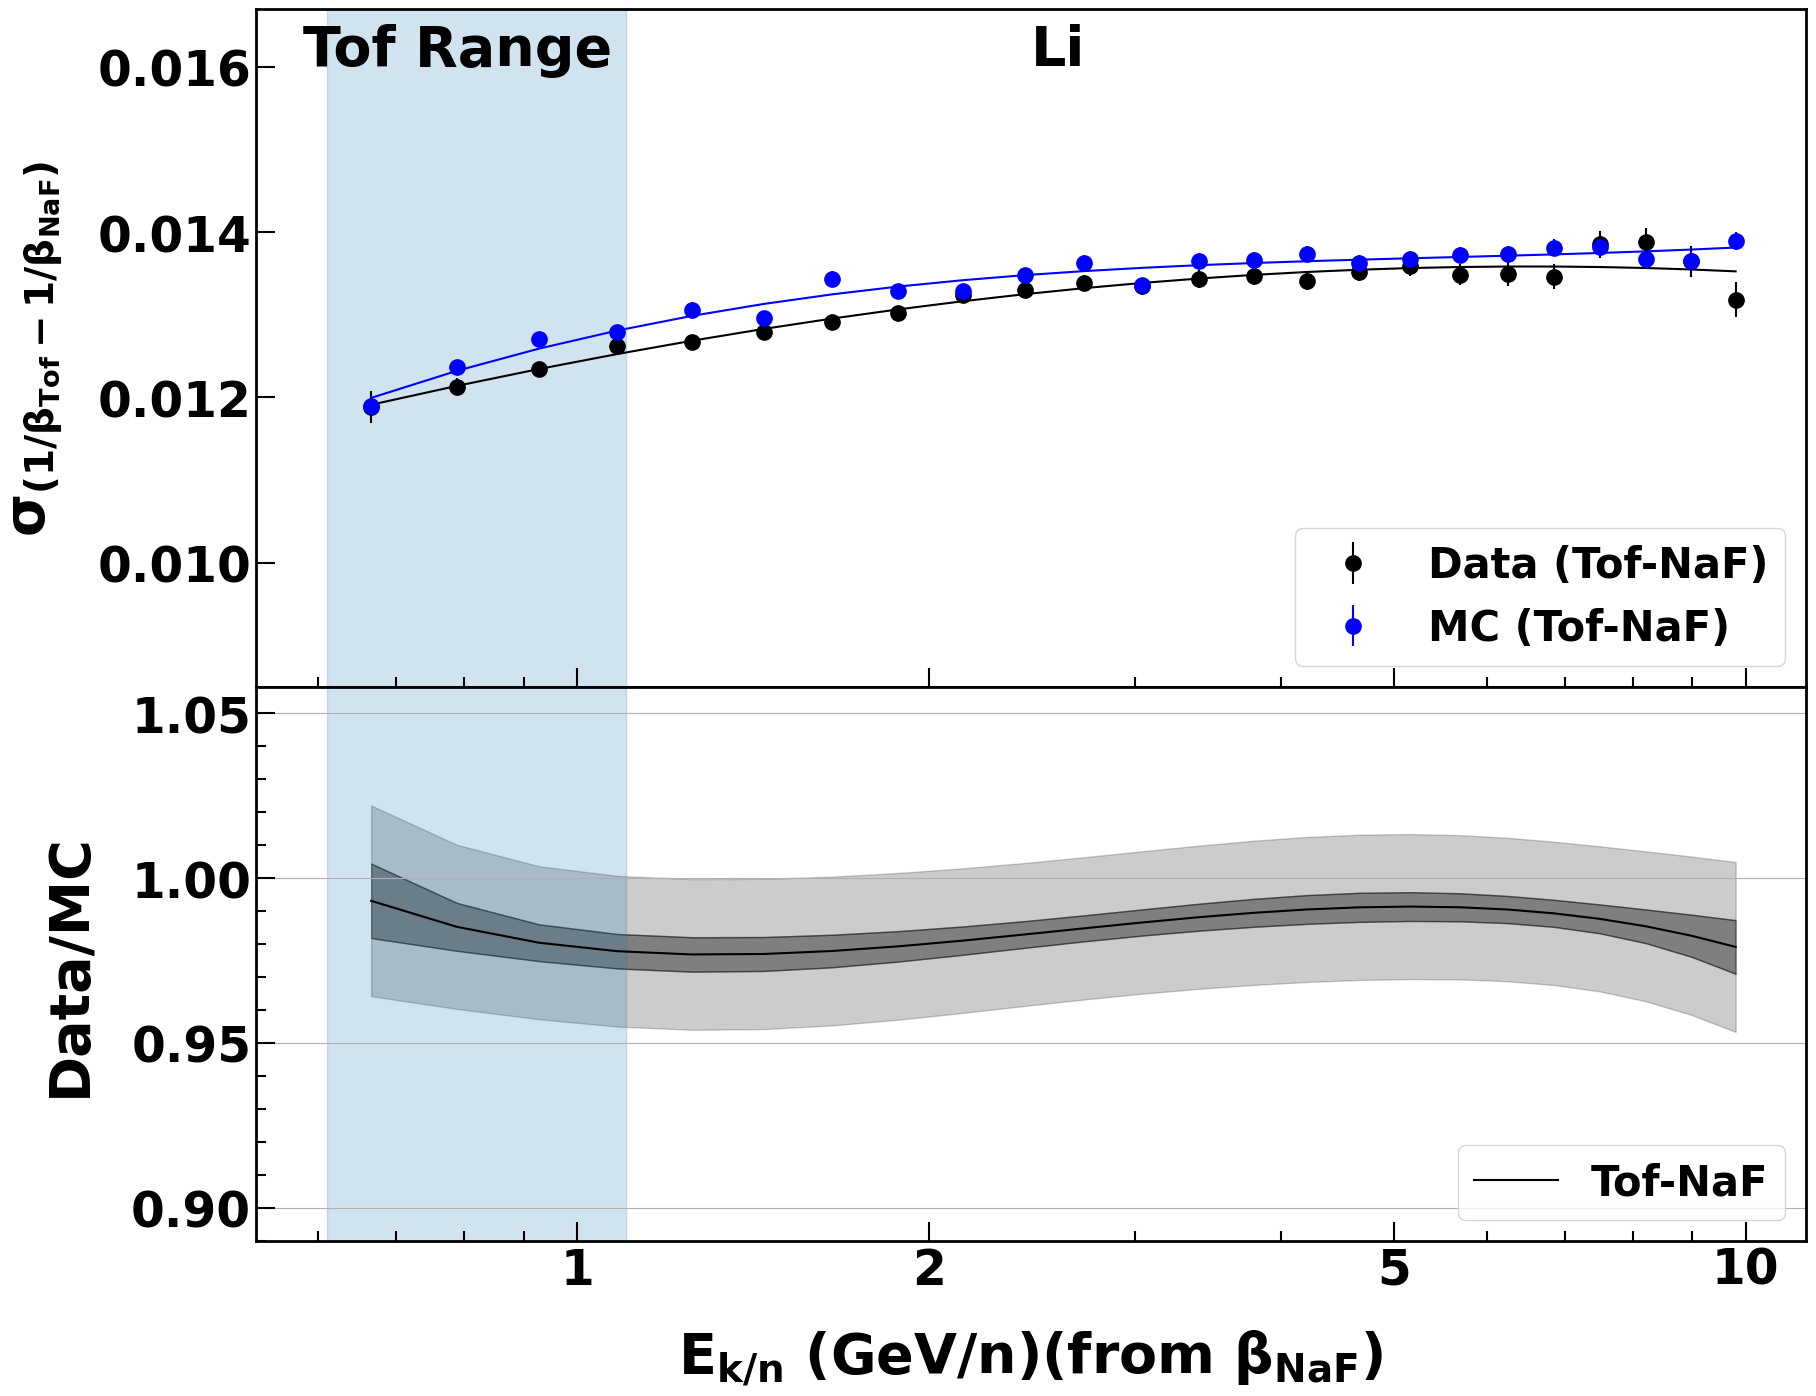

In [28]:

from tools.utilities import save_spline_to_file
from scipy.interpolate import interp1d, UnivariateSpline

def set_plotstyle(ax1, ax2):
    plt.subplots_adjust(hspace=.0)   
    set_plot_defaultstyle(ax1)
    set_plot_defaultstyle(ax2)
    ax1.set_xticklabels([])
    
def getpolyfit(agraph, p0):
    popt, pcov = curve_fit(poly, np.log(agraph.xvalues), agraph.yvalues, p0 = p0)
    polypars = uncertainties.correlated_values(popt, np.array(pcov)) 
    yfit, yfiterr = get_fitpdf_witherr(np.log(agraph.xvalues), polypars, upoly)
    graph_fit = MGraph(agraph.xvalues, yfit, yfiterr)
    return graph_fit, polypars
       
graphfit_sigma_iss = {}
polypars_iss = {}

graphfit_sigma_mc = {}
polypars_mc = {}

polyfitrange = {'NaF': [0.6, 30], 'Agl':[2, 100]}
figsize = (20, 16)
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.55, 0.45]}, figsize=figsize) 
set_plotstyle(ax1, ax2)
dects = ['NaF']

for dec in dects:
    slicegraph_iss = slice_graph_by_value(graph_sigma_iss[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_iss, color=isscol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (Tof-{dec})')
    graphfit_sigma_iss[dec], polypars_iss[dec] = getpolyfit(slicegraph_iss, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_iss[dec], color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
for dec in dects:
    slicegraph_mc = slice_graph_by_value(graph_sigma_mc[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_mc, color=mccol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Tof-{dec})')  
    graphfit_sigma_mc[dec], polypars_mc[dec] = getpolyfit(slicegraph_mc, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_mc[dec], color=mccol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
    
#plot_graph(fig, ax1, graph_sigma_mcTofTrueReso, color='tab:green',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{MC  \ \beta_{{tof}}-\beta^{{InnTrk}}_{{true}} }}$') 
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
#plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)') 

ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$')

graphfit_sigma_datamcratio = {}
graphfit_sigma_datamcratio_lowlimit = {}
graphfit_sigma_datamcratio_uplimit = {}
spline_tofbeta_sigmacorrecton = {} 

for dec in ['NaF']:
    graphfit_sigma_datamcratio = graphfit_sigma_iss[dec]/graphfit_sigma_mc[dec]
    #slicegraph_ratio = slice_graph_by_value(graph_sigma_datamcratio[dec], [0.83, 500])
    #if dec == 'NaF':
    #graphfit_sigma_datamcratio.yvalues[0] = 1.0
    plot_graph(fig, ax2, graphfit_sigma_datamcratio, color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22, label=f'Tof-{dec}') 
    spline_tofbeta_sigmacorrecton[dec] = UnivariateSpline(np.log(graphfit_sigma_datamcratio.xvalues), graphfit_sigma_datamcratio.yvalues, k=3, s=5) 
    save_spline_to_file(spline_tofbeta_sigmacorrecton[dec], datadir, f"{nuclei}_spline_tofbeta_sigmakorr_{dec}.pickle")
    
    #print(spline_tofbeta_sigmacorrecton[dec](np.log(graphfit_sigma_datamcratio.xvalues)))
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs , graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs, color=isscol[dec], alpha=0.5) 
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs, graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs + graph_sigma_highR_ratio.yerrs , color=isscol[dec], alpha=0.2) 
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs-graph_sigma_highR_ratio.yerrs , graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs, color=isscol[dec], alpha=0.2) 
    
#plot_graph(fig, ax2, graph_sigma_highR_ratio, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=rf'($\beta$ -1) at R>200GV') 

ax1.set_xscale('log')
ax1.legend(loc='lower right', fontsize=30)

custom_ticks = [1, 2, 5, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '5', '10', '20', '50', '100']  # Labels for the ticks
ax2.set_xscale('log')
SetAx1Axis(ax1, r'', r'$\mathrm{\sigma_{(1/\beta_{Tof} - 1/\beta_{NaF})}}$', TEXTSIZE, xlimrange=None, ylimrange=[0.0085, 0.0167], custom_ticks=custom_ticks, gridx=False, gridy=True)
SetAx1Axis(ax2, r'$\mathrm{E_{k/n} \ (GeV/n) (from \  \beta_{NaF})}$', 'Data/MC', TEXTSIZE, xlimrange=None, ylimrange=[0.89, 1.058], custom_ticks=custom_ticks, custom_tickslabels=custom_labels, gridx=False, gridy=True)

ax2.legend(loc='lower right', fontsize=30)
ax1.fill_betweenx(np.linspace(0.002, 0.017, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax2.fill_betweenx(np.linspace(0.4, 1.22, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")

ax1.sharex(ax2)
ax1.grid(axis='y')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")   
ax1.text(0.5, 0.98, f"{nuclei}", fontsize=TEXTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.03, 0.98, f"Tof Range", fontsize=TEXTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")  
#plotfile='/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'
#plotfile = '/home/manbing/Documents/phdthesis/images/chap05_BeIso'
print(plotfile)
savefig_tofile(fig, plotfile, f"Li_graph_sigma_compareTofNaF1308", show=True) 


[0.9926304  0.98538371 0.98072295 0.97808776 0.97697837 0.97698279
 0.97778468 0.97913414 0.98083617 0.98271159 0.98461009 0.98642526
 0.98806736 0.98944974 0.99051164 0.99119926 0.99146423 0.99126412
 0.99057817 0.9894107  0.9876879  0.98537448 0.98244887 0.97890132]


KeyError: 'Agl'

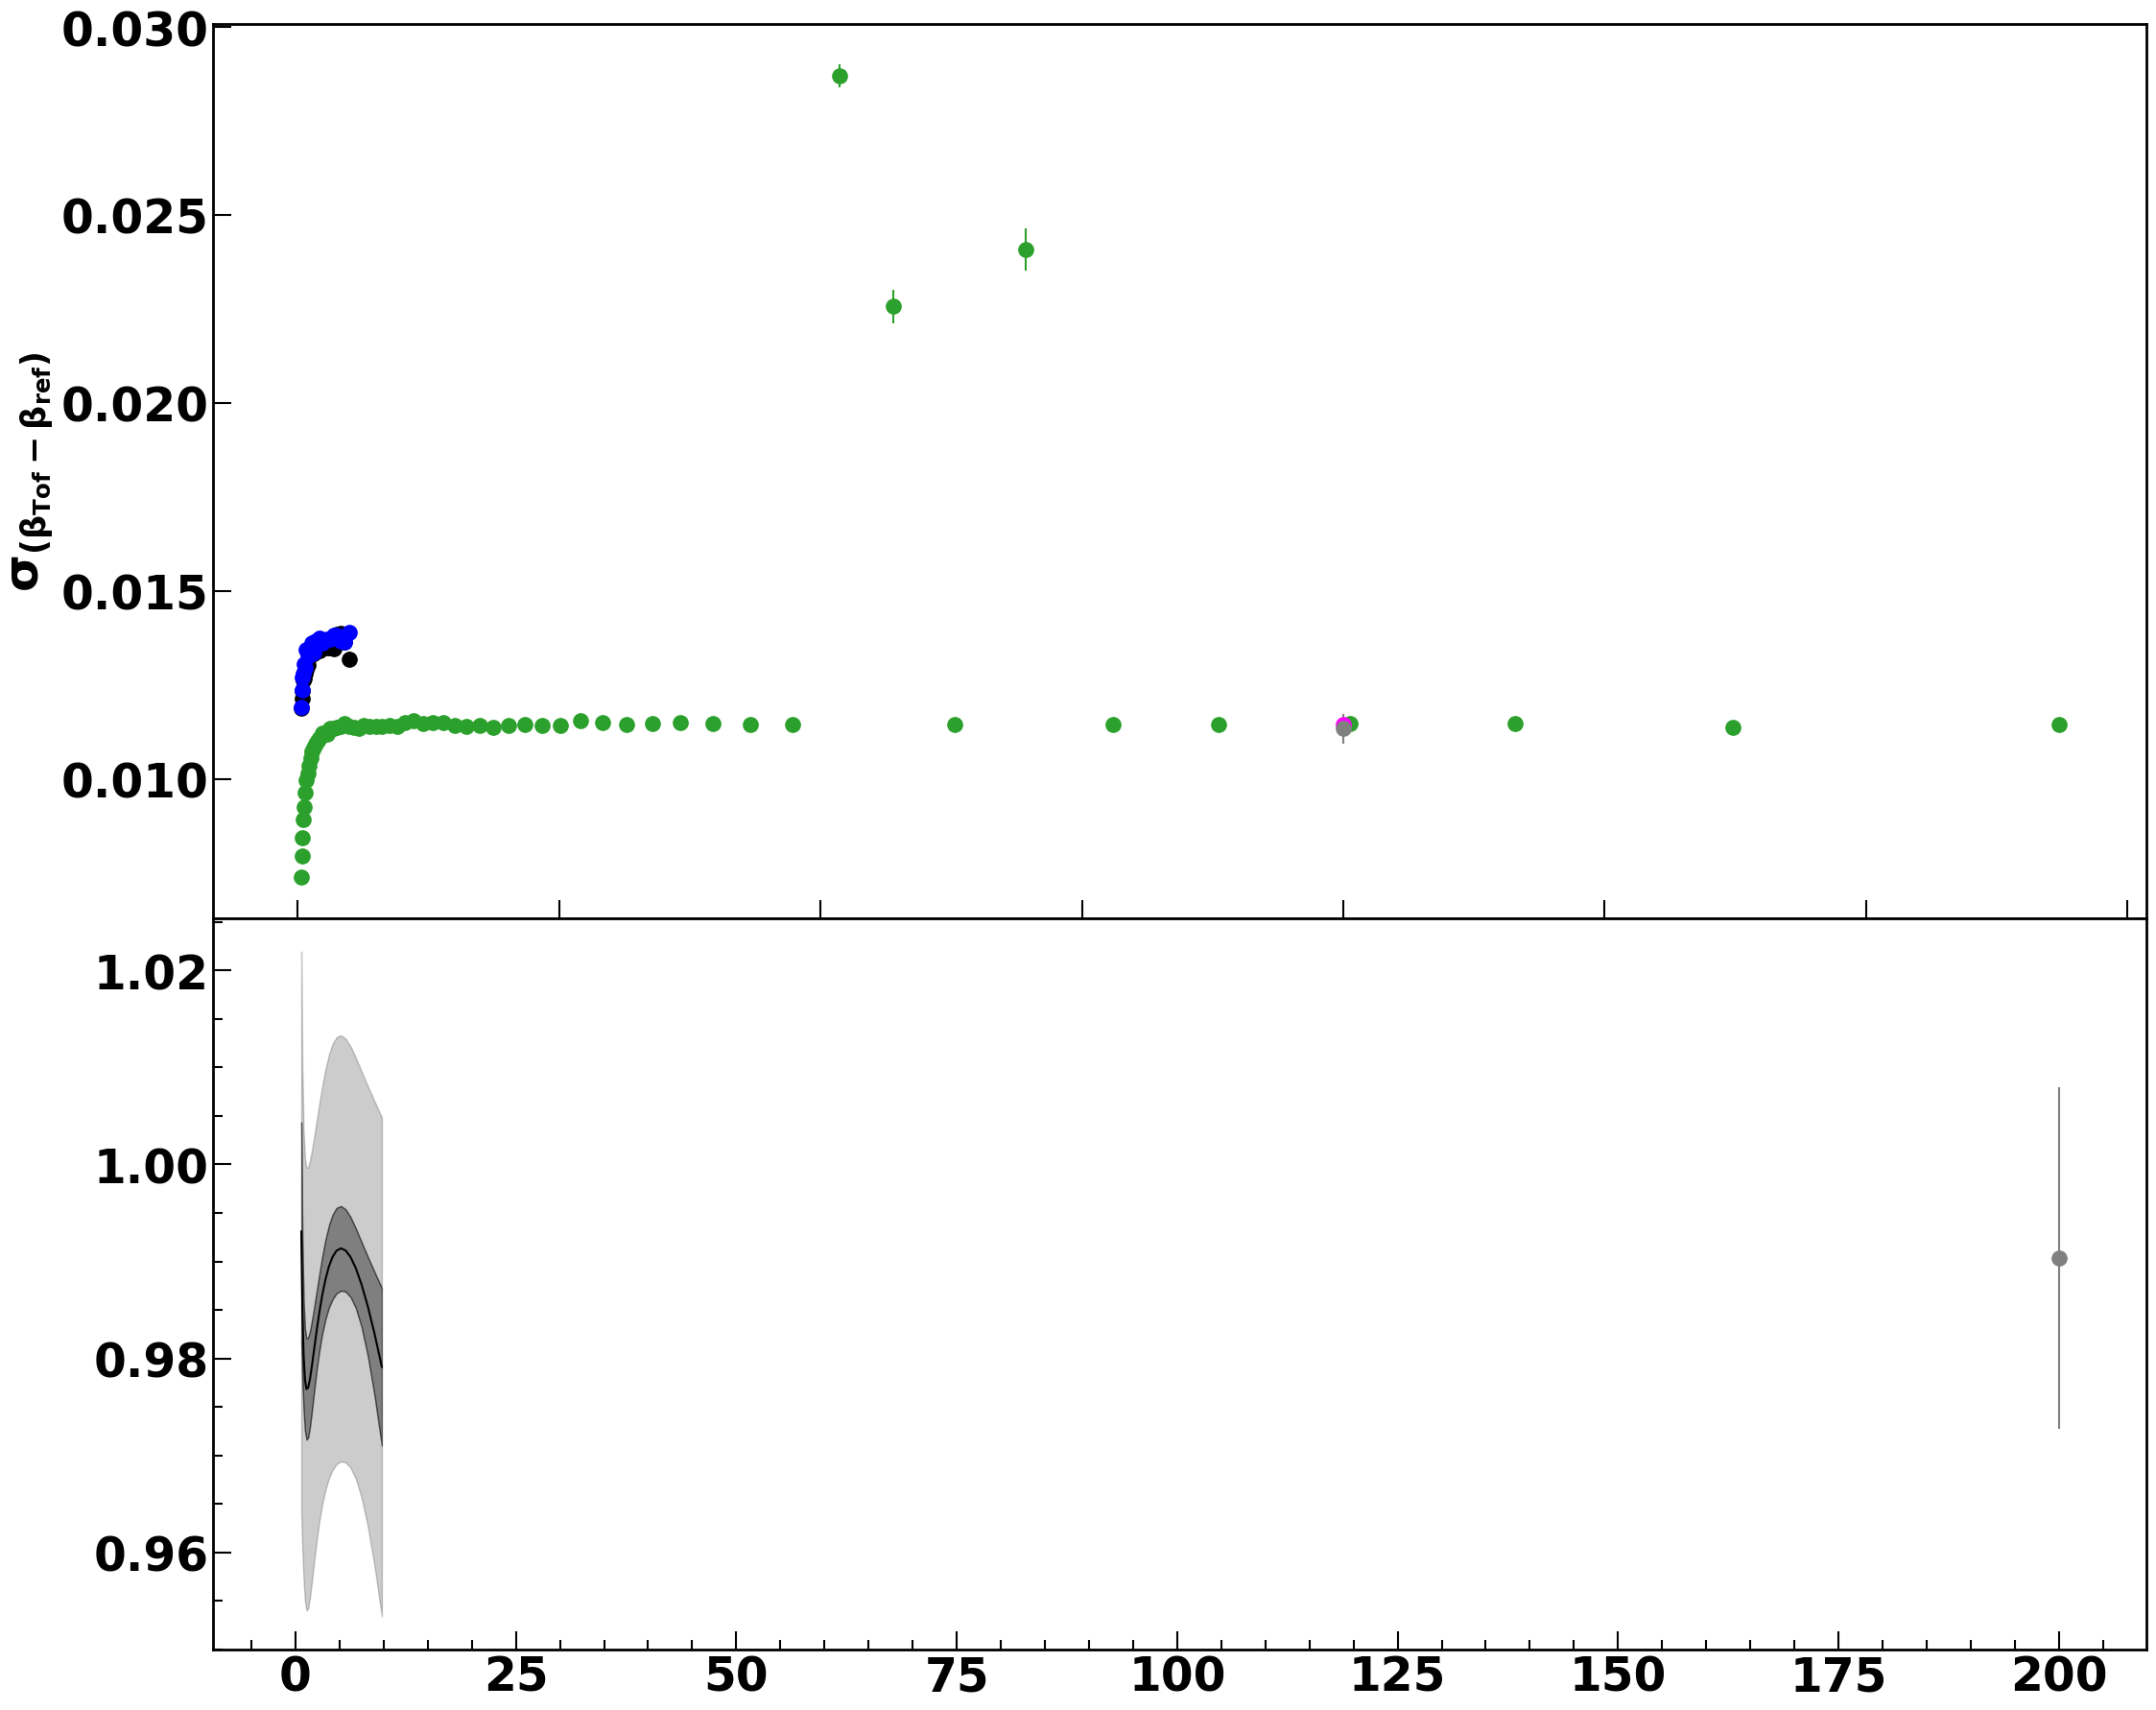

In [29]:
from tools.utilities import save_spline_to_file
from scipy.interpolate import interp1d, UnivariateSpline

def set_plotstyle(ax1, ax2):
    plt.subplots_adjust(hspace=.0)   
    set_plot_defaultstyle(ax1)
    set_plot_defaultstyle(ax2)
    ax1.set_xticklabels([])
    
def getpolyfit(agraph, p0):
    popt, pcov = curve_fit(poly, np.log(agraph.xvalues), agraph.yvalues, p0 = p0)
    polypars = uncertainties.correlated_values(popt, np.array(pcov)) 
    yfit, yfiterr = get_fitpdf_witherr(np.log(agraph.xvalues), polypars, upoly)
    graph_fit = MGraph(agraph.xvalues, yfit, yfiterr)
    return graph_fit, polypars
       
graphfit_sigma_iss = {}
polypars_iss = {}

graphfit_sigma_mc = {}
polypars_mc = {}

polyfitrange = {'NaF': [0.6, 30], 'Agl':[2, 100]}
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.55, 0.45]}, figsize=(26, 22)) 
set_plotstyle(ax1, ax2)
for dec in decs:
    slicegraph_iss = slice_graph_by_value(graph_sigma_iss[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_iss, color=isscol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (Tof-{dec})')
    graphfit_sigma_iss[dec], polypars_iss[dec] = getpolyfit(slicegraph_iss, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_iss[dec], color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
for dec in decs:
    slicegraph_mc = slice_graph_by_value(graph_sigma_mc[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_mc, color=mccol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Tof-{dec})')  
    graphfit_sigma_mc[dec], polypars_mc[dec] = getpolyfit(slicegraph_mc, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_mc[dec], color=mccol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
    
plot_graph(fig, ax1, graph_sigma_mcTofTrueReso, color='tab:green',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{MC  \ \beta_{{tof}}-\beta^{{InnTrk}}_{{true}} }}$') 
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)') 

ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$')

graphfit_sigma_datamcratio = {}
graphfit_sigma_datamcratio_lowlimit = {}
graphfit_sigma_datamcratio_uplimit = {}
spline_tofbeta_sigmacorrecton = {} 

for dec in decs:
    graphfit_sigma_datamcratio = graphfit_sigma_iss[dec]/graphfit_sigma_mc[dec]
    #slicegraph_ratio = slice_graph_by_value(graph_sigma_datamcratio[dec], [0.83, 500])
    #if dec == 'NaF':
    #graphfit_sigma_datamcratio.yvalues[0] = 1.0
    plot_graph(fig, ax2, graphfit_sigma_datamcratio, color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22, label=f'Tof-{dec}') 
    spline_tofbeta_sigmacorrecton[dec] = UnivariateSpline(np.log(graphfit_sigma_datamcratio.xvalues), graphfit_sigma_datamcratio.yvalues, k=3, s=5) 
    save_spline_to_file(spline_tofbeta_sigmacorrecton[dec], datadir, f"{nuclei}_spline_tofbeta_sigmakorr_{dec}.pickle")
    
    print(spline_tofbeta_sigmacorrecton[dec](np.log(graphfit_sigma_datamcratio.xvalues)))
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs , graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs, color=isscol[dec], alpha=0.5) 
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs, graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs + graph_sigma_highR_ratio.yerrs , color=isscol[dec], alpha=0.2) 
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs-graph_sigma_highR_ratio.yerrs , graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs, color=isscol[dec], alpha=0.2) 
    
plot_graph(fig, ax2, graph_sigma_highR_ratio, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=rf'($\beta$ -1) at R>200GV') 
#ax2.plot(graphfit_sigma_iss['NaF'].xvalues,spline_tofbeta_sigmacorrecton['Agl'](np.log(graphfit_sigma_iss['NaF'].xvalues)), '--', color='tab:orange')
    
    
np.savez(os.path.join(datadir,'Be_spline_tofbeta_sigmakorr.npz'), sigmakorr_NaF=spline_tofbeta_sigmacorrecton['NaF'], sigmakorr_Agl=spline_tofbeta_sigmacorrecton['Agl'])

#plot_graph(fig, ax2, graph_sigma_datamcratio_highR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data/MC (R>200GV)')
#ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
#ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
ax1.set_ylim([0.0054, 0.0135])
ax1.set_xscale('log')
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)

ax2.set_ylim([0.87, 1.05])
ax2.set_xscale('log')
ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_labels)
ax2.legend(loc='lower right', fontsize=30)
#ax1.axvline(x=0.81, color='black', linestyle='--')
#ax2.axvline(x=0.8, color='black', linestyle='--')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax2.fill_betweenx(np.linspace(0.4, 1.22, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax1.legend(loc='lower right', fontsize=30)
#ax2.set_xlabel('Ekin/n (GeV/n)')
ax2.set_ylabel('Data/MC')
ax1.sharex(ax2)
ax2.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{ref}}$)')
ax1.grid()
ax2.grid()
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")   
ax1.text(0.5, 0.98, f"Be", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.03, 0.98, f"Tof Range", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="tab:blue", fontweight="bold")          
savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}all_TrueAtRICH_{refGeo}Geo_finebin", show=True) 


[0.98965162 0.95600798 0.93694128 0.92739011 0.92409929 0.92473605
 0.92762316 0.93154653 0.93561078 0.93916069 0.94173398 0.94289381
 0.9422732  0.93957638]
[0.93802463 0.94103399 0.94562128 0.95088448 0.95615799 0.96095971
 0.96497956 0.96789282 0.96942344 0.96934724 0.96749264 0.96369358
 0.95778194]


/tmp/ipykernel_103634/501103160.py:97: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.sharex(ax3)
/tmp/ipykernel_103634/501103160.py:98: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.sharex(ax3)


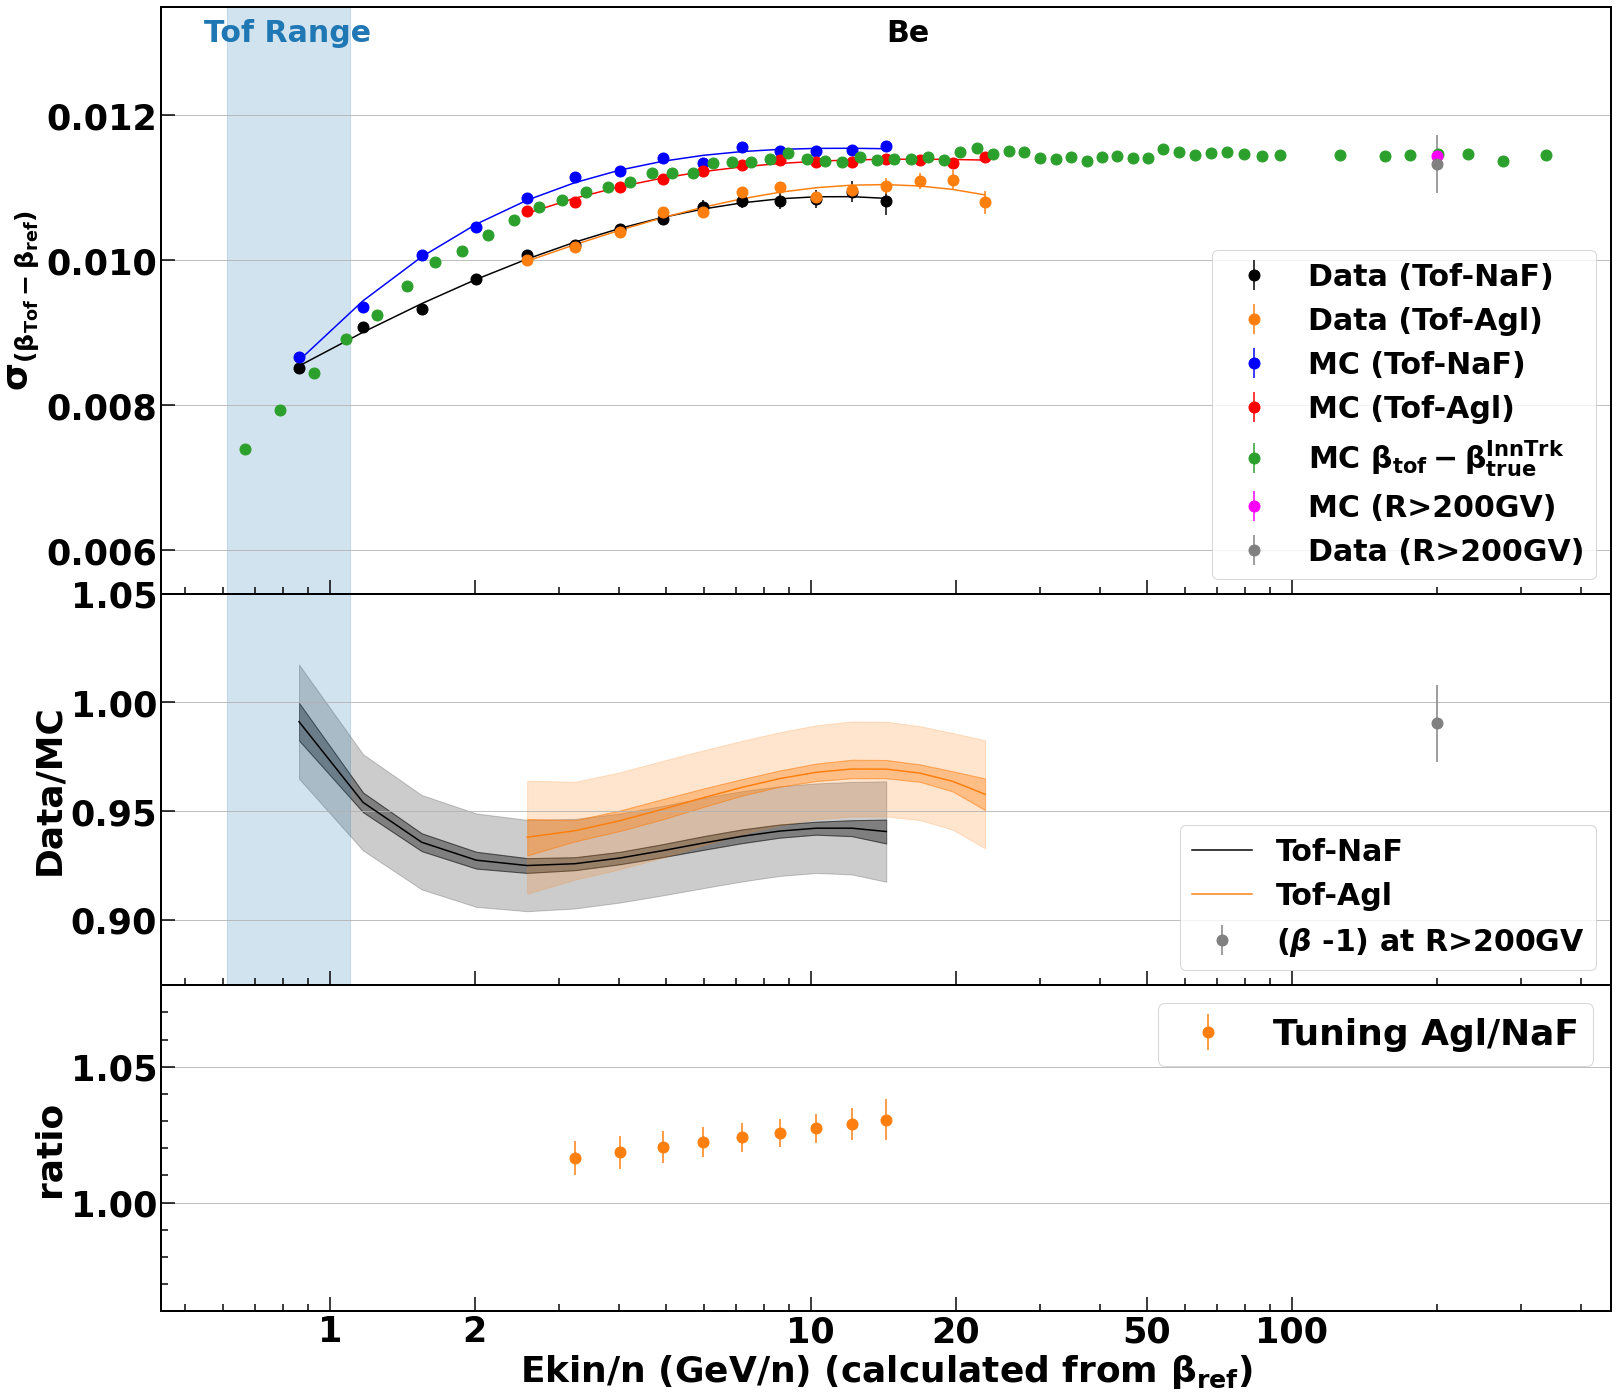

In [14]:
from tools.utilities import save_spline_to_file
from scipy.interpolate import interp1d, UnivariateSpline

def set_plotstyle(ax1, ax2):
    plt.subplots_adjust(hspace=.0)   
    set_plot_defaultstyle(ax1)
    set_plot_defaultstyle(ax2)
    ax1.set_xticklabels([])
    
def getpolyfit(agraph, p0):
    popt, pcov = curve_fit(poly, np.log(agraph.xvalues), agraph.yvalues, p0 = p0)
    polypars = uncertainties.correlated_values(popt, np.array(pcov)) 
    yfit, yfiterr = get_fitpdf_witherr(np.log(agraph.xvalues), polypars, upoly)
    graph_fit = MGraph(agraph.xvalues, yfit, yfiterr)
    return graph_fit, polypars
       
graphfit_sigma_iss = {}
polypars_iss = {}

graphfit_sigma_mc = {}
polypars_mc = {}

polyfitrange = {'NaF': [0.6, 30], 'Agl':[2, 100]}
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[0.45, 0.3, 0.25]}, figsize=(26, 24)) 
set_plotstyle(ax1, ax2)
set_plotstyle(ax2, ax3)
for dec in decs:
    slicegraph_iss = slice_graph_by_value(graph_sigma_iss[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_iss, color=isscol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (Tof-{dec})')
    graphfit_sigma_iss[dec], polypars_iss[dec] = getpolyfit(slicegraph_iss, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_iss[dec], color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
for dec in decs:
    slicegraph_mc = slice_graph_by_value(graph_sigma_mc[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_mc, color=mccol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Tof-{dec})')  
    graphfit_sigma_mc[dec], polypars_mc[dec] = getpolyfit(slicegraph_mc, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_mc[dec], color=mccol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
    
plot_graph(fig, ax1, graph_sigma_mcTofTrueReso, color='tab:green',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{MC  \ \beta_{{tof}}-\beta^{{InnTrk}}_{{true}} }}$') 
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)') 

ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$')

graphfit_sigma_datamcratio = {}
graphfit_sigma_datamcratio_lowlimit = {}
graphfit_sigma_datamcratio_uplimit = {}
spline_tofbeta_sigmacorrecton = {} 
subgraphfit_sigma_datamcratio = {}

for dec in decs:
    graphfit_sigma_datamcratio = graphfit_sigma_iss[dec]/graphfit_sigma_mc[dec]
    subgraphfit_sigma_datamcratio[dec] = slice_graph_by_value(graphfit_sigma_datamcratio, [3.0, 15.0])
    
    #slicegraph_ratio = slice_graph_by_value(graph_sigma_datamcratio[dec], [0.83, 500])
    #if dec == 'NaF':
    #graphfit_sigma_datamcratio.yvalues[0] = 1.0
    plot_graph(fig, ax2, graphfit_sigma_datamcratio, color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22, label=f'Tof-{dec}') 
    spline_tofbeta_sigmacorrecton[dec] = UnivariateSpline(np.log(graphfit_sigma_datamcratio.xvalues), graphfit_sigma_datamcratio.yvalues, k=3, s=5) 
    save_spline_to_file(spline_tofbeta_sigmacorrecton[dec], datadir, f"{nuclei}_spline_tofbeta_sigmakorr_{dec}.pickle")
    
    print(spline_tofbeta_sigmacorrecton[dec](np.log(graphfit_sigma_datamcratio.xvalues)))
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs , graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs, color=isscol[dec], alpha=0.5) 
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs, graphfit_sigma_datamcratio.yvalues+graphfit_sigma_datamcratio.yerrs + graph_sigma_highR_ratio.yerrs , color=isscol[dec], alpha=0.2) 
    ax2.fill_between(graphfit_sigma_datamcratio.xvalues, graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs-graph_sigma_highR_ratio.yerrs , graphfit_sigma_datamcratio.yvalues-graphfit_sigma_datamcratio.yerrs, color=isscol[dec], alpha=0.2) 
    
graphratio_subgraphfit_sigma_datamcratio = subgraphfit_sigma_datamcratio['Agl']/subgraphfit_sigma_datamcratio['NaF']
plot_graph(fig, ax3, graphratio_subgraphfit_sigma_datamcratio, color='tab:orange',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label='Tuning Agl/NaF') 


plot_graph(fig, ax2, graph_sigma_highR_ratio, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=rf'($\beta$ -1) at R>200GV') 
#ax2.plot(graphfit_sigma_iss['NaF'].xvalues,spline_tofbeta_sigmacorrecton['Agl'](np.log(graphfit_sigma_iss['NaF'].xvalues)), '--', color='tab:orange')
    
    
np.savez(os.path.join(datadir,'Be_spline_tofbeta_sigmakorr.npz'), sigmakorr_NaF=spline_tofbeta_sigmacorrecton['NaF'], sigmakorr_Agl=spline_tofbeta_sigmacorrecton['Agl'])

#plot_graph(fig, ax2, graph_sigma_datamcratio_highR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data/MC (R>200GV)')
#ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
#ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
ax1.set_ylim([0.0054, 0.0135])
ax1.set_xscale('log')
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)

ax2.set_ylim([0.87, 1.05])
ax2.set_xscale('log')

ax2.legend(loc='lower right', fontsize=30)
#ax1.axvline(x=0.81, color='black', linestyle='--')
#ax2.axvline(x=0.8, color='black', linestyle='--')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax2.fill_betweenx(np.linspace(0.4, 1.22, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax1.legend(loc='lower right', fontsize=30)
#ax2.set_xlabel('Ekin/n (GeV/n)')
ax2.set_ylabel('Data/MC')
ax1.sharex(ax3)
ax2.sharex(ax3)
ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")   
ax1.text(0.5, 0.98, f"Be", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.03, 0.98, f"Tof Range", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="tab:blue", fontweight="bold")          
ax3.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{ref}}$)')
ax3.set_xscale('log')
ax3.set_ylim([0.96, 1.08])
ax3.set_xticks(custom_ticks)
ax3.set_ylabel('ratio')
ax3.set_xticklabels(custom_labels)
ax3.legend()
savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}all_TrueAtRICH_{refGeo}Geo_finebin_ax3", show=True) 


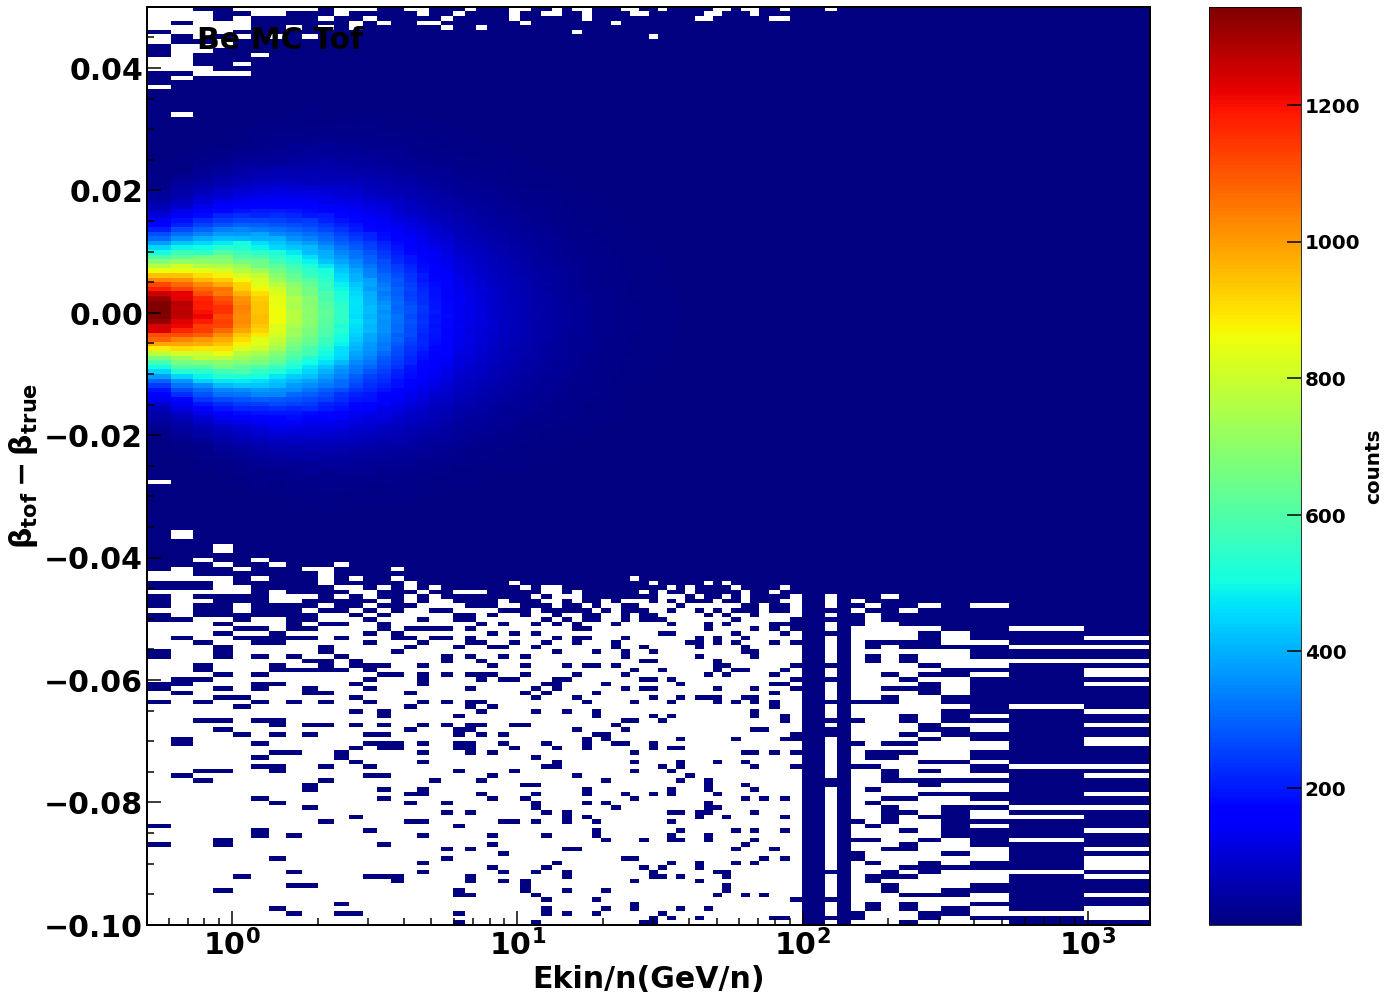

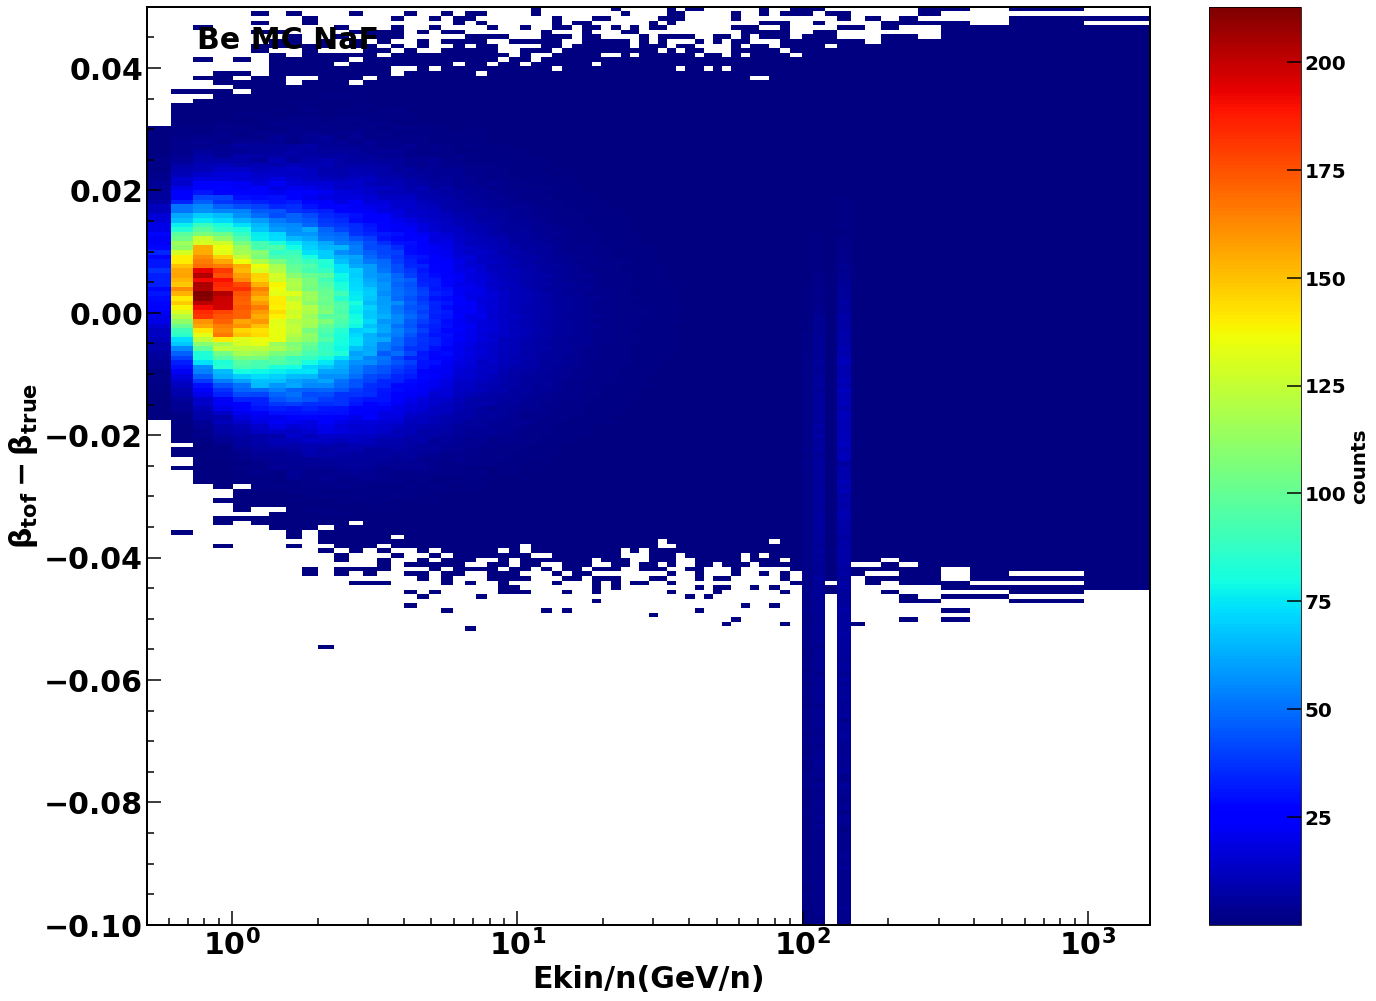

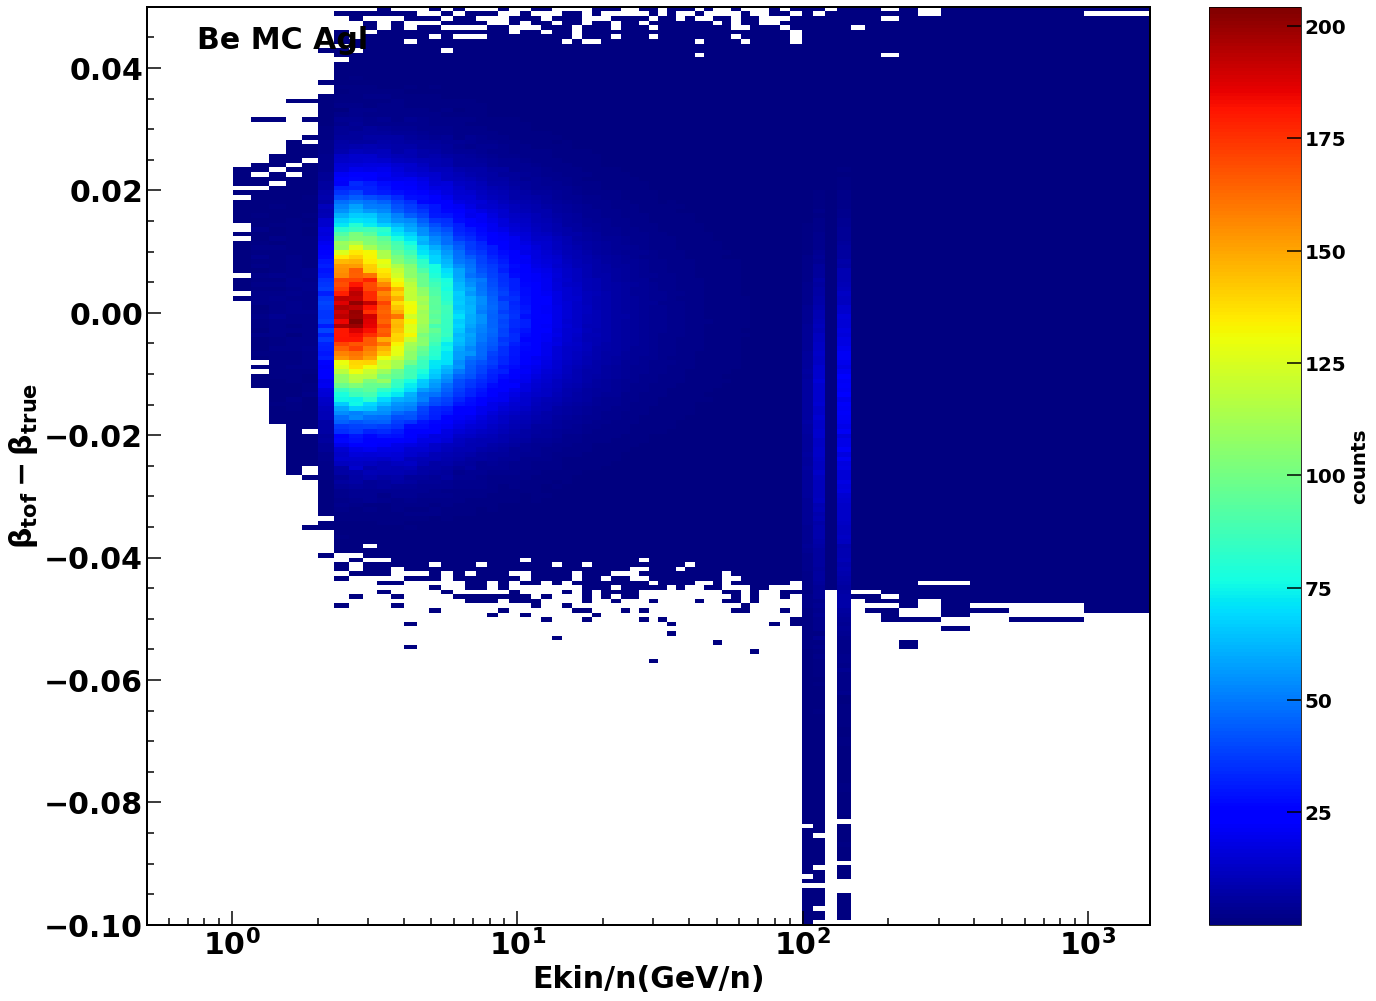

In [15]:
#file_tofbeta1 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_NaF_finebin.npz'
#file_tofbeta2 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_Agl_finebin.npz'
file_tofbeta_tof = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtInnTrk_B1236P8_mcweight_Tof_finebin.npz'
                                                                
file_tofbeta_agl = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtRICH_B1236P8_mcweight_Agl_finebin.npz'
file_tofbeta_naf = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtRICH_B1236P8_mcweight_NaF_finebin.npz'

datatype = {'iss', 'mc'}
refGeos = {'Tof', 'NaF', 'Agl'}
#refGeos = {'Tof', 'Agl'}
file_tofbeta = {'Tof': file_tofbeta_tof,
               'NaF': file_tofbeta_naf,
               'Agl':file_tofbeta_agl}

hist2d_mc_tofTrueGeo = {}
for refGeo in refGeos:
    with np.load(f'{file_tofbeta[refGeo]}') as npzfile:
        if refGeo == 'NaF':
            hist2d_mc_tofTrueGeo[refGeo] = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_{refGeo}") 
        else:
            hist2d_mc_tofTrueGeo[refGeo] = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_Tof")  
    
        fig = plt.figure(figsize=(20, 15))
        plot = fig.subplots(1, 1) 
        plot2dhist(fig, plot, xbinning=hist2d_mc_tofTrueGeo[refGeo].binnings[0].edges[1:-1], 
                   ybinning=hist2d_mc_tofTrueGeo[refGeo].binnings[1].edges[1:-1], 
                   counts=hist2d_mc_tofTrueGeo[refGeo].values[1:-1, 1:-1], 
                   xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
                   setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
        plot.text(0.05, 0.98, f"{nucleiname[nuclei]} MC {refGeo}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
        plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
        plot.set_ylabel(r'$\mathrm{\beta_{tof} - \beta_{true}}$', fontsize=30)
        plot.set_xscale('log')
        #plot.set_xlim(gammalim[dec])
        savefig_tofile(fig, plotfile, f"hist2d_{nuclei}MC_betaResidual_{refGeo}Geo", show=True) 
 
  
                   

In [16]:
def get_musigma_gausfit(hist2d_mc_tofTrue, minbin, maxbin):
    energy_binvalues = hist2d_mc_tofTrue.binnings[0].bin_centers[minbin:maxbin]
    graph_mean_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_sigma_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))

    for ip, ibin in enumerate(range(minbin, maxbin)):
   
        lowbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin]
        upbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin + 1]
        hist1d_mc = hist2d_mc_tofTrue.project(ibin) 
        hist1d_mc = hist1d_mc * (1/np.sum(hist1d_mc.values))
    
        xrange = [-0.03, 0.03]
        xbinrange = hist1d_mc.binnings[0].get_indices(xrange)
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
        yvalue_mc = hist1d_mc.values[xbinrange[0]:xbinrange[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange[0]:xbinrange[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
   
        guess_gaus_mc = dict(norm=0.0005, mu=0.0005, sigma=0.007)

        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
        for key in guess_gaus_mc.keys():
            guess_gaus_mc[key] = par_mc[key]
    
        xrange_iter2mc = [guess_gaus_mc['mu'] - 2.0 * guess_gaus_mc['sigma'], guess_gaus_mc['mu'] + 2.0 * guess_gaus_mc['sigma']]
        xbinrange2mc = hist1d_mc.binnings[0].get_indices(xrange_iter2mc)
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange2mc[0]:xbinrange2mc[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalue_mc = hist1d_mc.values[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange2mc[0]:xbinrange2mc[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
    
        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)

        graph_mean_mcTofTrueReso.yvalues[ip] = par_mc['mu']
        graph_mean_mcTofTrueReso.yerrs[ip] = parerr_mc['mu']
        graph_sigma_mcTofTrueReso.yvalues[ip] = par_mc['sigma']
        graph_sigma_mcTofTrueReso.yerrs[ip] = parerr_mc['sigma']
                                                                                                                                                            
        fit_y_mc = normalized_gaussian(xvalue_mc, *par_mc) 
        draw = False
        plotp = [0, 1, 2, 3, 60, 61]
        if draw:
            figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
            plot_histogram_1d(ax1, hist1d_mc, style="mc", color=mccolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
            #ax1.legend()
            ax1.plot(xvalue_mc, fit_y_mc, '-', linewidth=3, color='blue')
            ax1.text(0.6, 0.98, f"[{lowbinedge:.2f}, {upbinedge:.2f}] GeV/n", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold") 
       
            ax1.set_ylim([0.0001, 0.1])
        
            ax1.text(0.03, 0.8, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.75, f"$\\mu:$ {par_mc['mu']:.4f}$\\pm$ {parerr_mc['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.7, f"$\\sigma:$ {par_mc['sigma']:.4f}$\\pm$ {parerr_mc['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.set_ylabel('Normalized events')
            ax1.set_xlabel(r'$\mathrm{\beta_{tof}-\beta_{naf}}$')
            ax1.set_xlim([-0.07, 0.06])
            ax1.set_yscale('log')
            #savefig_tofile(figure, plotfile, f"hist1d_{figsuffix}_Compare_{ibin}_{nuclei}", show=True) 
    return graph_mean_mcTofTrueReso, graph_sigma_mcTofTrueReso 


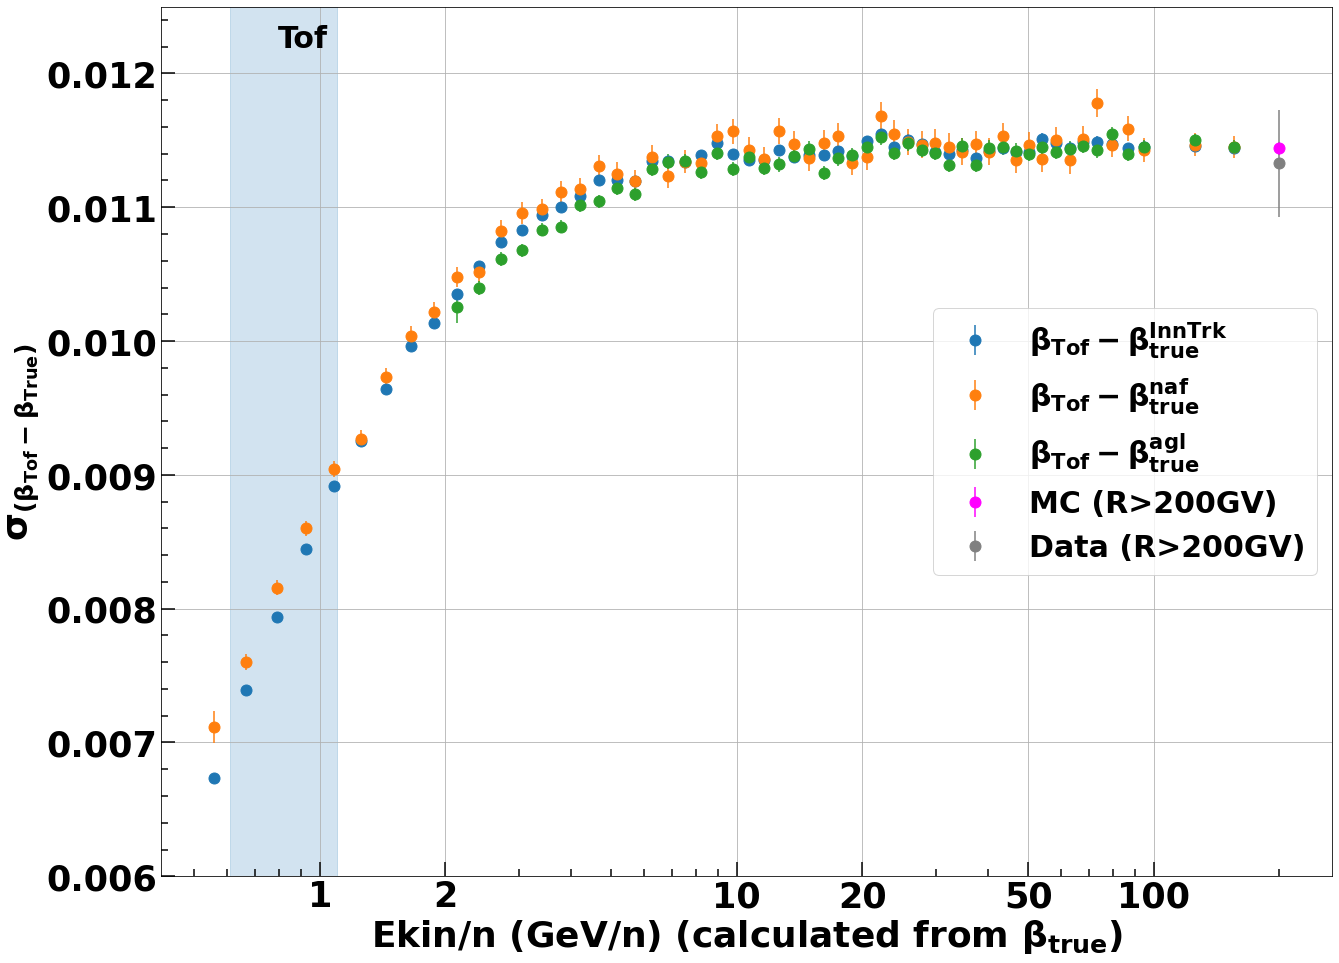

In [17]:

graph_mean_mcTofTrueResidual = {}
graph_sigma_mcTofTrueResidual = {}
minbin = {'Tof': 1, 'NaF': 1, 'Agl': 10}
maxbin = {'Tof': 60, 'NaF': 60, 'Agl': 60}
refGeos = {'Tof', 'NaF', 'Agl'}
#refGeos = {'Tof', 'Agl'}

for refGeo in refGeos:
    graph_mean_mcTofTrueResidual[refGeo], graph_sigma_mcTofTrueResidual[refGeo] = get_musigma_gausfit(hist2d_mc_tofTrueGeo[refGeo], minbin[refGeo], maxbin[refGeo])
    
tba = {'Tof': 'InnTrk', 'NaF': 'naf', 'Agl':'agl'}
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
for refGeo in refGeos:
    plot_graph(fig, ax1, graph_sigma_mcTofTrueResidual[refGeo], color=DETECTOR_COLOR[refGeo],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{\beta_{{Tof}}-\beta_{{true}}^{{ {tba[refGeo]} }}}}$')
    
    
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Ekn>98GeV/n)')
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)')
ax1.set_ylim([0.006, 0.0125])
    
    
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)
ax1.set_xscale('log')
ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels)
#ax1.legend()

#ax1.axvline(x=0.81, color='black', linestyle='--')
#ax1.axvline(x=0.8, color='black', linestyle='--')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax1.legend(loc='center right', fontsize=30)
#ax2.set_xlabel('Ekin/n (GeV/n)')
ax1.set_ylabel('')
#ax1.sharex(ax2)
ax1.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{true}}$)')
ax1.grid()
ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{True})}}$')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ RICH/InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.1, 0.98, f"Tof", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}_compareTofResoTrue_Geo", show=True) 

    

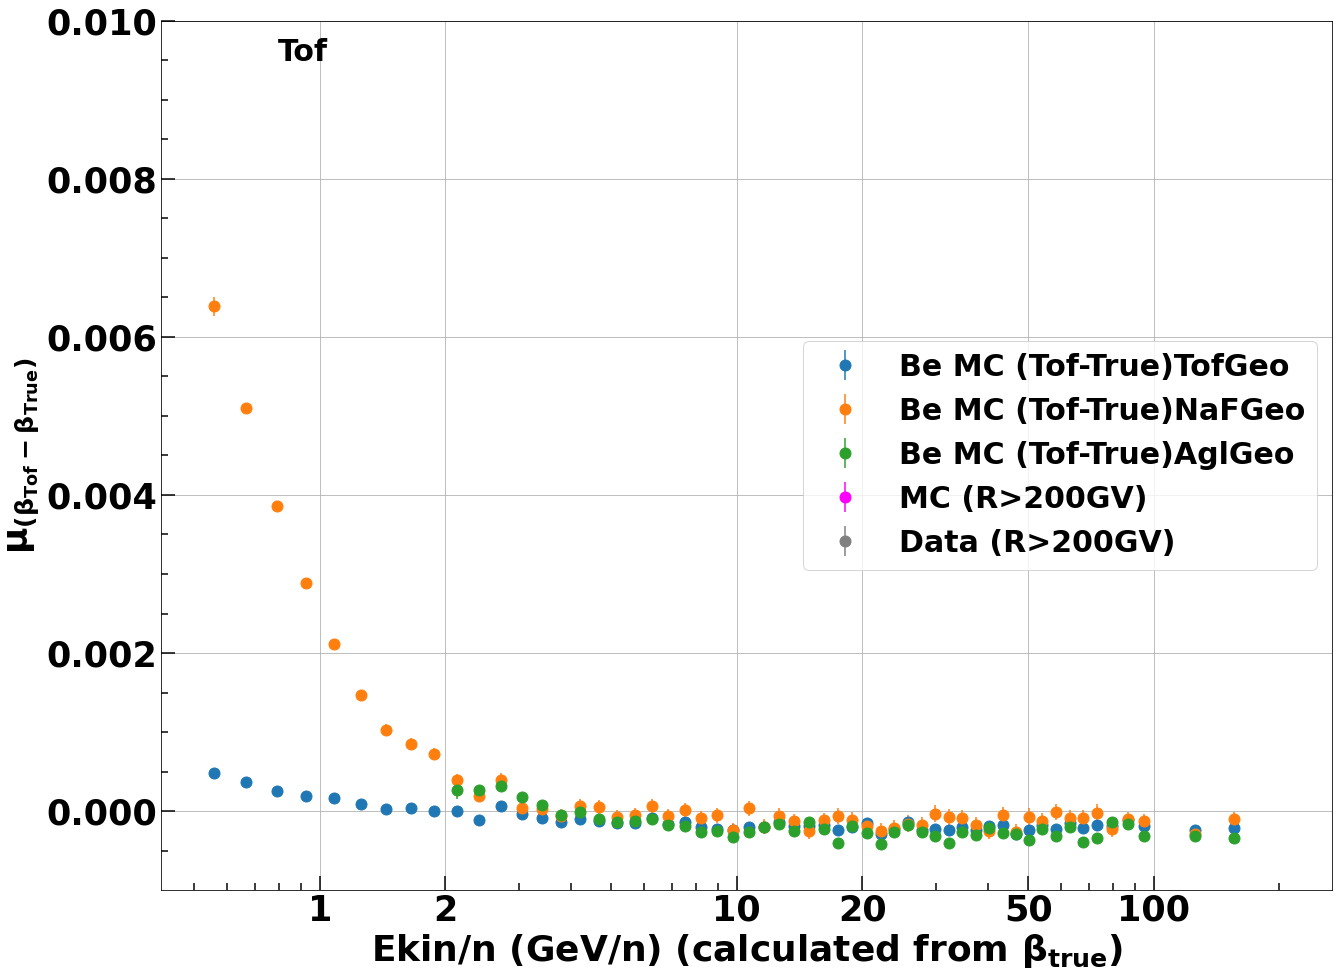

In [18]:

graph_mean_mcTofTrueResidual = {}
graph_sigma_mcTofTrueResidual = {}
minbin = {'Tof': 1, 'NaF': 1, 'Agl': 10}
maxbin = {'Tof': 60, 'NaF': 60, 'Agl': 60}
refGeos = {'Tof', 'NaF', 'Agl'}
#refGeos = {'Tof', 'Agl'}

for refGeo in refGeos:
    graph_mean_mcTofTrueResidual[refGeo], graph_sigma_mcTofTrueResidual[refGeo] = get_musigma_gausfit(hist2d_mc_tofTrueGeo[refGeo], minbin[refGeo], maxbin[refGeo])
    

fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
for refGeo in refGeos:
    plot_graph(fig, ax1, graph_mean_mcTofTrueResidual[refGeo], color=DETECTOR_COLOR[refGeo],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} (Tof-True){refGeo}Geo')
    
    
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Ekn>98GeV/n)')
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)')
ax1.set_ylim([-0.001, 0.01])
    
    
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)
ax1.set_xscale('log')
ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels)
#ax1.legend()

#ax1.axvline(x=0.81, color='black', linestyle='--')
#ax1.axvline(x=0.8, color='black', linestyle='--')
#ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax1.legend(loc='center right', fontsize=30)
#ax2.set_xlabel('Ekin/n (GeV/n)')
ax1.set_ylabel('')
#ax1.sharex(ax2)
ax1.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{true}}$)')
ax1.grid()
ax1.set_ylabel(r'$\mathrm{\mu_{(\beta_{Tof} - \beta_{True})}}$')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ RICH/InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.1, 0.98, f"Tof", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
savefig_tofile(fig, plotfile, f"graph_mean_{figsuffix}_{nuclei}_compareTofResoTrue_Geo", show=True) 

    

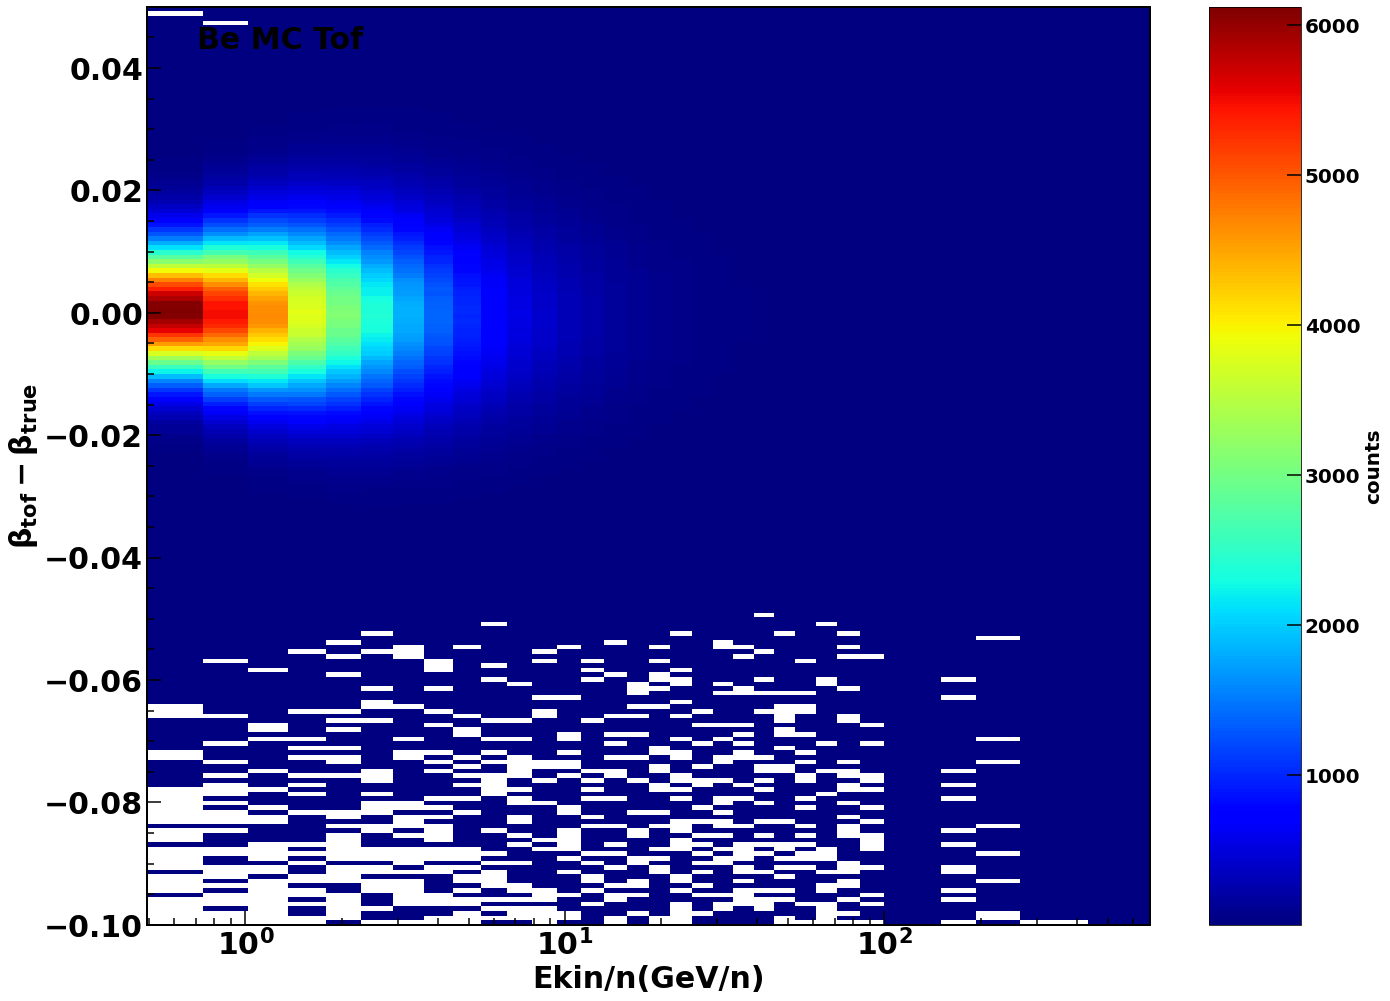

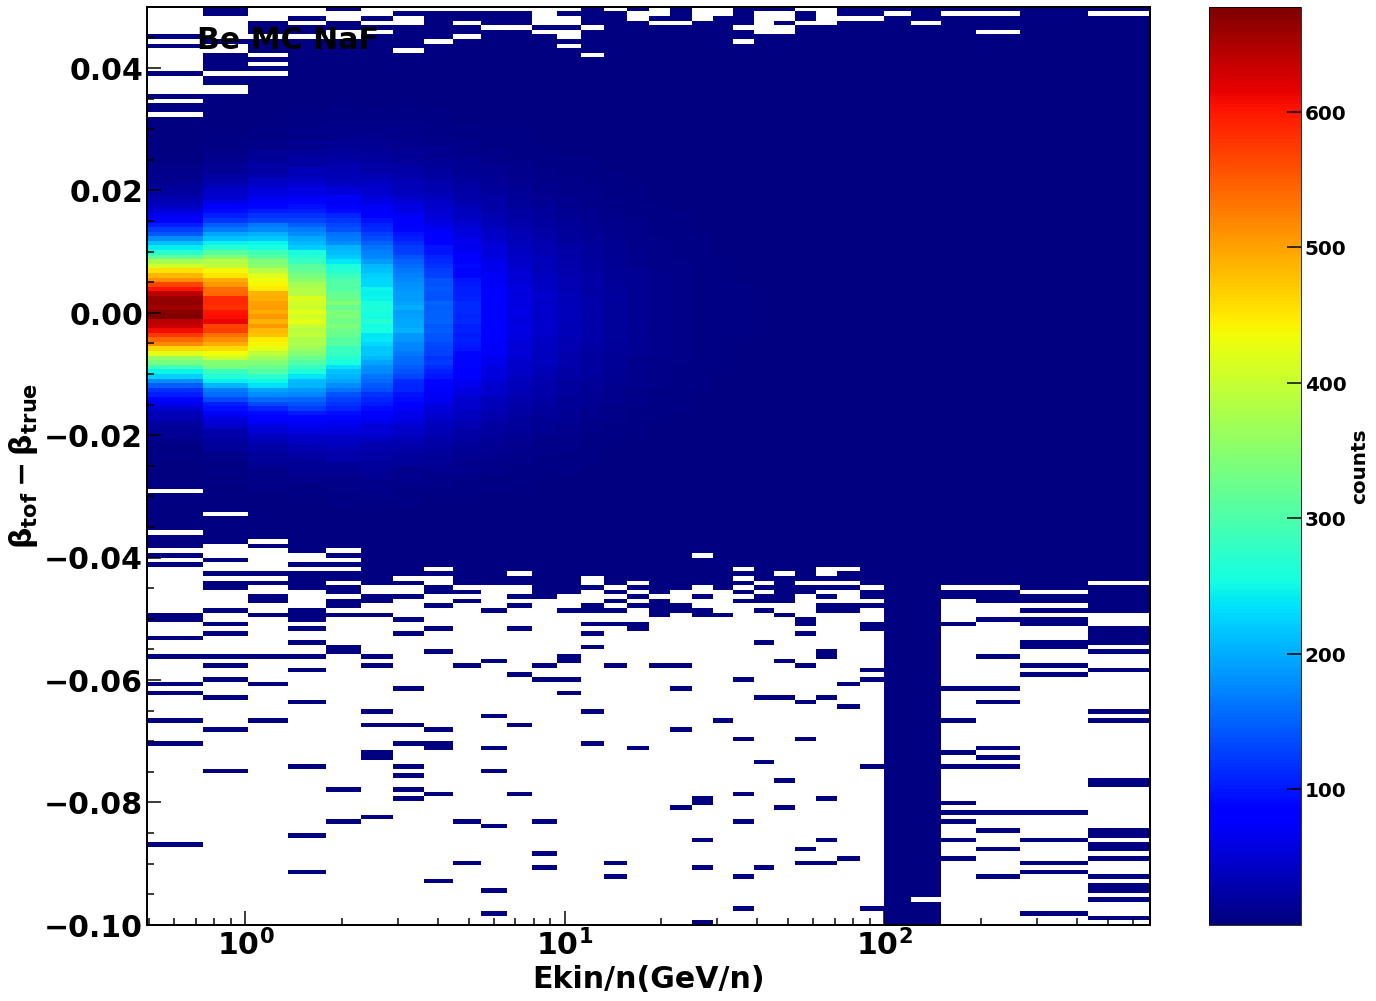

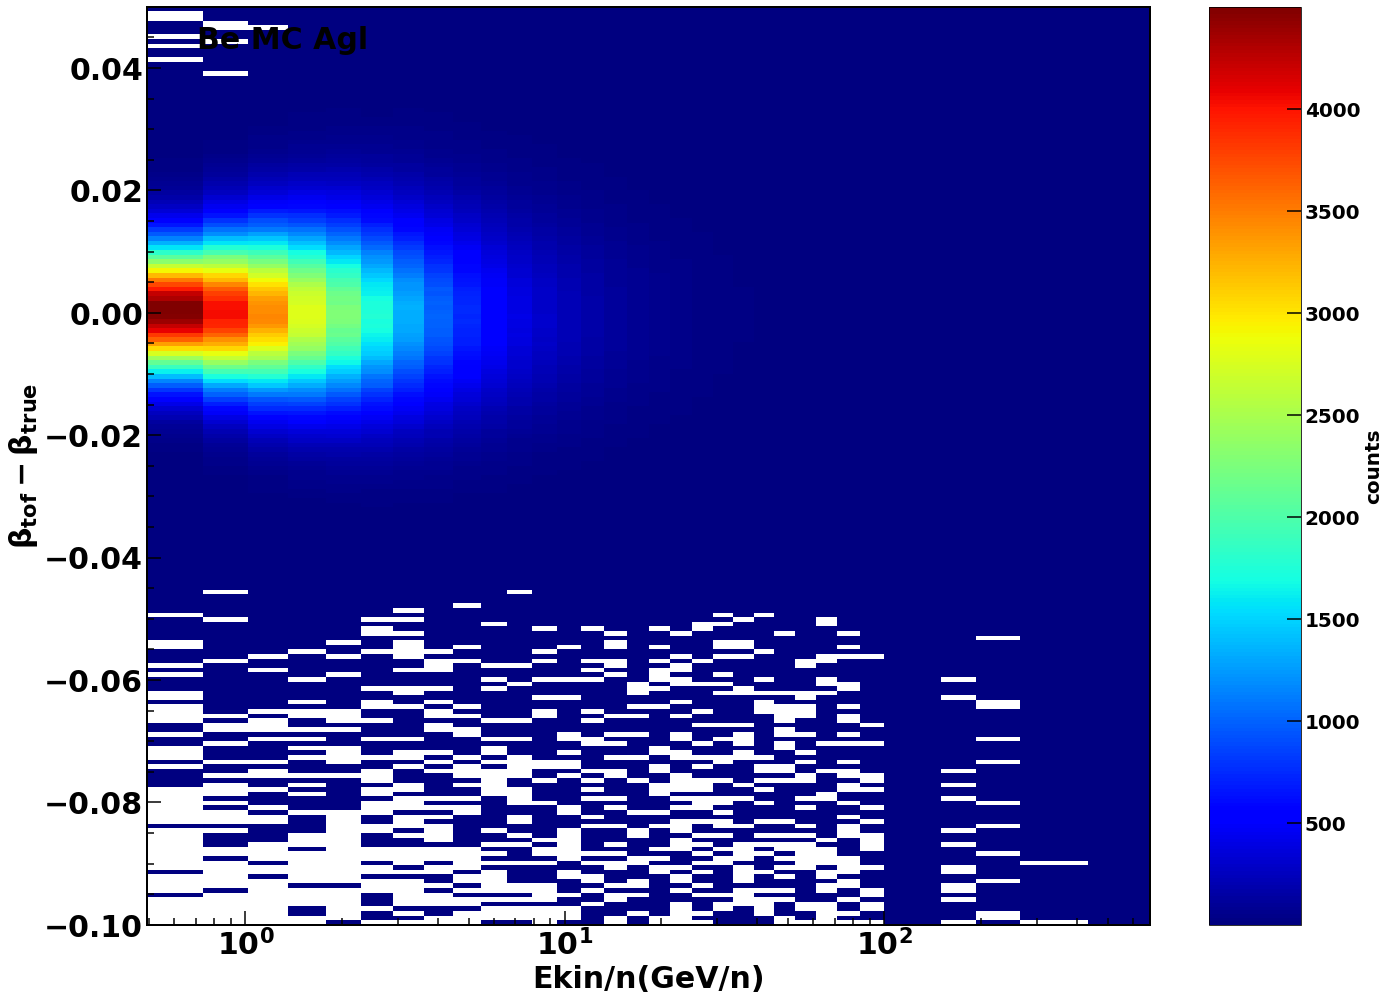

In [19]:
#file_tofbeta1 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_NaF_finebin.npz'
#file_tofbeta2 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_Agl_finebin.npz'
#file_tofbeta_tof = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtInnTrk_B1236P8_mcweight_Tof_finebin.npz'
file_tofbeta_tof = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtInnTrk_B1236P8_mcweight_TofGeo.npz'                                                         
file_tofbeta_agl = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtInnTrk_B1236P8_mcweight_AglGeo.npz'
file_tofbeta_naf = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtInnTrk_B1236P8_mcweight_NaFGeo.npz'

datatype = {'iss', 'mc'}
refGeos = {'Tof', 'NaF', 'Agl'}
#refGeos = {'Tof', 'Agl'}
file_tofbeta = {'Tof': file_tofbeta_tof,
               'NaF': file_tofbeta_naf,
               'Agl':file_tofbeta_agl}

hist2d_mc_tofTrueGeo = {}
for refGeo in refGeos:
    with np.load(f'{file_tofbeta[refGeo]}') as npzfile:
        if refGeo == 'NaF':
            hist2d_mc_tofTrueGeo[refGeo] = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_Tof") 
        else:
            hist2d_mc_tofTrueGeo[refGeo] = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_Tof")  
    
        fig = plt.figure(figsize=(20, 15))
        plot = fig.subplots(1, 1) 
        plot2dhist(fig, plot, xbinning=hist2d_mc_tofTrueGeo[refGeo].binnings[0].edges[1:-1], 
                   ybinning=hist2d_mc_tofTrueGeo[refGeo].binnings[1].edges[1:-1], 
                   counts=hist2d_mc_tofTrueGeo[refGeo].values[1:-1, 1:-1], 
                   xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
                   setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
        plot.text(0.05, 0.98, f"{nucleiname[nuclei]} MC {refGeo}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
        plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
        plot.set_ylabel(r'$\mathrm{\beta_{tof} - \beta_{true}}$', fontsize=30)
        plot.set_xscale('log')
        #plot.set_xlim(gammalim[dec])
        savefig_tofile(fig, plotfile, f"hist2d_{nuclei}MC_betaResidual_{refGeo}Geo", show=True) 
 
  
                   

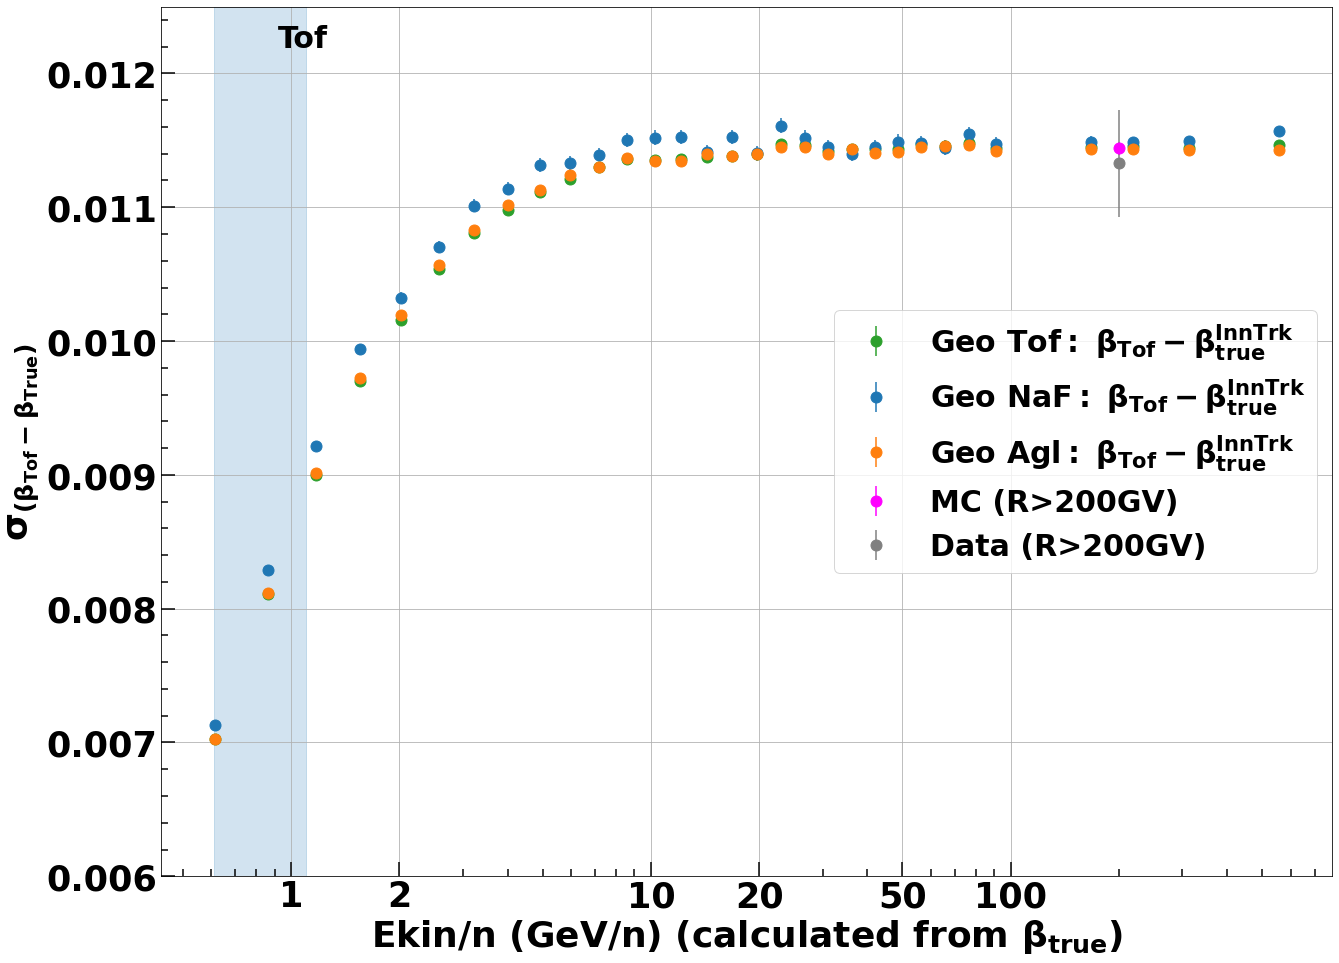

In [20]:
graph_mean_mcTofTrueResidual = {}
graph_sigma_mcTofTrueResidual = {}
minbin = {'Tof': 1, 'NaF': 1, 'Agl': 1}
maxbin = {'Tof': 34, 'NaF': 34, 'Agl': 34}
refGeos = {'Tof', 'NaF', 'Agl'}
#refGeos = {'Tof', 'Agl'}
Ref_COLOR = {'Tof': 'tab:green', 'NaF': 'tab:blue', 'Agl':'tab:orange'}
for refGeo in refGeos:
    graph_mean_mcTofTrueResidual[refGeo], graph_sigma_mcTofTrueResidual[refGeo] = get_musigma_gausfit(hist2d_mc_tofTrueGeo[refGeo], minbin[refGeo], maxbin[refGeo])
    
tba = {'Tof': 'InnTrk', 'NaF': 'naf', 'Agl':'agl'}
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
for refGeo in refGeos:
    plot_graph(fig, ax1, graph_sigma_mcTofTrueResidual[refGeo], color=Ref_COLOR[refGeo],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{Geo \ {refGeo}: \ \beta_{{Tof}}-\beta_{{true}}^{{InnTrk}} }}$')
    
    
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Ekn>98GeV/n)')
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)')
ax1.set_ylim([0.006, 0.0125])
    
    
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)
ax1.set_xscale('log')
ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels)
#ax1.legend()

#ax1.axvline(x=0.81, color='black', linestyle='--')
#ax1.axvline(x=0.8, color='black', linestyle='--')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax1.legend(loc='center right', fontsize=30)
#ax2.set_xlabel('Ekin/n (GeV/n)')
ax1.set_ylabel('')
#ax1.sharex(ax2)
ax1.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{true}}$)')
ax1.grid()
ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{True})}}$')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ RICH/InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.1, 0.98, f"Tof", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
savefig_tofile(fig, plotfile, f"graph_sigma_{nuclei}_compareTofResoTrueInnTrk_CompareGeo", show=True) 

    

10
10


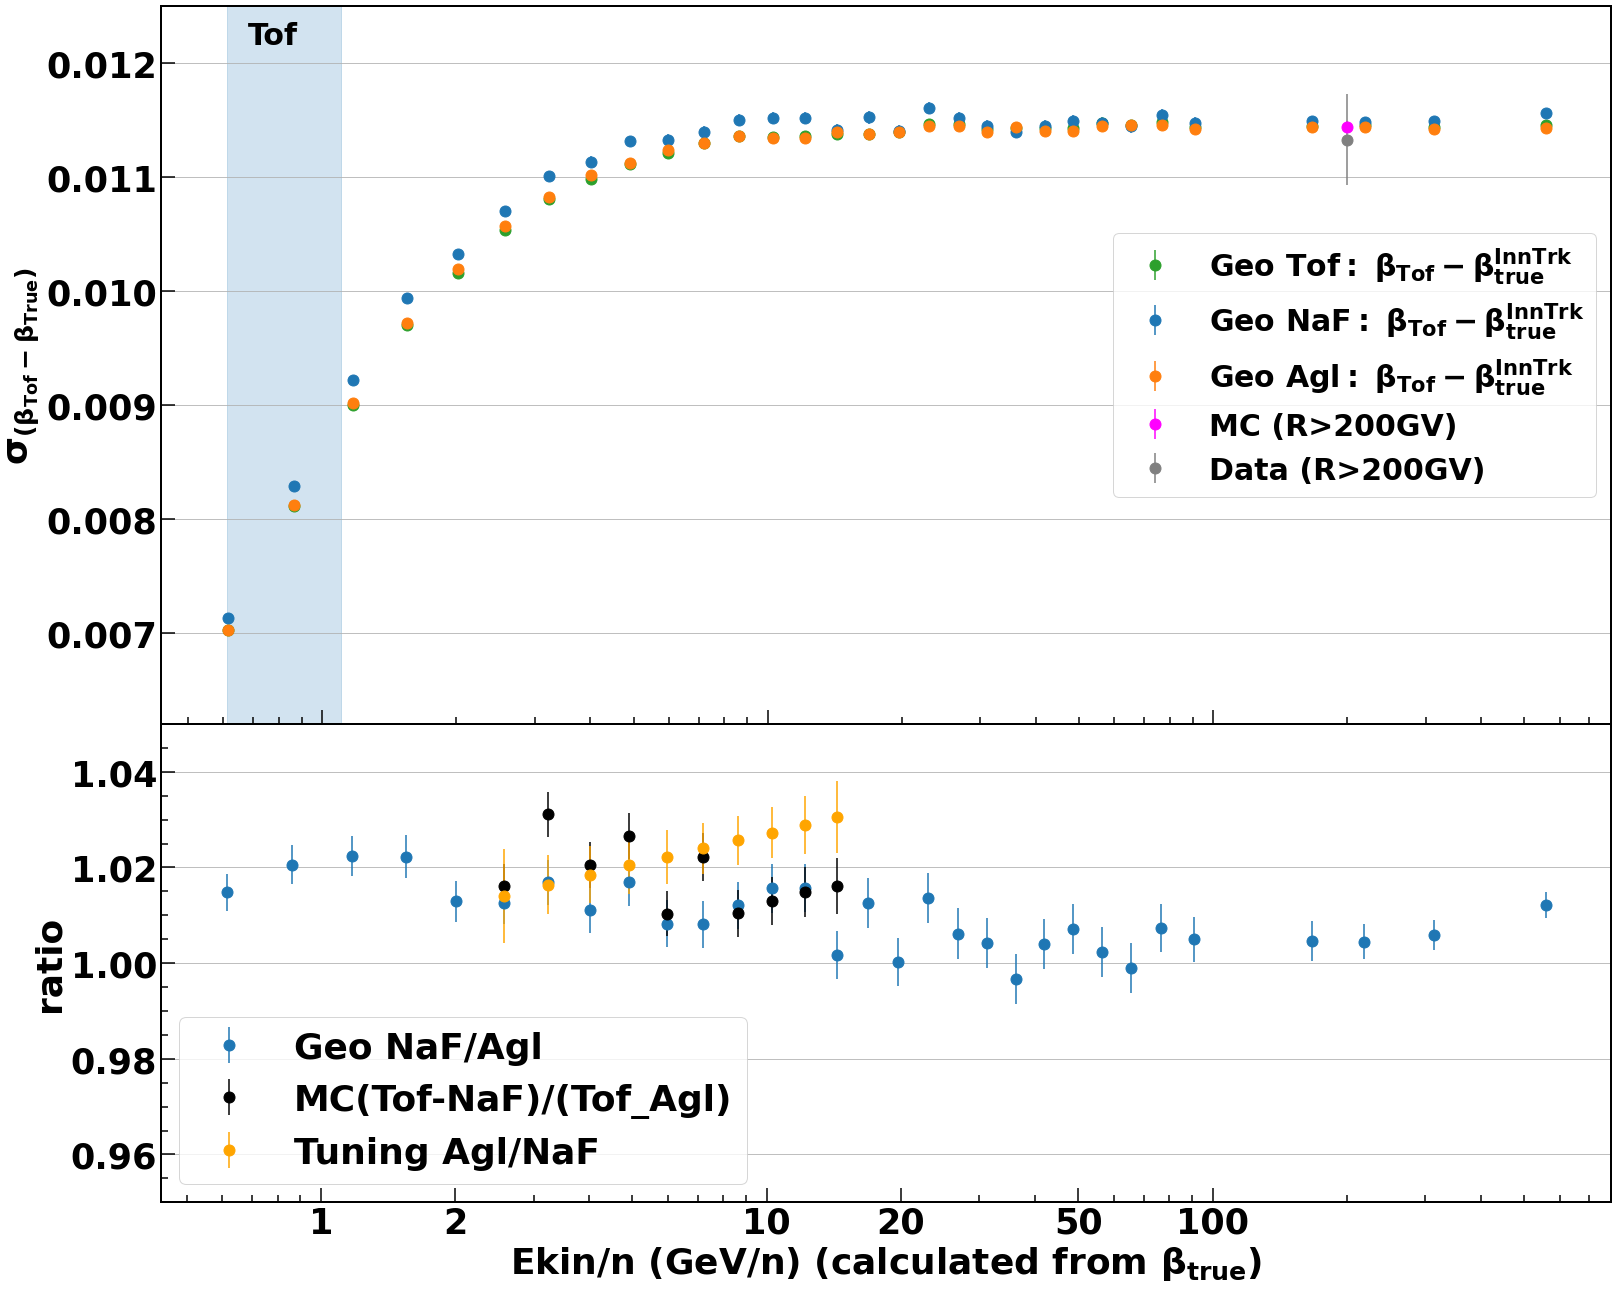

In [21]:
graph_mean_mcTofTrueResidual = {}
graph_sigma_mcTofTrueResidual = {}
minbin = {'Tof': 1, 'NaF': 1, 'Agl': 1}
maxbin = {'Tof': 34, 'NaF': 34, 'Agl': 34}
refGeos = {'Tof', 'NaF', 'Agl'}
#refGeos = {'Tof', 'Agl'}
Ref_COLOR = {'Tof': 'tab:green', 'NaF': 'tab:blue', 'Agl':'tab:orange'}
for refGeo in refGeos:
    graph_mean_mcTofTrueResidual[refGeo], graph_sigma_mcTofTrueResidual[refGeo] = get_musigma_gausfit(hist2d_mc_tofTrueGeo[refGeo], minbin[refGeo], maxbin[refGeo])
    
tba = {'Tof': 'InnTrk', 'NaF': 'naf', 'Agl':'agl'}

graph_ratio_tofnaf = graph_sigma_mcTofTrueResidual['NaF']/graph_sigma_mcTofTrueResidual['Tof']
graph_ratio_tofagl = graph_sigma_mcTofTrueResidual['Agl']/graph_sigma_mcTofTrueResidual['Tof']
graph_ratio_nafagl = graph_sigma_mcTofTrueResidual['NaF']/graph_sigma_mcTofTrueResidual['Agl']

graphfit_sigma_datamcratio = {}
subgraphfit_sigma_datamcratio = {}
for dec in ['NaF', 'Agl']:
    graphfit_sigma_datamcratio['dec'] = graphfit_sigma_iss[dec]/graphfit_sigma_mc[dec]
    subgraphfit_sigma_datamcratio[dec] = slice_graph_by_value(graphfit_sigma_datamcratio['dec'], [2.5, 15.0])
    print(len(subgraphfit_sigma_datamcratio[dec].xvalues))
    
graph_sigma_nafagl_mcreconstructed = slice_graph_by_value(graph_sigma_mc['NaF'], [2.5, 15])/slice_graph_by_value(graph_sigma_mc['Agl'], [2.5, 15])
graphratio_aglnaf_tuning = subgraphfit_sigma_datamcratio['Agl']/subgraphfit_sigma_datamcratio['NaF']
spline_fit = UnivariateSpline(np.log(graph_sigma_nafagl_mcreconstructed.xvalues), graph_sigma_nafagl_mcreconstructed.yvalues, k=3, s=5)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(26, 22)) 
set_plotstyle(ax1, ax2)
for refGeo in refGeos:
    plot_graph(fig, ax1, graph_sigma_mcTofTrueResidual[refGeo], color=Ref_COLOR[refGeo],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{Geo \ {refGeo}: \ \beta_{{Tof}}-\beta_{{true}}^{{InnTrk}} }}$')
    #ax2.plot(graphratio_aglnaf_tuning.xvalues, graphratio_aglnaf_tuning.yvalues, '-')
    #ax2.plot(np.linspace(2, 15 ,50), spline_fit(np.log(np.linspace(2, 20 ,50))), '-')
    #plot_graph(fig, ax1, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='MC(Tof-NaF)/(Tof_Agl)')
    #ax2.plot(graph_sigma_nafagl_mcreconstructed.xvalues, graph_sigma_nafagl_mcreconstructed.yvalues, '-')
    
#plot_graph(fig, ax2, graph_ratio_tofnaf, color=Ref_COLOR['NaF'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo NaF/Tof')
#plot_graph(fig, ax2, graph_ratio_tofagl, color=Ref_COLOR['Agl'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo Agl/Tof')
plot_graph(fig, ax2, graph_ratio_nafagl, color=Ref_COLOR['NaF'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo NaF/Agl')
plot_graph(fig, ax2, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='MC(Tof-NaF)/(Tof_Agl)')
plot_graph(fig, ax2, graphratio_aglnaf_tuning, color='orange',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Tuning Agl/NaF')
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Ekn>98GeV/n)')
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)')
ax1.set_ylim([0.0062, 0.0125])
ax1.grid(axis='y')
ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{True})}}$')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ RICH/InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.06, 0.98, f"Tof", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)
ax1.set_xscale('log')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax1.legend(loc='center right', fontsize=30)
ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_labels)
ax2.set_ylim([0.95, 1.05])
ax2.set_ylabel('ratio')
ax2.legend()
ax2.grid(axis='y')
#ax1.sharex(ax2)
ax2.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{true}}$)')

savefig_tofile(fig, plotfile, f"graph_sigma_{nuclei}_compareTofResoTrueInnTrk_CompareGeo", show=True) 

    

10
10


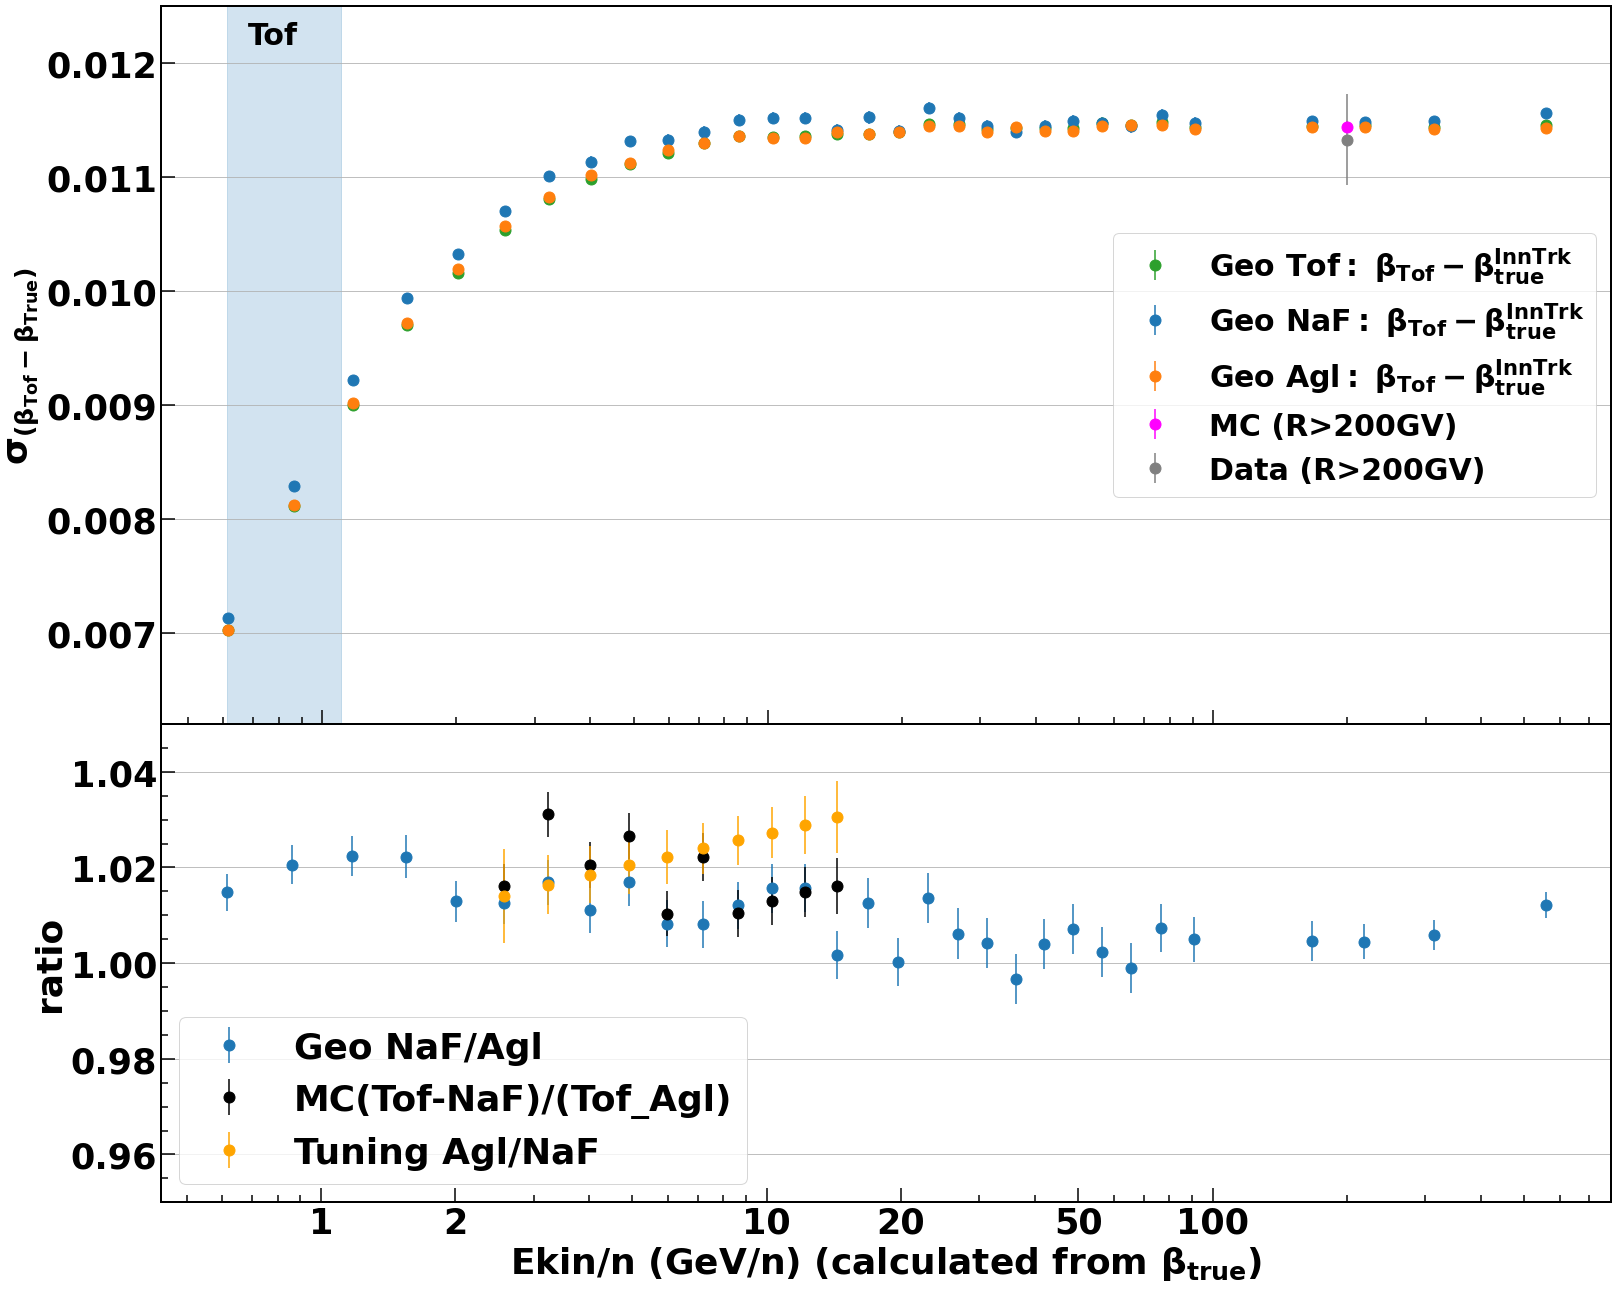

In [22]:
graph_mean_mcTofTrueResidual = {}
graph_sigma_mcTofTrueResidual = {}
minbin = {'Tof': 1, 'NaF': 1, 'Agl': 1}
maxbin = {'Tof': 34, 'NaF': 34, 'Agl': 34}
refGeos = {'Tof', 'NaF', 'Agl'}
#refGeos = {'Tof', 'Agl'}
Ref_COLOR = {'Tof': 'tab:green', 'NaF': 'tab:blue', 'Agl':'tab:orange'}
for refGeo in refGeos:
    graph_mean_mcTofTrueResidual[refGeo], graph_sigma_mcTofTrueResidual[refGeo] = get_musigma_gausfit(hist2d_mc_tofTrueGeo[refGeo], minbin[refGeo], maxbin[refGeo])
    
tba = {'Tof': 'InnTrk', 'NaF': 'naf', 'Agl':'agl'}

graph_ratio_tofnaf = graph_sigma_mcTofTrueResidual['NaF']/graph_sigma_mcTofTrueResidual['Tof']
graph_ratio_tofagl = graph_sigma_mcTofTrueResidual['Agl']/graph_sigma_mcTofTrueResidual['Tof']
graph_ratio_nafagl = graph_sigma_mcTofTrueResidual['NaF']/graph_sigma_mcTofTrueResidual['Agl']

graphfit_sigma_datamcratio = {}
subgraphfit_sigma_datamcratio = {}
for dec in ['NaF', 'Agl']:
    graphfit_sigma_datamcratio['dec'] = graphfit_sigma_iss[dec]/graphfit_sigma_mc[dec]
    subgraphfit_sigma_datamcratio[dec] = slice_graph_by_value(graphfit_sigma_datamcratio['dec'], [2.5, 15.0])
    print(len(subgraphfit_sigma_datamcratio[dec].xvalues))
    
graph_sigma_nafagl_mcreconstructed = slice_graph_by_value(graph_sigma_mc['NaF'], [2.5, 15])/slice_graph_by_value(graph_sigma_mc['Agl'], [2.5, 15])
graphratio_aglnaf_tuning = subgraphfit_sigma_datamcratio['Agl']/subgraphfit_sigma_datamcratio['NaF']
spline_fit = UnivariateSpline(np.log(graph_sigma_nafagl_mcreconstructed.xvalues), graph_sigma_nafagl_mcreconstructed.yvalues, k=3, s=5)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(26, 22)) 
set_plotstyle(ax1, ax2)
for refGeo in refGeos:
    plot_graph(fig, ax1, graph_sigma_mcTofTrueResidual[refGeo], color=Ref_COLOR[refGeo],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{Geo \ {refGeo}: \ \beta_{{Tof}}-\beta_{{true}}^{{InnTrk}} }}$')
    #ax2.plot(graphratio_aglnaf_tuning.xvalues, graphratio_aglnaf_tuning.yvalues, '-')
    #ax2.plot(np.linspace(2, 15 ,50), spline_fit(np.log(np.linspace(2, 20 ,50))), '-')
    #plot_graph(fig, ax1, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='MC(Tof-NaF)/(Tof_Agl)')
    #ax2.plot(graph_sigma_nafagl_mcreconstructed.xvalues, graph_sigma_nafagl_mcreconstructed.yvalues, '-')
    
#plot_graph(fig, ax2, graph_ratio_tofnaf, color=Ref_COLOR['NaF'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo NaF/Tof')
#plot_graph(fig, ax2, graph_ratio_tofagl, color=Ref_COLOR['Agl'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo Agl/Tof')
plot_graph(fig, ax2, graph_ratio_nafagl, color=Ref_COLOR['NaF'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo NaF/Agl')
plot_graph(fig, ax2, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='MC(Tof-NaF)/(Tof_Agl)')
plot_graph(fig, ax2, graphratio_aglnaf_tuning, color='orange',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Tuning Agl/NaF')
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Ekn>98GeV/n)')
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)')
ax1.set_ylim([0.0062, 0.0125])
ax1.grid(axis='y')
ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{True})}}$')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ RICH/InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.06, 0.98, f"Tof", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)
ax1.set_xscale('log')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.2, color="tab:blue")
ax1.legend(loc='center right', fontsize=30)
ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_labels)
ax2.set_ylim([0.95, 1.05])
ax2.set_ylabel('ratio')
ax2.legend()
ax2.grid(axis='y')
#ax1.sharex(ax2)
ax2.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{true}}$)')

savefig_tofile(fig, plotfile, f"graph_sigma_{nuclei}_compareTofResoTrueInnTrk_CompareGeo", show=True) 

    

10
10


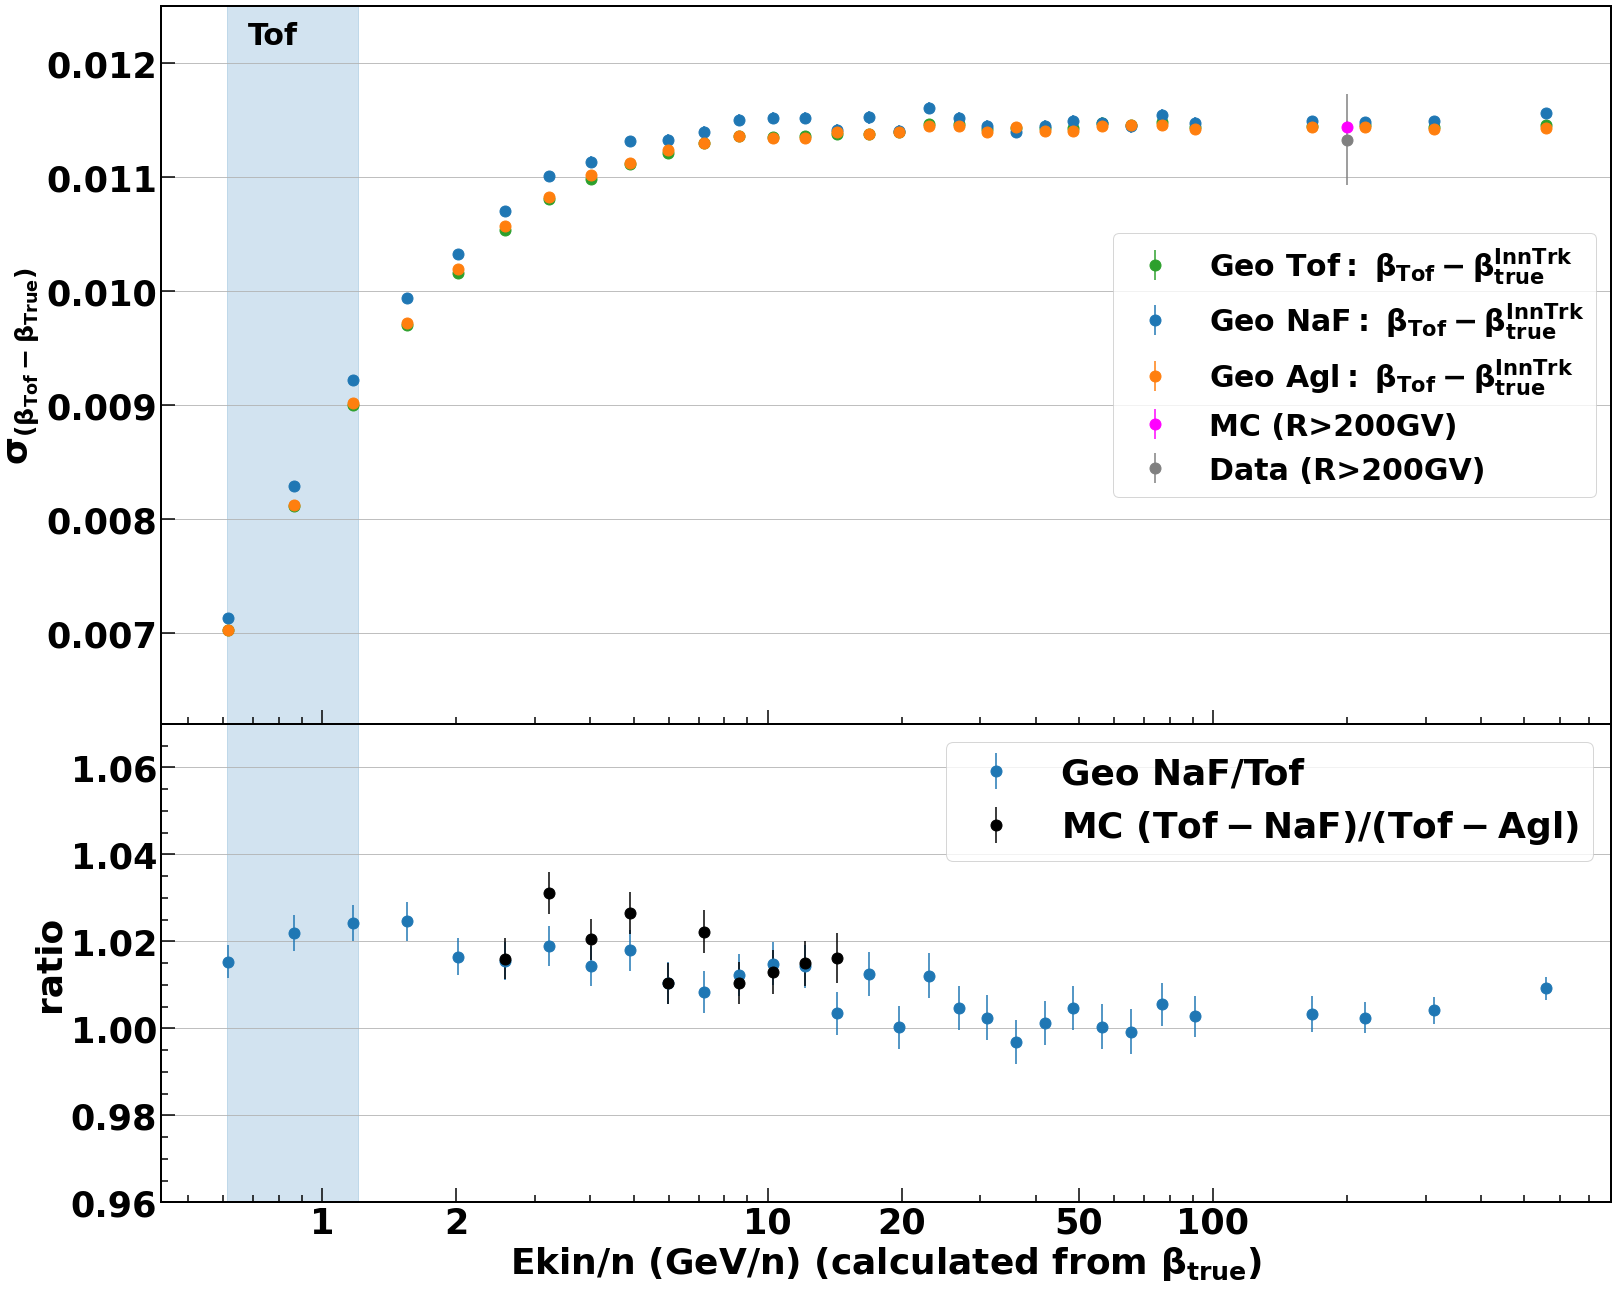

In [23]:
graph_mean_mcTofTrueResidual = {}
graph_sigma_mcTofTrueResidual = {}
minbin = {'Tof': 1, 'NaF': 1, 'Agl': 1}
maxbin = {'Tof': 34, 'NaF': 34, 'Agl': 34}
refGeos = {'NaF', 'Agl', 'Tof'}
#refGeos = {'Tof', 'Agl'}
Ref_COLOR = {'Tof': 'tab:green', 'NaF': 'tab:blue', 'Agl':'tab:orange'}
for refGeo in refGeos:
    graph_mean_mcTofTrueResidual[refGeo], graph_sigma_mcTofTrueResidual[refGeo] = get_musigma_gausfit(hist2d_mc_tofTrueGeo[refGeo], minbin[refGeo], maxbin[refGeo])
    
tba = {'Tof': 'InnTrk', 'NaF': 'naf', 'Agl':'agl'}

graph_ratio_tofnaf = graph_sigma_mcTofTrueResidual['NaF']/graph_sigma_mcTofTrueResidual['Tof']
graph_ratio_tofagl = graph_sigma_mcTofTrueResidual['Agl']/graph_sigma_mcTofTrueResidual['Tof']
graph_ratio_nafagl = graph_sigma_mcTofTrueResidual['NaF']/graph_sigma_mcTofTrueResidual['Agl']

graphfit_sigma_datamcratio = {}
subgraphfit_sigma_datamcratio = {}
for dec in ['NaF', 'Agl']:
    graphfit_sigma_datamcratio['dec'] = graphfit_sigma_iss[dec]/graphfit_sigma_mc[dec]
    subgraphfit_sigma_datamcratio[dec] = slice_graph_by_value(graphfit_sigma_datamcratio['dec'], [2.5, 15.0])
    print(len(subgraphfit_sigma_datamcratio[dec].xvalues))
    
graph_sigma_nafagl_mcreconstructed = slice_graph_by_value(graph_sigma_mc['NaF'], [2.5, 15])/slice_graph_by_value(graph_sigma_mc['Agl'], [2.5, 15])
graphratio_aglnaf_tuning = subgraphfit_sigma_datamcratio['Agl']/subgraphfit_sigma_datamcratio['NaF']
spline_fit = UnivariateSpline(np.log(graph_sigma_nafagl_mcreconstructed.xvalues), graph_sigma_nafagl_mcreconstructed.yvalues, k=3, s=5)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(26, 22)) 
set_plotstyle(ax1, ax2)
for refGeo in refGeos:
    plot_graph(fig, ax1, graph_sigma_mcTofTrueResidual[refGeo], color=Ref_COLOR[refGeo],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{Geo \ {refGeo}: \ \beta_{{Tof}}-\beta_{{true}}^{{InnTrk}} }}$')
    #ax2.plot(graphratio_aglnaf_tuning.xvalues, graphratio_aglnaf_tuning.yvalues, '-')
    #ax2.plot(np.linspace(2, 15 ,50), spline_fit(np.log(np.linspace(2, 20 ,50))), '-')
    #plot_graph(fig, ax1, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='MC(Tof-NaF)/(Tof_Agl)')
    #ax2.plot(graph_sigma_nafagl_mcreconstructed.xvalues, graph_sigma_nafagl_mcreconstructed.yvalues, '-')
    
plot_graph(fig, ax2, graph_ratio_tofnaf, color=Ref_COLOR['NaF'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo NaF/Tof')
#plot_graph(fig, ax2, graph_ratio_tofagl, color=Ref_COLOR['Agl'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo Agl/Tof')
#plot_graph(fig, ax2, graph_ratio_nafagl, color=Ref_COLOR['NaF'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=r'Geo NaF/Agl ($mathrm{\beta_{Tof}-\beta_{true}}$)')
#plot_graph(fig, ax2, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=r'$\mathrm{MC \ (\beta_{Tof}-\beta_{NaF})/(\beta_{Tof}-\beta_{Agl})}$')
plot_graph(fig, ax2, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=r'$\mathrm{MC \ (Tof-NaF)/(Tof-Agl)}$')
#plot_graph(fig, ax2, graphratio_aglnaf_tuning, color='orange',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Tuning Agl/NaF')
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Ekn>98GeV/n)')
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)')
ax1.set_ylim([0.0062, 0.0125])
ax1.grid(axis='y')
ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{True})}}$')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ RICH/InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.06, 0.98, f"Tof", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)
ax1.set_xscale('log')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.2, alpha=0.2, color="tab:blue")
ax2.fill_betweenx(np.linspace(0.9, 1.1, 100), 0.61, 1.2, alpha=0.2, color="tab:blue")
ax1.legend(loc='center right', fontsize=30)

ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_labels)
ax2.set_ylim([0.96, 1.07])
ax2.set_ylabel('ratio')
ax2.legend()
ax2.grid(axis='y')
#ax1.sharex(ax2)
ax2.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{true}}$)')

savefig_tofile(fig, plotfile, f"graph_sigma_{nuclei}_compareTofResoTrueInnTrk_CompareGeo", show=True) 

    

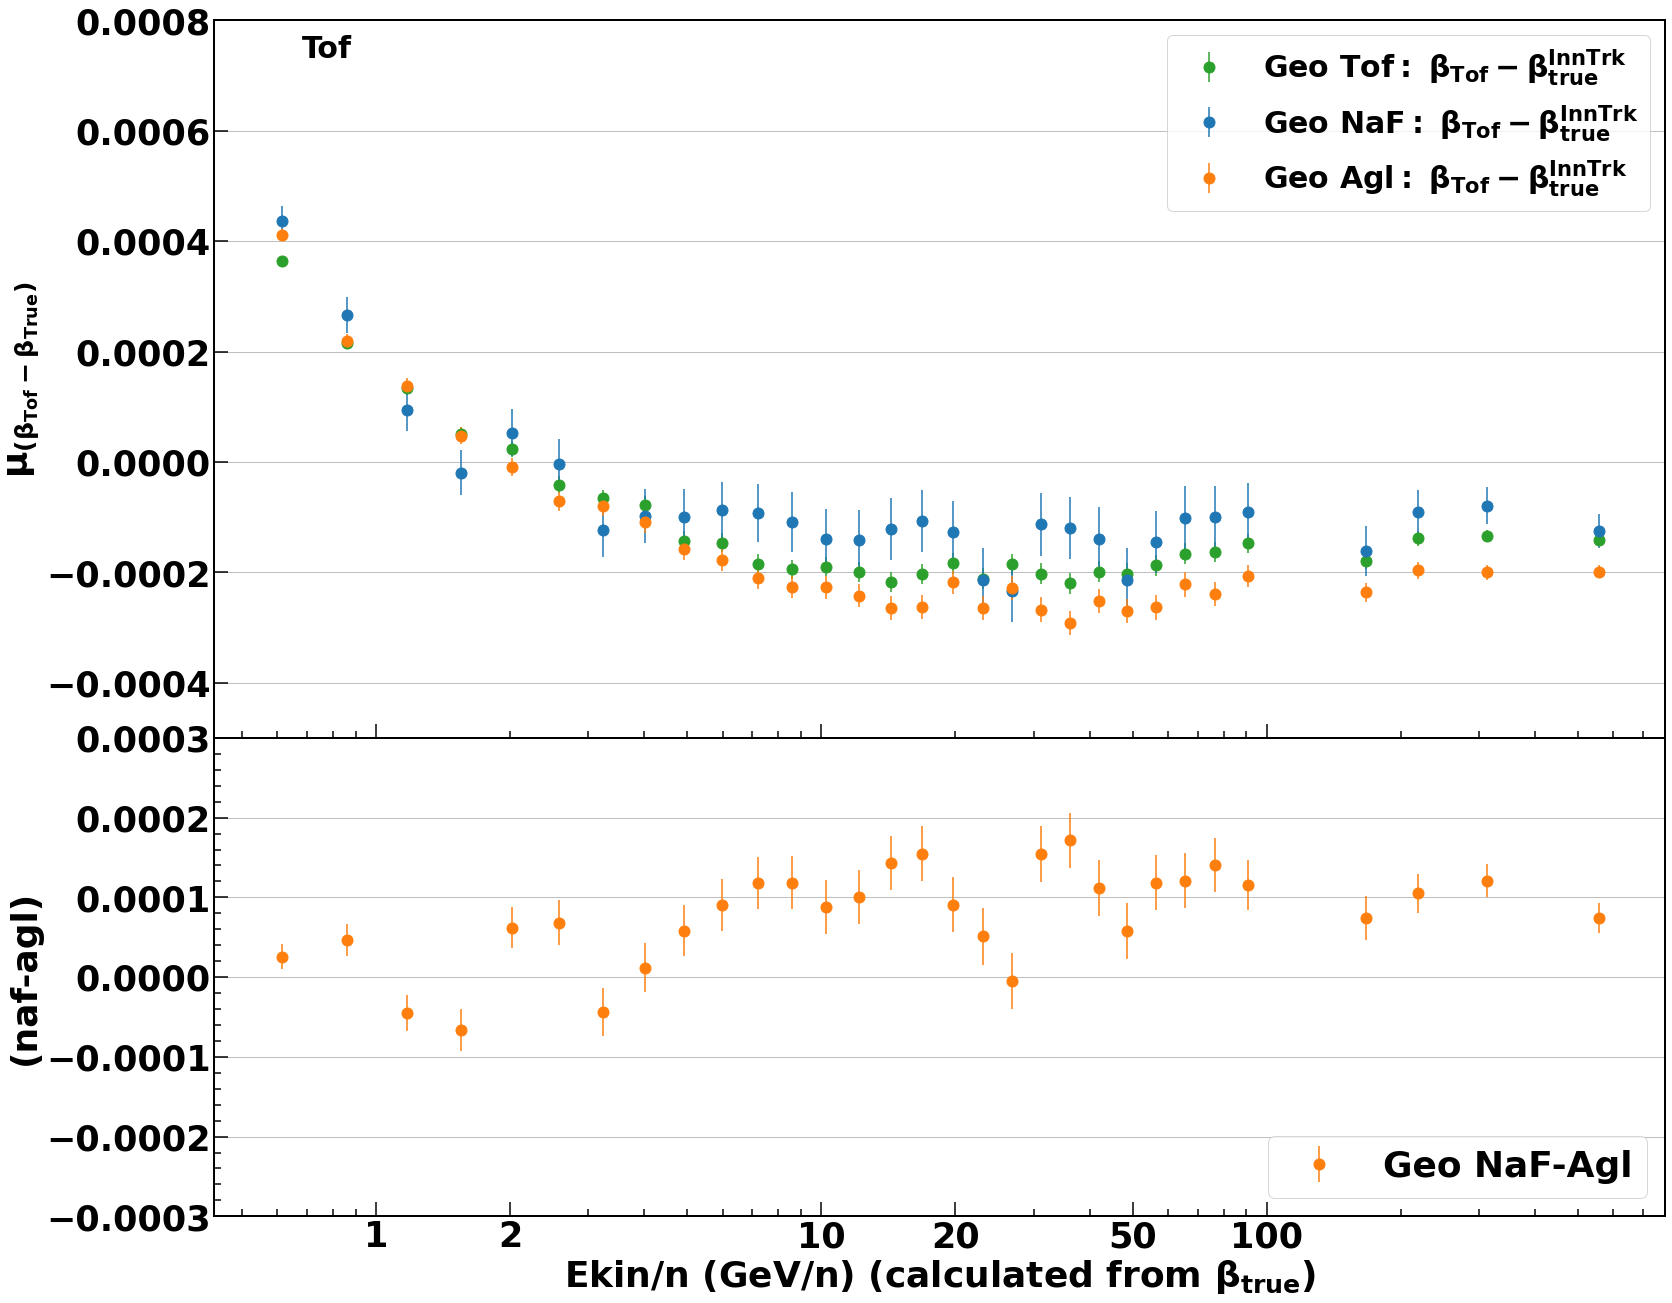

In [36]:
graph_mean_mcTofTrueResidual = {}
graph_sigma_mcTofTrueResidual = {}
minbin = {'Tof': 1, 'NaF': 1, 'Agl': 1}
maxbin = {'Tof': 34, 'NaF': 34, 'Agl': 34}
refGeos = {'NaF', 'Agl', 'Tof'}
#refGeos = {'Tof', 'Agl'}
Ref_COLOR = {'Tof': 'tab:green', 'NaF': 'tab:blue', 'Agl':'tab:orange'}
for refGeo in refGeos:
    graph_mean_mcTofTrueResidual[refGeo], graph_sigma_mcTofTrueResidual[refGeo] = get_musigma_gausfit(hist2d_mc_tofTrueGeo[refGeo], minbin[refGeo], maxbin[refGeo])
    
tba = {'Tof': 'InnTrk', 'NaF': 'naf', 'Agl':'agl'}

graph_ratio_tofnaf = graph_mean_mcTofTrueResidual['NaF'] + (scale_graph(graph_mean_mcTofTrueResidual['Tof'], -1))
graph_ratio_tofagl = graph_mean_mcTofTrueResidual['Agl'] + (scale_graph(graph_mean_mcTofTrueResidual['Tof'], -1))
graph_ratio_nafagl = graph_mean_mcTofTrueResidual['NaF'] + (scale_graph(graph_mean_mcTofTrueResidual['Agl'], -1))


fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(26, 22)) 
set_plotstyle(ax1, ax2)
for refGeo in refGeos:
    plot_graph(fig, ax1, graph_mean_mcTofTrueResidual[refGeo], color=Ref_COLOR[refGeo],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=rf'$\mathrm{{Geo \ {refGeo}: \ \beta_{{Tof}}-\beta_{{true}}^{{InnTrk}} }}$')
    #ax2.plot(graphratio_aglnaf_tuning.xvalues, graphratio_aglnaf_tuning.yvalues, '-')
    #ax2.plot(np.linspace(2, 15 ,50), spline_fit(np.log(np.linspace(2, 20 ,50))), '-')
    #plot_graph(fig, ax1, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='MC(Tof-NaF)/(Tof_Agl)')
    #ax2.plot(graph_sigma_nafagl_mcreconstructed.xvalues, graph_sigma_nafagl_mcreconstructed.yvalues, '-')
    
#plot_graph(fig, ax2, graph_ratio_tofnaf, color=Ref_COLOR['NaF'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo NaF/Tof')
plot_graph(fig, ax2, graph_ratio_nafagl, color=Ref_COLOR['Agl'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo NaF-Agl')
#plot_graph(fig, ax2, graph_ratio_tofnaf, color=Ref_COLOR['NaF'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo NaF/Tof')
#plot_graph(fig, ax2, graph_ratio_tofagl, color=Ref_COLOR['Agl'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Geo Agl/Tof')
#plot_graph(fig, ax2, graph_ratio_nafagl, color=Ref_COLOR['NaF'],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=r'Geo NaF/Agl ($mathrm{\beta_{Tof}-\beta_{true}}$)')
#plot_graph(fig, ax2, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=r'$\mathrm{MC \ (\beta_{Tof}-\beta_{NaF})/(\beta_{Tof}-\beta_{Agl})}$')
#plot_graph(fig, ax2, graph_sigma_nafagl_mcreconstructed, color='black',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=r'$\mathrm{MC \ (Tof-NaF)/(Tof-Agl)}$')
#plot_graph(fig, ax2, graphratio_aglnaf_tuning, color='orange',  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label='Tuning Agl/NaF')
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Ekn>98GeV/n)')
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
#plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)')

ax1.set_ylim([-0.0005, 0.0008])
ax1.grid(axis='y')
ax1.set_ylabel(r'$\mathrm{\mu_{(\beta_{Tof} - \beta_{True})}}$')
#ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ RICH/InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.06, 0.98, f"Tof", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)
ax1.set_xscale('log')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.2, alpha=0.2, color="tab:blue")
ax2.fill_betweenx(np.linspace(0.9, 1.1, 100), 0.61, 1.2, alpha=0.2, color="tab:blue")
ax1.legend(loc='upper right', fontsize=30)

ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_labels)
ax2.set_ylim([-0.0003, 0.0003])
ax2.set_ylabel('(naf-agl)')
ax2.legend(loc='lower right')
ax2.grid(axis='y')
#ax1.sharex(ax2)
ax2.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{true}}$)')

savefig_tofile(fig, plotfile, f"graph_sigma_{nuclei}_compareTofResoTrueInnTrk_CompareGeo", show=True) 

    